Реализуем градиентный спуск для задачи поиска оптимальных коэффициентов в MSE регрессии!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Имеем 1000 объектов и 10 признаков у каждого (+таргет)!

Обучим модель линейной регрессии:

$$
a(x) = \beta_1 d_{1} + \beta_2 d_{2} + \beta_3 d_{3} + \beta_4 d_{4} + \beta_5 d_{5} + \beta_6 d_{6} + \beta_7 d_{7} + \beta_8 d_{8} + \beta_9 d_{9} + \beta_{10} d_{10} + \beta_0
$$

Которая минимизирует MSE:

$$
Q(a(X), Y) = \sum_i^{1000} (a(x_i) - y_i)^2
$$

In [53]:
data = pd.read_csv('data.csv')

data.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.113768   0.930064   0.330528   0.010987   0.265703   0.699462   
1   0.380048   0.485946   0.870232   0.473401   0.454516   0.500864   
2   0.768462   0.217706   0.727438   0.718377   0.452155   0.434638   
3   0.606637   0.604335   0.540332   0.491236   0.325632   0.206348   
4   0.119770   0.469718   0.632829   0.504207   0.238259   0.452457   

   feature_7  feature_8  feature_9  feature_10     target  
0   0.058465   0.431643   0.650958    0.751820  30.147094  
1   0.471723   0.234329   0.072982    0.008372  21.424402  
2   0.043989   0.972489   0.450133    0.378157  31.422056  
3   0.825767   0.332475   0.955518    0.162811  31.308588  
4   0.775360   0.174262   0.117621    0.218883  23.322751

Обучим коэффициенты линейной регрессии с помощью библиотеки <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html"> **sklearn** </a>

Отдельно выведем оценку свободного коэффициента  ($\beta_0$ при $d_0 = 1$)

In [54]:
from sklearn.linear_model import LinearRegression
Y = data['target']
X = data.drop('target', axis=1)
model = LinearRegression()### Your code is here
model.fit(X, Y)
print(model.coef_, model.intercept_)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] 4.373157038707106


In [55]:
data.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.113768   0.930064   0.330528   0.010987   0.265703   0.699462   
1   0.380048   0.485946   0.870232   0.473401   0.454516   0.500864   
2   0.768462   0.217706   0.727438   0.718377   0.452155   0.434638   
3   0.606637   0.604335   0.540332   0.491236   0.325632   0.206348   
4   0.119770   0.469718   0.632829   0.504207   0.238259   0.452457   

   feature_7  feature_8  feature_9  feature_10     target  
0   0.058465   0.431643   0.650958    0.751820  30.147094  
1   0.471723   0.234329   0.072982    0.008372  21.424402  
2   0.043989   0.972489   0.450133    0.378157  31.422056  
3   0.825767   0.332475   0.955518    0.162811  31.308588  
4   0.775360   0.174262   0.117621    0.218883  23.322751

Теперь вам необходимо реализовать класс для оптимизации коэффициентов линейной регрессии МНК.
Подразумевается, что на вход алгоритм будет принимать следующие параметры:

- 2 pandas датафрейма **samples** и **targets**, содержащих матрицу объектов и ветор ответов соответственно
- значение **learning rate**, который корректирует длину вектора-градиента (чтобы он не взорвался)
- значение **threshold**'а для критерия останова (когда мы считаем, что мы сошлись к оптимуму)
- параметр **copy**, который позволяет либо делать изменения in-place в датафрейме, подающимся в класс, если изменения матрицы объектов в принципе при обучении имеются. Или же копировать объект при инициализации класса и возвращать новый объект, если требуется.

Он будет состоять из следующих важных компонент-методов:

- **add_constant_feature**: добавляет колонку с названием *constant* из единичек к переданному датафрейму **samples**. Это позволяет оценить свободный коэффициент $\beta_0$.

- **calculate_mse_loss**: вычисляет при текущих весах **self.beta** значение среднеквадратической ошибки.

- **calculate_gradient**: вычисляет при текущих весах вектор-градиент по функционалу.

- **iteration**: производит итерацию градиентного спуска, то есть обновляет веса модели, в соответствии с установленным **learning_rate = $\eta$**: $\beta^{(n+1)} = \beta^{(n)} - \eta \cdot \nabla Q(\beta^{(n)})$

- **learn**: производит итерации обучения до того момента, пока не сработает критерий останова обучения. В этот раз критерием останова будет следующее событие: во время крайней итерации изменение в функционале качества модели составило значение меньшее, чем **self.threshold**. Иными словами, $|Q(\beta^{(n)}) - Q(\beta^{(n+1)})| < threshold$.

P.S. установите в **__init__** аттрибут экземпляра с названием **iteration_loss_dict**, который будет устроен следующим образом: на каждой итерации мы будем добавлять в словарь пару ключ-значение, где ключем будет номер итерации $n$, а значением - среднеквадратическая ошибка в точке $\beta^{(n)}$. Это пригодится нам в будущем для визуализации.

### Hint: пример вычисления производной

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + ... + \beta_n \cdot d_{in} - y_i)^2
$$

Выше - минимизируемая функция. Она зависит от n переменных: $\beta_1, ..., \beta_n$. Вектор-градиент - матрица с одной строчкой, состоящей из производных 1го порядка по всем переменным.

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; ... \;\;\; Q'_{\beta_{n-1}}  \;\;\;  Q'_{\beta_n})
$$

Пример вычисления производной по первой переменной:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} (\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i)
$$

Скажем, для нашего датасета X, Y вычислим эту саму производную при начальных единичных коэффициентах $\beta_{start} = (1 \;\;\; 1 \;\;\; ...)$

Получим для каждого объекта в начале выражение из скобочек: 
$$
\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i
$$

In [39]:
### Инициализируем точку для коэффициентов в виде вектора из единичек
initial_betas = np.ones(X.shape[1])

### Получим выражение выше для каждого объекта. 
### Для этого скалярно перемножим строчки из X на наши beta

scalar_value = np.dot(X, initial_betas.reshape(-1, 1)).ravel()
scalar_value = (scalar_value - Y).values

#print(initial_betas, scalar_value)

Теперь полученное значение для каждого объекта умножим на соответствующее значение признака $d_1$:

$$
d_{i1} \cdot (\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i)
$$

In [21]:
### Возьмем столбик со значениями 1 признака

d_i1 = X.values[:, 0]

### Умножим каждый объект на соответствующее значение признака
scalar_value = scalar_value * d_i1

In [22]:
### Наконец, умножим все на 2 и усреднимся, 
### чтобы получить значение производной по первому параметру

2 * np.mean(scalar_value)

-26.58920089937071

### Эта логика поможем Вам при реализации класса!

learn(self)

метод возвращает итоговую среднеквадратическую ошибку.
метод итеративно вычисляет среднеквадратическую ошибку и вектор-градиент. номер итерации и MSE записываются в словарь *iteration_loss_dict*. критерий останова срабатывает тогда, когда абсолютное значение разницы двух последних MSE меньше *self.threshold*.

In [65]:
class GradientDescentMse:
    """
    Базовый класс для реализации градиентного спуска в задаче линейной МНК регрессии 
    """

    def __init__(self, samples: pd.DataFrame, targets: pd.DataFrame,
                 learning_rate: float = 1e-3, threshold = 1e-6, copy: bool = True):
        """
        self.samples - матрица признаков
        self.targets - вектор таргетов
        self.beta - вектор из изначальными весами модели == коэффициентами бета (состоит из единиц)
        self.learning_rate - параметр *learning_rate* для корректировки нормы градиента
        self.threshold - величина, меньше которой изменение в loss-функции означает остановку градиентного спуска
        iteration_loss_dict - словарь, который будет хранить номер итерации и соответствующую MSE
        copy: копирование матрицы признаков или создание изменения in-place
        """
        if copy:
            self.samples = samples.copy()
            self.targets = targets.copy()
        else:
            self.samples = samples
            self.targets = targets
        
        self.beta = np.ones(samples.shape[1])
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.iteration_loss_dict = dict()
        
    def add_constant_feature(self):
        """
        Метод для создания константной фичи в матрице объектов samples
        Метод создает колонку с константным признаком (interсept) в матрице признаков.
        Hint: так как количество признаков увеличилось на одну, не забудьте дополнить вектор с изначальными весами модели!
        """
        if 'intercept' not in self.samples:
            self.samples['intercept'] = 1   ### Your code is here
            self.beta = np.ones(self.samples.shape[1])
            
        #print("----------------------------------------",self.samples)
            
    def calculate_mse_loss(self) -> float:
        """
        Метод для расчета среднеквадратической ошибки
        
        :return: среднеквадратическая ошибка при текущих весах модели : float
        """
        return np.sum((self.samples @ self.beta - self.targets) ** 2) / self.samples.shape[0]### Your code is here

    def calculate_gradient(self) -> np.ndarray:
        """
        Метод для вычисления вектора-градиента
        Метод возвращает вектор-градиент, содержащий производные по каждому признаку.
        Сначала матрица признаков скалярно перемножается на вектор self.beta, и из каждой колонки
        полученной матрицы вычитается вектор таргетов. Затем полученная матрица скалярно умножается на матрицу признаков.
        Наконец, итоговая матрица умножается на 2 и усредняется по каждому признаку.
        
        :return: вектор-градиент, т.е. массив, содержащий соответствующее количество производных по каждой переменной : np.ndarray
        """
        return self.samples.T @ (self.samples @ self.beta - self.targets)  * 2 / self.samples.shape[0] ### Your code is here
    
    
    def iteration(self):
        """
        Обновляем веса модели в соответствии с текущим вектором-градиентом
        """
        #print(f"---------------{self.calculate_gradient()}-------------")
        self.beta -= self.learning_rate * self.calculate_gradient() ### Your code is here
        
    def learn(self):
        """
        Итеративное обучение весов модели до срабатывания критерия останова
        Запись mse и номера итерации в iteration_loss_dict
        
        Описание алгоритма работы для изменения бет:
            Фиксируем текущие beta -> start_betas
            Делаем шаг градиентного спуска
            Записываем новые beta -> new_betas
            Пока |L(new_beta) - L(start_beta)| > threshold:
                Повторяем первые 3 шага
                
        Описание алгоритма работы для изменения функции потерь:
            Фиксируем текущие mse -> previous_mse
            Делаем шаг градиентного спуска
            Записываем новые mse -> next_mse
            Пока |(previous_mse) - (next_mse)| > threshold:
                Повторяем первые 3 шага
        """
        
        
        count = 0
        while (1):### Your code is here
            
            start_betas = self.beta
            previous_mse = self.calculate_mse_loss()
            self.iteration_loss_dict[count] = previous_mse
            count += 1
            
            self.iteration() # обновили веса
            
            new_beta = self.beta
            next_mse = self.calculate_mse_loss()
            
            # print(f"Number of iter: {count} \n next_mse - previous_mse = {abs(next_mse - previous_mse)} ")
            
            if abs(next_mse - previous_mse) <= self.threshold:
                self.iteration_loss_dict[count] = next_mse
                break
                

Обучим коэффициенты линейной модели с помощью реализованного нами градиентного спуска, не забыв добавить свободную переменную. Получились ли такие же коэффициенты, как и при использовании **LinearRegression** из **sklearn**? Если нет, то почему они отличаются, на Ваш взгляд, и сильно ли?

In [62]:
GD = GradientDescentMse(samples=X, targets=Y)
GD.add_constant_feature()
GD.learn()

print(GD.beta)

Number of iter: 1 
 next_mse - previous_mse = 9.481435949543425 
Number of iter: 2 
 next_mse - previous_mse = 9.348330678736602 
Number of iter: 3 
 next_mse - previous_mse = 9.217094480862556 
Number of iter: 4 
 next_mse - previous_mse = 9.08770111011438 
Number of iter: 5 
 next_mse - previous_mse = 8.960124689232998 
Number of iter: 6 
 next_mse - previous_mse = 8.834339704331228 
Number of iter: 7 
 next_mse - previous_mse = 8.710320999791975 
Number of iter: 8 
 next_mse - previous_mse = 8.58804377323736 
Number of iter: 9 
 next_mse - previous_mse = 8.467483570568675 
Number of iter: 10 
 next_mse - previous_mse = 8.348616281074214 
Number of iter: 11 
 next_mse - previous_mse = 8.231418132610315 
Number of iter: 12 
 next_mse - previous_mse = 8.11586568684379 
Number of iter: 13 
 next_mse - previous_mse = 8.00193583456769 
Number of iter: 14 
 next_mse - previous_mse = 7.889605791076747 
Number of iter: 15 
 next_mse - previous_mse = 7.778853091612973 
Number of iter: 16 
 ne

Number of iter: 211 
 next_mse - previous_mse = 0.4887645979960382 
Number of iter: 212 
 next_mse - previous_mse = 0.48193340551602404 
Number of iter: 213 
 next_mse - previous_mse = 0.4751981266667471 
Number of iter: 214 
 next_mse - previous_mse = 0.4685574146178695 
Number of iter: 215 
 next_mse - previous_mse = 0.46200994145171137 
Number of iter: 216 
 next_mse - previous_mse = 0.45555439789719543 
Number of iter: 217 
 next_mse - previous_mse = 0.44918949306845946 
Number of iter: 218 
 next_mse - previous_mse = 0.44291395420623303 
Number of iter: 219 
 next_mse - previous_mse = 0.4367265264236906 
Number of iter: 220 
 next_mse - previous_mse = 0.4306259724552035 
Number of iter: 221 
 next_mse - previous_mse = 0.4246110724091565 
Number of iter: 222 
 next_mse - previous_mse = 0.4186806235236773 
Number of iter: 223 
 next_mse - previous_mse = 0.41283343992636645 
Number of iter: 224 
 next_mse - previous_mse = 0.4070683523970118 
Number of iter: 225 
 next_mse - previous_

Number of iter: 441 
 next_mse - previous_mse = 0.020978223177651856 
Number of iter: 442 
 next_mse - previous_mse = 0.0207133208739414 
Number of iter: 443 
 next_mse - previous_mse = 0.02045212818846398 
Number of iter: 444 
 next_mse - previous_mse = 0.02019459303373683 
Number of iter: 445 
 next_mse - previous_mse = 0.019940664053694768 
Number of iter: 446 
 next_mse - previous_mse = 0.019690290613410433 
Number of iter: 447 
 next_mse - previous_mse = 0.019443422788999243 
Number of iter: 448 
 next_mse - previous_mse = 0.019200011357599855 
Number of iter: 449 
 next_mse - previous_mse = 0.018960007787544697 
Number of iter: 450 
 next_mse - previous_mse = 0.01872336422866372 
Number of iter: 451 
 next_mse - previous_mse = 0.018490033502694736 
Number of iter: 452 
 next_mse - previous_mse = 0.01825996909386607 
Number of iter: 453 
 next_mse - previous_mse = 0.018033125139588435 
Number of iter: 454 
 next_mse - previous_mse = 0.017809456421257863 
Number of iter: 455 
 next

Number of iter: 646 
 next_mse - previous_mse = 0.00305533620309717 
Number of iter: 647 
 next_mse - previous_mse = 0.0030400952198537112 
Number of iter: 648 
 next_mse - previous_mse = 0.0030250587738249735 
Number of iter: 649 
 next_mse - previous_mse = 0.003010223996165351 
Number of iter: 650 
 next_mse - previous_mse = 0.002995588058324117 
Number of iter: 651 
 next_mse - previous_mse = 0.0029811481714494548 
Number of iter: 652 
 next_mse - previous_mse = 0.0029669015858742043 
Number of iter: 653 
 next_mse - previous_mse = 0.0029528455905198925 
Number of iter: 654 
 next_mse - previous_mse = 0.002938977512391361 
Number of iter: 655 
 next_mse - previous_mse = 0.0029252947160118836 
Number of iter: 656 
 next_mse - previous_mse = 0.0029117946029284525 
Number of iter: 657 
 next_mse - previous_mse = 0.002898474611161106 
Number of iter: 658 
 next_mse - previous_mse = 0.0028853322147099902 
Number of iter: 659 
 next_mse - previous_mse = 0.0028723649230473214 
Number of it

Number of iter: 867 
 next_mse - previous_mse = 0.001917501617732853 
Number of iter: 868 
 next_mse - previous_mse = 0.0019162216619479366 
Number of iter: 869 
 next_mse - previous_mse = 0.001914950902671464 
Number of iter: 870 
 next_mse - previous_mse = 0.0019136892138131856 
Number of iter: 871 
 next_mse - previous_mse = 0.0019124364710627617 
Number of iter: 872 
 next_mse - previous_mse = 0.0019111925518506823 
Number of iter: 873 
 next_mse - previous_mse = 0.001909957335328727 
Number of iter: 874 
 next_mse - previous_mse = 0.0019087307023362143 
Number of iter: 875 
 next_mse - previous_mse = 0.001907512535404443 
Number of iter: 876 
 next_mse - previous_mse = 0.0019063027186909665 
Number of iter: 877 
 next_mse - previous_mse = 0.0019051011379911387 
Number of iter: 878 
 next_mse - previous_mse = 0.0019039076807008115 
Number of iter: 879 
 next_mse - previous_mse = 0.0019027222357967943 
Number of iter: 880 
 next_mse - previous_mse = 0.0019015446938057678 
Number of 

Number of iter: 1049 
 next_mse - previous_mse = 0.0017624143507797285 
Number of iter: 1050 
 next_mse - previous_mse = 0.0017617640527927136 
Number of iter: 1051 
 next_mse - previous_mse = 0.001761114648353157 
Number of iter: 1052 
 next_mse - previous_mse = 0.001760466127771032 
Number of iter: 1053 
 next_mse - previous_mse = 0.001759818481504638 
Number of iter: 1054 
 next_mse - previous_mse = 0.0017591717001472773 
Number of iter: 1055 
 next_mse - previous_mse = 0.0017585257744068272 
Number of iter: 1056 
 next_mse - previous_mse = 0.0017578806951377146 
Number of iter: 1057 
 next_mse - previous_mse = 0.0017572364533107176 
Number of iter: 1058 
 next_mse - previous_mse = 0.0017565930400342822 
Number of iter: 1059 
 next_mse - previous_mse = 0.0017559504465189946 
Number of iter: 1060 
 next_mse - previous_mse = 0.0017553086641308724 
Number of iter: 1061 
 next_mse - previous_mse = 0.0017546676843211984 
Number of iter: 1062 
 next_mse - previous_mse = 0.0017540274986842

Number of iter: 1256 
 next_mse - previous_mse = 0.0016389631146491723 
Number of iter: 1257 
 next_mse - previous_mse = 0.0016384007410232826 
Number of iter: 1258 
 next_mse - previous_mse = 0.0016378385987332322 
Number of iter: 1259 
 next_mse - previous_mse = 0.0016372766871972644 
Number of iter: 1260 
 next_mse - previous_mse = 0.0016367150058362867 
Number of iter: 1261 
 next_mse - previous_mse = 0.001636153554086306 
Number of iter: 1262 
 next_mse - previous_mse = 0.0016355923313859932 
Number of iter: 1263 
 next_mse - previous_mse = 0.001635031337179349 
Number of iter: 1264 
 next_mse - previous_mse = 0.0016344705709201435 
Number of iter: 1265 
 next_mse - previous_mse = 0.001633910032067476 
Number of iter: 1266 
 next_mse - previous_mse = 0.001633349720085775 
Number of iter: 1267 
 next_mse - previous_mse = 0.0016327896344519033 
Number of iter: 1268 
 next_mse - previous_mse = 0.0016322297746400594 
Number of iter: 1269 
 next_mse - previous_mse = 0.00163167014013865

Number of iter: 1474 
 next_mse - previous_mse = 0.001521248418119292 
Number of iter: 1475 
 next_mse - previous_mse = 0.001520729405612542 
Number of iter: 1476 
 next_mse - previous_mse = 0.0015202105751654926 
Number of iter: 1477 
 next_mse - previous_mse = 0.001519691926699096 
Number of iter: 1478 
 next_mse - previous_mse = 0.0015191734601236462 
Number of iter: 1479 
 next_mse - previous_mse = 0.0015186551753503252 
Number of iter: 1480 
 next_mse - previous_mse = 0.0015181370722974208 
Number of iter: 1481 
 next_mse - previous_mse = 0.0015176191508770032 
Number of iter: 1482 
 next_mse - previous_mse = 0.0015171014110055836 
Number of iter: 1483 
 next_mse - previous_mse = 0.0015165838525987851 
Number of iter: 1484 
 next_mse - previous_mse = 0.0015160664755695663 
Number of iter: 1485 
 next_mse - previous_mse = 0.0015155492798371029 
Number of iter: 1486 
 next_mse - previous_mse = 0.0015150322653161297 
Number of iter: 1487 
 next_mse - previous_mse = 0.0015145154319222

Number of iter: 1684 
 next_mse - previous_mse = 0.00141613695485443 
Number of iter: 1685 
 next_mse - previous_mse = 0.0014156545831918166 
Number of iter: 1686 
 next_mse - previous_mse = 0.0014151723792048543 
Number of iter: 1687 
 next_mse - previous_mse = 0.0014146903428366997 
Number of iter: 1688 
 next_mse - previous_mse = 0.0014142084740296212 
Number of iter: 1689 
 next_mse - previous_mse = 0.0014137267727152292 
Number of iter: 1690 
 next_mse - previous_mse = 0.0014132452388437855 
Number of iter: 1691 
 next_mse - previous_mse = 0.0014127638723486768 
Number of iter: 1692 
 next_mse - previous_mse = 0.001412282673173948 
Number of iter: 1693 
 next_mse - previous_mse = 0.0014118016412592027 
Number of iter: 1694 
 next_mse - previous_mse = 0.0014113207765422686 
Number of iter: 1695 
 next_mse - previous_mse = 0.0014108400789663023 
Number of iter: 1696 
 next_mse - previous_mse = 0.0014103595484717957 
Number of iter: 1697 
 next_mse - previous_mse = 0.0014098791849974

Number of iter: 1874 
 next_mse - previous_mse = 0.001327431244689592 
Number of iter: 1875 
 next_mse - previous_mse = 0.0013269796902868336 
Number of iter: 1876 
 next_mse - previous_mse = 0.001326528292691087 
Number of iter: 1877 
 next_mse - previous_mse = 0.0013260770518526144 
Number of iter: 1878 
 next_mse - previous_mse = 0.0013256259677119075 
Number of iter: 1879 
 next_mse - previous_mse = 0.0013251750402183404 
Number of iter: 1880 
 next_mse - previous_mse = 0.0013247242693088523 
Number of iter: 1881 
 next_mse - previous_mse = 0.001324273654941699 
Number of iter: 1882 
 next_mse - previous_mse = 0.001323823197046714 
Number of iter: 1883 
 next_mse - previous_mse = 0.0013233728955830415 
Number of iter: 1884 
 next_mse - previous_mse = 0.001322922750489397 
Number of iter: 1885 
 next_mse - previous_mse = 0.0013224727617044962 
Number of iter: 1886 
 next_mse - previous_mse = 0.001322022929187483 
Number of iter: 1887 
 next_mse - previous_mse = 0.0013215732528717439

Number of iter: 2081 
 next_mse - previous_mse = 0.0012372241888169988 
Number of iter: 2082 
 next_mse - previous_mse = 0.0012368039503933836 
Number of iter: 2083 
 next_mse - previous_mse = 0.0012363838578113295 
Number of iter: 2084 
 next_mse - previous_mse = 0.0012359639110162135 
Number of iter: 2085 
 next_mse - previous_mse = 0.001235544109970732 
Number of iter: 2086 
 next_mse - previous_mse = 0.0012351244546109363 
Number of iter: 2087 
 next_mse - previous_mse = 0.0012347049448844238 
Number of iter: 2088 
 next_mse - previous_mse = 0.0012342855807552233 
Number of iter: 2089 
 next_mse - previous_mse = 0.001233866362154945 
Number of iter: 2090 
 next_mse - previous_mse = 0.0012334472890445092 
Number of iter: 2091 
 next_mse - previous_mse = 0.0012330283613675164 
Number of iter: 2092 
 next_mse - previous_mse = 0.0012326095790737845 
Number of iter: 2093 
 next_mse - previous_mse = 0.001232190942114464 
Number of iter: 2094 
 next_mse - previous_mse = 0.0012317724504367

Number of iter: 2289 
 next_mse - previous_mse = 0.0011528801846902859 
Number of iter: 2290 
 next_mse - previous_mse = 0.001152489208769314 
Number of iter: 2291 
 next_mse - previous_mse = 0.0011520983684509822 
Number of iter: 2292 
 next_mse - previous_mse = 0.0011517076636926582 
Number of iter: 2293 
 next_mse - previous_mse = 0.001151317094435722 
Number of iter: 2294 
 next_mse - previous_mse = 0.0011509266606455348 
Number of iter: 2295 
 next_mse - previous_mse = 0.0011505363622656972 
Number of iter: 2296 
 next_mse - previous_mse = 0.0011501461992513562 
Number of iter: 2297 
 next_mse - previous_mse = 0.001149756171558547 
Number of iter: 2298 
 next_mse - previous_mse = 0.001149366279135311 
Number of iter: 2299 
 next_mse - previous_mse = 0.0011489765219367953 
Number of iter: 2300 
 next_mse - previous_mse = 0.0011485868999150384 
Number of iter: 2301 
 next_mse - previous_mse = 0.0011481974130238548 
Number of iter: 2302 
 next_mse - previous_mse = 0.00114780806121261

Number of iter: 2495 
 next_mse - previous_mse = 0.0010751354877291952 
Number of iter: 2496 
 next_mse - previous_mse = 0.001074771467873159 
Number of iter: 2497 
 next_mse - previous_mse = 0.00107440757418642 
Number of iter: 2498 
 next_mse - previous_mse = 0.0010740438066294544 
Number of iter: 2499 
 next_mse - previous_mse = 0.0010736801651658467 
Number of iter: 2500 
 next_mse - previous_mse = 0.0010733166497320923 
Number of iter: 2501 
 next_mse - previous_mse = 0.001072953260308207 
Number of iter: 2502 
 next_mse - previous_mse = 0.0010725899968333508 
Number of iter: 2503 
 next_mse - previous_mse = 0.0010722268592640027 
Number of iter: 2504 
 next_mse - previous_mse = 0.001071863847565524 
Number of iter: 2505 
 next_mse - previous_mse = 0.0010715009616841797 
Number of iter: 2506 
 next_mse - previous_mse = 0.001071138201585331 
Number of iter: 2507 
 next_mse - previous_mse = 0.001070775567219684 
Number of iter: 2508 
 next_mse - previous_mse = 0.0010704130585392768 

Number of iter: 2706 
 next_mse - previous_mse = 0.0010010558036244177 
Number of iter: 2707 
 next_mse - previous_mse = 0.0010007174523769535 
Number of iter: 2708 
 next_mse - previous_mse = 0.0010003792183241877 
Number of iter: 2709 
 next_mse - previous_mse = 0.0010000411014279287 
Number of iter: 2710 
 next_mse - previous_mse = 0.0009997031016495406 
Number of iter: 2711 
 next_mse - previous_mse = 0.0009993652189490554 
Number of iter: 2712 
 next_mse - previous_mse = 0.0009990274532820642 
Number of iter: 2713 
 next_mse - previous_mse = 0.0009986898046077108 
Number of iter: 2714 
 next_mse - previous_mse = 0.000998352272884695 
Number of iter: 2715 
 next_mse - previous_mse = 0.0009980148580774895 
Number of iter: 2716 
 next_mse - previous_mse = 0.0009976775601434618 
Number of iter: 2717 
 next_mse - previous_mse = 0.0009973403790310975 
Number of iter: 2718 
 next_mse - previous_mse = 0.0009970033147199686 
Number of iter: 2719 
 next_mse - previous_mse = 0.00099666636714

Number of iter: 2917 
 next_mse - previous_mse = 0.000932198120900285 
Number of iter: 2918 
 next_mse - previous_mse = 0.0009318836125880026 
Number of iter: 2919 
 next_mse - previous_mse = 0.000931569213139749 
Number of iter: 2920 
 next_mse - previous_mse = 0.0009312549225151123 
Number of iter: 2921 
 next_mse - previous_mse = 0.0009309407406861148 
Number of iter: 2922 
 next_mse - previous_mse = 0.0009306266676007979 
Number of iter: 2923 
 next_mse - previous_mse = 0.0009303127032320724 
Number of iter: 2924 
 next_mse - previous_mse = 0.0009299988475333087 
Number of iter: 2925 
 next_mse - previous_mse = 0.0009296851004707563 
Number of iter: 2926 
 next_mse - previous_mse = 0.0009293714620097759 
Number of iter: 2927 
 next_mse - previous_mse = 0.0009290579321099557 
Number of iter: 2928 
 next_mse - previous_mse = 0.0009287445107282188 
Number of iter: 2929 
 next_mse - previous_mse = 0.0009284311978312587 
Number of iter: 2930 
 next_mse - previous_mse = 0.000928117993385

Number of iter: 3137 
 next_mse - previous_mse = 0.0008655634818355296 
Number of iter: 3138 
 next_mse - previous_mse = 0.0008652720300856842 
Number of iter: 3139 
 next_mse - previous_mse = 0.0008649806791458658 
Number of iter: 3140 
 next_mse - previous_mse = 0.0008646894289769946 
Number of iter: 3141 
 next_mse - previous_mse = 0.0008643982795493166 
Number of iter: 3142 
 next_mse - previous_mse = 0.0008641072308224196 
Number of iter: 3143 
 next_mse - previous_mse = 0.0008638162827629969 
Number of iter: 3144 
 next_mse - previous_mse = 0.0008635254353341892 
Number of iter: 3145 
 next_mse - previous_mse = 0.000863234688498693 
Number of iter: 3146 
 next_mse - previous_mse = 0.0008629440422325274 
Number of iter: 3147 
 next_mse - previous_mse = 0.0008626534964899513 
Number of iter: 3148 
 next_mse - previous_mse = 0.0008623630512336611 
Number of iter: 3149 
 next_mse - previous_mse = 0.0008620727064418965 
Number of iter: 3150 
 next_mse - previous_mse = 0.00086178246206

Number of iter: 3342 
 next_mse - previous_mse = 0.0008078748094555444 
Number of iter: 3343 
 next_mse - previous_mse = 0.0008076033041324315 
Number of iter: 3344 
 next_mse - previous_mse = 0.0008073318926471451 
Number of iter: 3345 
 next_mse - previous_mse = 0.0008070605749757043 
Number of iter: 3346 
 next_mse - previous_mse = 0.0008067893510745883 
Number of iter: 3347 
 next_mse - previous_mse = 0.0008065182209171518 
Number of iter: 3348 
 next_mse - previous_mse = 0.0008062471844709762 
Number of iter: 3349 
 next_mse - previous_mse = 0.0008059762417023109 
Number of iter: 3350 
 next_mse - previous_mse = 0.0008057053925734081 
Number of iter: 3351 
 next_mse - previous_mse = 0.0008054346370633958 
Number of iter: 3352 
 next_mse - previous_mse = 0.0008051639751260886 
Number of iter: 3353 
 next_mse - previous_mse = 0.0008048934067406144 
Number of iter: 3354 
 next_mse - previous_mse = 0.0008046229318638964 
Number of iter: 3355 
 next_mse - previous_mse = 0.0008043525504

Number of iter: 3464 
 next_mse - previous_mse = 0.0007754342245114287 
Number of iter: 3465 
 next_mse - previous_mse = 0.0007751739292589654 
Number of iter: 3466 
 next_mse - previous_mse = 0.0007749137239265735 
Number of iter: 3467 
 next_mse - previous_mse = 0.0007746536084929367 
Number of iter: 3468 
 next_mse - previous_mse = 0.0007743935829185311 
Number of iter: 3469 
 next_mse - previous_mse = 0.0007741336471842608 
Number of iter: 3470 
 next_mse - previous_mse = 0.0007738738012439406 
Number of iter: 3471 
 next_mse - previous_mse = 0.0007736140450753659 
Number of iter: 3472 
 next_mse - previous_mse = 0.0007733543786452302 
Number of iter: 3473 
 next_mse - previous_mse = 0.0007730948019246675 
Number of iter: 3474 
 next_mse - previous_mse = 0.000772835314874154 
Number of iter: 3475 
 next_mse - previous_mse = 0.0007725759174719293 
Number of iter: 3476 
 next_mse - previous_mse = 0.0007723166096851308 
Number of iter: 3477 
 next_mse - previous_mse = 0.00077205739147

Number of iter: 3672 
 next_mse - previous_mse = 0.0007231831592680038 
Number of iter: 3673 
 next_mse - previous_mse = 0.0007229409088065353 
Number of iter: 3674 
 next_mse - previous_mse = 0.0007226987419768349 
Number of iter: 3675 
 next_mse - previous_mse = 0.0007224566587420433 
Number of iter: 3676 
 next_mse - previous_mse = 0.0007222146590799561 
Number of iter: 3677 
 next_mse - previous_mse = 0.0007219727429519374 
Number of iter: 3678 
 next_mse - previous_mse = 0.0007217309103380032 
Number of iter: 3679 
 next_mse - previous_mse = 0.0007214891612101759 
Number of iter: 3680 
 next_mse - previous_mse = 0.0007212474955267112 
Number of iter: 3681 
 next_mse - previous_mse = 0.00072100591327251 
Number of iter: 3682 
 next_mse - previous_mse = 0.0007207644144093805 
Number of iter: 3683 
 next_mse - previous_mse = 0.0007205229989115658 
Number of iter: 3684 
 next_mse - previous_mse = 0.0007202816667519762 
Number of iter: 3685 
 next_mse - previous_mse = 0.000720040417899

Number of iter: 3882 
 next_mse - previous_mse = 0.0006741021542620018 
Number of iter: 3883 
 next_mse - previous_mse = 0.0006738768403713458 
Number of iter: 3884 
 next_mse - previous_mse = 0.0006736516041976337 
Number of iter: 3885 
 next_mse - previous_mse = 0.0006734264457124439 
Number of iter: 3886 
 next_mse - previous_mse = 0.0006732013648944601 
Number of iter: 3887 
 next_mse - previous_mse = 0.0006729763617041584 
Number of iter: 3888 
 next_mse - previous_mse = 0.0006727514361362097 
Number of iter: 3889 
 next_mse - previous_mse = 0.0006725265881386555 
Number of iter: 3890 
 next_mse - previous_mse = 0.00067230181770217 
Number of iter: 3891 
 next_mse - previous_mse = 0.0006720771247925583 
Number of iter: 3892 
 next_mse - previous_mse = 0.0006718525093822869 
Number of iter: 3893 
 next_mse - previous_mse = 0.000671627971447819 
Number of iter: 3894 
 next_mse - previous_mse = 0.0006714035109602889 
Number of iter: 3895 
 next_mse - previous_mse = 0.0006711791278926

Number of iter: 4084 
 next_mse - previous_mse = 0.0006301304291400633 
Number of iter: 4085 
 next_mse - previous_mse = 0.0006299202764208367 
Number of iter: 4086 
 next_mse - previous_mse = 0.0006297101961321161 
Number of iter: 4087 
 next_mse - previous_mse = 0.0006295001882468121 
Number of iter: 4088 
 next_mse - previous_mse = 0.0006292902527387234 
Number of iter: 4089 
 next_mse - previous_mse = 0.0006290803895856456 
Number of iter: 4090 
 next_mse - previous_mse = 0.0006288705987635979 
Number of iter: 4091 
 next_mse - previous_mse = 0.0006286608802401616 
Number of iter: 4092 
 next_mse - previous_mse = 0.0006284512339966852 
Number of iter: 4093 
 next_mse - previous_mse = 0.0006282416600065233 
Number of iter: 4094 
 next_mse - previous_mse = 0.0006280321582399218 
Number of iter: 4095 
 next_mse - previous_mse = 0.0006278227286813376 
Number of iter: 4096 
 next_mse - previous_mse = 0.0006276133712930232 
Number of iter: 4097 
 next_mse - previous_mse = 0.0006274040860

Number of iter: 4290 
 next_mse - previous_mse = 0.0005883326833018288 
Number of iter: 4291 
 next_mse - previous_mse = 0.0005881369301801165 
Number of iter: 4292 
 next_mse - previous_mse = 0.0005879412444624865 
Number of iter: 4293 
 next_mse - previous_mse = 0.0005877456261320635 
Number of iter: 4294 
 next_mse - previous_mse = 0.0005875500751637563 
Number of iter: 4295 
 next_mse - previous_mse = 0.000587354591532252 
Number of iter: 4296 
 next_mse - previous_mse = 0.0005871591752171224 
Number of iter: 4297 
 next_mse - previous_mse = 0.0005869638261919441 
Number of iter: 4298 
 next_mse - previous_mse = 0.0005867685444347348 
Number of iter: 4299 
 next_mse - previous_mse = 0.0005865733299228459 
Number of iter: 4300 
 next_mse - previous_mse = 0.0005863781826320746 
Number of iter: 4301 
 next_mse - previous_mse = 0.0005861831025366637 
Number of iter: 4302 
 next_mse - previous_mse = 0.0005859880896164071 
Number of iter: 4303 
 next_mse - previous_mse = 0.00058579314384

Number of iter: 4405 
 next_mse - previous_mse = 0.0005662571924696103 
Number of iter: 4406 
 next_mse - previous_mse = 0.0005660690393285428 
Number of iter: 4407 
 next_mse - previous_mse = 0.0005658809509416773 
Number of iter: 4408 
 next_mse - previous_mse = 0.0005656929272950251 
Number of iter: 4409 
 next_mse - previous_mse = 0.0005655049683592761 
Number of iter: 4410 
 next_mse - previous_mse = 0.0005653170741206637 
Number of iter: 4411 
 next_mse - previous_mse = 0.0005651292445474354 
Number of iter: 4412 
 next_mse - previous_mse = 0.0005649414796224939 
Number of iter: 4413 
 next_mse - previous_mse = 0.00056475377932097 
Number of iter: 4414 
 next_mse - previous_mse = 0.0005645661436237681 
Number of iter: 4415 
 next_mse - previous_mse = 0.0005643785725020223 
Number of iter: 4416 
 next_mse - previous_mse = 0.0005641910659410776 
Number of iter: 4417 
 next_mse - previous_mse = 0.000564003623910958 
Number of iter: 4418 
 next_mse - previous_mse = 0.0005638162463976

Number of iter: 4614 
 next_mse - previous_mse = 0.0005283075543209836 
Number of iter: 4615 
 next_mse - previous_mse = 0.0005281324570343138 
Number of iter: 4616 
 next_mse - previous_mse = 0.0005279574199499315 
Number of iter: 4617 
 next_mse - previous_mse = 0.000527782443058955 
Number of iter: 4618 
 next_mse - previous_mse = 0.0005276075263367375 
Number of iter: 4619 
 next_mse - previous_mse = 0.00052743266975952 
Number of iter: 4620 
 next_mse - previous_mse = 0.0005272578733139799 
Number of iter: 4621 
 next_mse - previous_mse = 0.0005270831369696971 
Number of iter: 4622 
 next_mse - previous_mse = 0.0005269084607097962 
Number of iter: 4623 
 next_mse - previous_mse = 0.0005267338445165137 
Number of iter: 4624 
 next_mse - previous_mse = 0.000526559288367201 
Number of iter: 4625 
 next_mse - previous_mse = 0.0005263847922354348 
Number of iter: 4626 
 next_mse - previous_mse = 0.0005262103561092246 
Number of iter: 4627 
 next_mse - previous_mse = 0.00052603597996014

Number of iter: 4836 
 next_mse - previous_mse = 0.0004908759597492818 
Number of iter: 4837 
 next_mse - previous_mse = 0.0004907137276239926 
Number of iter: 4838 
 next_mse - previous_mse = 0.0004905515512265701 
Number of iter: 4839 
 next_mse - previous_mse = 0.0004903894305436918 
Number of iter: 4840 
 next_mse - previous_mse = 0.0004902273655476019 
Number of iter: 4841 
 next_mse - previous_mse = 0.0004900653562276425 
Number of iter: 4842 
 next_mse - previous_mse = 0.0004899034025593885 
Number of iter: 4843 
 next_mse - previous_mse = 0.0004897415045190812 
Number of iter: 4844 
 next_mse - previous_mse = 0.000489579662099171 
Number of iter: 4845 
 next_mse - previous_mse = 0.0004894178752661293 
Number of iter: 4846 
 next_mse - previous_mse = 0.0004892561440152932 
Number of iter: 4847 
 next_mse - previous_mse = 0.0004890944683118015 
Number of iter: 4848 
 next_mse - previous_mse = 0.0004889328481518795 
Number of iter: 4849 
 next_mse - previous_mse = 0.00048877128350

Number of iter: 5035 
 next_mse - previous_mse = 0.0004596650206807329 
Number of iter: 5036 
 next_mse - previous_mse = 0.00045951350513484535 
Number of iter: 5037 
 next_mse - previous_mse = 0.00045936204158780747 
Number of iter: 5038 
 next_mse - previous_mse = 0.0004592106300198573 
Number of iter: 5039 
 next_mse - previous_mse = 0.00045905927041767214 
Number of iter: 5040 
 next_mse - previous_mse = 0.000458907962761268 
Number of iter: 5041 
 next_mse - previous_mse = 0.0004587567070319931 
Number of iter: 5042 
 next_mse - previous_mse = 0.000458605503207421 
Number of iter: 5043 
 next_mse - previous_mse = 0.00045845435127378487 
Number of iter: 5044 
 next_mse - previous_mse = 0.00045830325121332116 
Number of iter: 5045 
 next_mse - previous_mse = 0.000458152203011597 
Number of iter: 5046 
 next_mse - previous_mse = 0.00045800120664440946 
Number of iter: 5047 
 next_mse - previous_mse = 0.00045785026209066437 
Number of iter: 5048 
 next_mse - previous_mse = 0.000457699

Number of iter: 5149 
 next_mse - previous_mse = 0.000442722864698597 
Number of iter: 5150 
 next_mse - previous_mse = 0.00044257716198647934 
Number of iter: 5151 
 next_mse - previous_mse = 0.00044243150925504793 
Number of iter: 5152 
 next_mse - previous_mse = 0.00044228590648121013 
Number of iter: 5153 
 next_mse - previous_mse = 0.000442140353650311 
Number of iter: 5154 
 next_mse - previous_mse = 0.0004419948507401461 
Number of iter: 5155 
 next_mse - previous_mse = 0.0004418493977398352 
Number of iter: 5156 
 next_mse - previous_mse = 0.0004417039946271739 
Number of iter: 5157 
 next_mse - previous_mse = 0.00044155864138462064 
Number of iter: 5158 
 next_mse - previous_mse = 0.0004414133380015173 
Number of iter: 5159 
 next_mse - previous_mse = 0.0004412680844563255 
Number of iter: 5160 
 next_mse - previous_mse = 0.00044112288072306605 
Number of iter: 5161 
 next_mse - previous_mse = 0.00044097772680062874 
Number of iter: 5162 
 next_mse - previous_mse = 0.000440832

Number of iter: 5264 
 next_mse - previous_mse = 0.0004262903954423969 
Number of iter: 5265 
 next_mse - previous_mse = 0.0004261503274929357 
Number of iter: 5266 
 next_mse - previous_mse = 0.0004260103075675037 
Number of iter: 5267 
 next_mse - previous_mse = 0.000425870335636791 
Number of iter: 5268 
 next_mse - previous_mse = 0.00042573041168791903 
Number of iter: 5269 
 next_mse - previous_mse = 0.0004255905357088974 
Number of iter: 5270 
 next_mse - previous_mse = 0.0004254507076726366 
Number of iter: 5271 
 next_mse - previous_mse = 0.0004253109275722533 
Number of iter: 5272 
 next_mse - previous_mse = 0.000425171195390206 
Number of iter: 5273 
 next_mse - previous_mse = 0.00042503151110118154 
Number of iter: 5274 
 next_mse - previous_mse = 0.0004248918747014052 
Number of iter: 5275 
 next_mse - previous_mse = 0.0004247522861633435 
Number of iter: 5276 
 next_mse - previous_mse = 0.0004246127454718973 
Number of iter: 5277 
 next_mse - previous_mse = 0.0004244732526

Number of iter: 5379 
 next_mse - previous_mse = 0.0004104932413120377 
Number of iter: 5380 
 next_mse - previous_mse = 0.0004103585871224613 
Number of iter: 5381 
 next_mse - previous_mse = 0.00041022397906886887 
Number of iter: 5382 
 next_mse - previous_mse = 0.0004100894171295 
Number of iter: 5383 
 next_mse - previous_mse = 0.0004099549012921422 
Number of iter: 5384 
 next_mse - previous_mse = 0.0004098204315370335 
Number of iter: 5385 
 next_mse - previous_mse = 0.00040968600785107334 
Number of iter: 5386 
 next_mse - previous_mse = 0.00040955163021783036 
Number of iter: 5387 
 next_mse - previous_mse = 0.00040941729862509213 
Number of iter: 5388 
 next_mse - previous_mse = 0.00040928301304643533 
Number of iter: 5389 
 next_mse - previous_mse = 0.00040914877347741907 
Number of iter: 5390 
 next_mse - previous_mse = 0.0004090145798953948 
Number of iter: 5391 
 next_mse - previous_mse = 0.0004088804322837092 
Number of iter: 5392 
 next_mse - previous_mse = 0.0004087463

Number of iter: 5608 
 next_mse - previous_mse = 0.00038083069839833783 
Number of iter: 5609 
 next_mse - previous_mse = 0.00038070620064645233 
Number of iter: 5610 
 next_mse - previous_mse = 0.00038058174549404633 
Number of iter: 5611 
 next_mse - previous_mse = 0.0003804573329284633 
Number of iter: 5612 
 next_mse - previous_mse = 0.0003803329629343821 
Number of iter: 5613 
 next_mse - previous_mse = 0.00038020863550181083 
Number of iter: 5614 
 next_mse - previous_mse = 0.0003800843506034379 
Number of iter: 5615 
 next_mse - previous_mse = 0.00037996010823748705 
Number of iter: 5616 
 next_mse - previous_mse = 0.00037983590838530645 
Number of iter: 5617 
 next_mse - previous_mse = 0.00037971175102846644 
Number of iter: 5618 
 next_mse - previous_mse = 0.00037958763615586477 
Number of iter: 5619 
 next_mse - previous_mse = 0.00037946356374907175 
Number of iter: 5620 
 next_mse - previous_mse = 0.00037933953380342444 
Number of iter: 5621 
 next_mse - previous_mse = 0.000

Number of iter: 5724 
 next_mse - previous_mse = 0.00036666939453477987 
Number of iter: 5725 
 next_mse - previous_mse = 0.0003665497410840768 
Number of iter: 5726 
 next_mse - previous_mse = 0.000366430128554196 
Number of iter: 5727 
 next_mse - previous_mse = 0.0003663105569258196 
Number of iter: 5728 
 next_mse - previous_mse = 0.00036619102619206423 
Number of iter: 5729 
 next_mse - previous_mse = 0.00036607153632495226 
Number of iter: 5730 
 next_mse - previous_mse = 0.00036595208732514983 
Number of iter: 5731 
 next_mse - previous_mse = 0.0003658326791706745 
Number of iter: 5732 
 next_mse - previous_mse = 0.00036571331184620526 
Number of iter: 5733 
 next_mse - previous_mse = 0.00036559398534530274 
Number of iter: 5734 
 next_mse - previous_mse = 0.00036547469964354207 
Number of iter: 5735 
 next_mse - previous_mse = 0.00036535545473492803 
Number of iter: 5736 
 next_mse - previous_mse = 0.00036523625060169707 
Number of iter: 5737 
 next_mse - previous_mse = 0.00036

Number of iter: 5840 
 next_mse - previous_mse = 0.00035305894815507166 
Number of iter: 5841 
 next_mse - previous_mse = 0.0003529439475864482 
Number of iter: 5842 
 next_mse - previous_mse = 0.00035282898632327253 
Number of iter: 5843 
 next_mse - previous_mse = 0.00035271406434622676 
Number of iter: 5844 
 next_mse - previous_mse = 0.00035259918164309845 
Number of iter: 5845 
 next_mse - previous_mse = 0.0003524843382021192 
Number of iter: 5846 
 next_mse - previous_mse = 0.000352369534003083 
Number of iter: 5847 
 next_mse - previous_mse = 0.00035225476903910646 
Number of iter: 5848 
 next_mse - previous_mse = 0.00035214004329775506 
Number of iter: 5849 
 next_mse - previous_mse = 0.00035202535676126523 
Number of iter: 5850 
 next_mse - previous_mse = 0.0003519107094138718 
Number of iter: 5851 
 next_mse - previous_mse = 0.0003517961012455828 
Number of iter: 5852 
 next_mse - previous_mse = 0.00035168153224618415 
Number of iter: 5853 
 next_mse - previous_mse = 0.000351

Number of iter: 6068 
 next_mse - previous_mse = 0.0003278297558595433 
Number of iter: 6069 
 next_mse - previous_mse = 0.0003277233717875472 
Number of iter: 6070 
 next_mse - previous_mse = 0.0003276170240291698 
Number of iter: 6071 
 next_mse - previous_mse = 0.0003275107125664256 
Number of iter: 6072 
 next_mse - previous_mse = 0.0003274044373851037 
Number of iter: 6073 
 next_mse - previous_mse = 0.0003272981984780987 
Number of iter: 6074 
 next_mse - previous_mse = 0.0003271919958245384 
Number of iter: 6075 
 next_mse - previous_mse = 0.0003270858294226464 
Number of iter: 6076 
 next_mse - previous_mse = 0.0003269796992471097 
Number of iter: 6077 
 next_mse - previous_mse = 0.0003268736052974841 
Number of iter: 6078 
 next_mse - previous_mse = 0.00032676754755467385 
Number of iter: 6079 
 next_mse - previous_mse = 0.00032666152600624443 
Number of iter: 6080 
 next_mse - previous_mse = 0.0003265555406395393 
Number of iter: 6081 
 next_mse - previous_mse = 0.00032644959

Number of iter: 6183 
 next_mse - previous_mse = 0.00031583050930183987 
Number of iter: 6184 
 next_mse - previous_mse = 0.0003157282191810218 
Number of iter: 6185 
 next_mse - previous_mse = 0.00031562596394296705 
Number of iter: 6186 
 next_mse - previous_mse = 0.000315523743584345 
Number of iter: 6187 
 next_mse - previous_mse = 0.0003154215580891684 
Number of iter: 6188 
 next_mse - previous_mse = 0.00031531940744100595 
Number of iter: 6189 
 next_mse - previous_mse = 0.0003152172916360829 
Number of iter: 6190 
 next_mse - previous_mse = 0.0003151152106564137 
Number of iter: 6191 
 next_mse - previous_mse = 0.000315013164490896 
Number of iter: 6192 
 next_mse - previous_mse = 0.00031491115313242446 
Number of iter: 6193 
 next_mse - previous_mse = 0.00031480917655657414 
Number of iter: 6194 
 next_mse - previous_mse = 0.00031470723476823004 
Number of iter: 6195 
 next_mse - previous_mse = 0.000314605327741857 
Number of iter: 6196 
 next_mse - previous_mse = 0.0003145034

Number of iter: 6299 
 next_mse - previous_mse = 0.00030419451551289 
Number of iter: 6300 
 next_mse - previous_mse = 0.0003040961926341623 
Number of iter: 6301 
 next_mse - previous_mse = 0.0003039979032639639 
Number of iter: 6302 
 next_mse - previous_mse = 0.000303899647393191 
Number of iter: 6303 
 next_mse - previous_mse = 0.0003038014250118515 
Number of iter: 6304 
 next_mse - previous_mse = 0.0003037032361032921 
Number of iter: 6305 
 next_mse - previous_mse = 0.0003036050806610735 
Number of iter: 6306 
 next_mse - previous_mse = 0.000303506958671651 
Number of iter: 6307 
 next_mse - previous_mse = 0.00030340887011992557 
Number of iter: 6308 
 next_mse - previous_mse = 0.00030331081500367674 
Number of iter: 6309 
 next_mse - previous_mse = 0.0003032127932993678 
Number of iter: 6310 
 next_mse - previous_mse = 0.0003031148050047783 
Number of iter: 6311 
 next_mse - previous_mse = 0.0003030168501019226 
Number of iter: 6312 
 next_mse - previous_mse = 0.000302918928584

Number of iter: 6523 
 next_mse - previous_mse = 0.00028298607062171577 
Number of iter: 6524 
 next_mse - previous_mse = 0.0002828949710811379 
Number of iter: 6525 
 next_mse - previous_mse = 0.00028280390254553645 
Number of iter: 6526 
 next_mse - previous_mse = 0.00028271286500403114 
Number of iter: 6527 
 next_mse - previous_mse = 0.00028262185844574184 
Number of iter: 6528 
 next_mse - previous_mse = 0.0002825308828595663 
Number of iter: 6529 
 next_mse - previous_mse = 0.00028243993823728886 
Number of iter: 6530 
 next_mse - previous_mse = 0.00028234902456647504 
Number of iter: 6531 
 next_mse - previous_mse = 0.0002822581418309156 
Number of iter: 6532 
 next_mse - previous_mse = 0.00028216729003038843 
Number of iter: 6533 
 next_mse - previous_mse = 0.00028207646914912843 
Number of iter: 6534 
 next_mse - previous_mse = 0.00028198567917514517 
Number of iter: 6535 
 next_mse - previous_mse = 0.0002818949200968923 
Number of iter: 6536 
 next_mse - previous_mse = 0.0002

Number of iter: 6638 
 next_mse - previous_mse = 0.00027271023184627374 
Number of iter: 6639 
 next_mse - previous_mse = 0.00027262262830840545 
Number of iter: 6640 
 next_mse - previous_mse = 0.000272535054568146 
Number of iter: 6641 
 next_mse - previous_mse = 0.0002724475106118396 
Number of iter: 6642 
 next_mse - previous_mse = 0.0002723599964216117 
Number of iter: 6643 
 next_mse - previous_mse = 0.0002722725119966851 
Number of iter: 6644 
 next_mse - previous_mse = 0.00027218505732595766 
Number of iter: 6645 
 next_mse - previous_mse = 0.0002720976323890012 
Number of iter: 6646 
 next_mse - previous_mse = 0.0002720102371884803 
Number of iter: 6647 
 next_mse - previous_mse = 0.00027192287170829665 
Number of iter: 6648 
 next_mse - previous_mse = 0.0002718355359396796 
Number of iter: 6649 
 next_mse - previous_mse = 0.00027174822986331115 
Number of iter: 6650 
 next_mse - previous_mse = 0.00027166095348385433 
Number of iter: 6651 
 next_mse - previous_mse = 0.00027157

Number of iter: 6753 
 next_mse - previous_mse = 0.00026282859143822446 
Number of iter: 6754 
 next_mse - previous_mse = 0.00026274434724848916 
Number of iter: 6755 
 next_mse - previous_mse = 0.00026266013168685376 
Number of iter: 6756 
 next_mse - previous_mse = 0.0002625759447435483 
Number of iter: 6757 
 next_mse - previous_mse = 0.0002624917864093579 
Number of iter: 6758 
 next_mse - previous_mse = 0.0002624076566730693 
Number of iter: 6759 
 next_mse - previous_mse = 0.00026232355552513464 
Number of iter: 6760 
 next_mse - previous_mse = 0.0002622394829577823 
Number of iter: 6761 
 next_mse - previous_mse = 0.00026215543895757865 
Number of iter: 6762 
 next_mse - previous_mse = 0.0002620714235150867 
Number of iter: 6763 
 next_mse - previous_mse = 0.00026198743662442237 
Number of iter: 6764 
 next_mse - previous_mse = 0.0002619034782733731 
Number of iter: 6765 
 next_mse - previous_mse = 0.00026181954844717303 
Number of iter: 6766 
 next_mse - previous_mse = 0.000261

Number of iter: 6868 
 next_mse - previous_mse = 0.0002533257422284718 
Number of iter: 6869 
 next_mse - previous_mse = 0.0002532447261052173 
Number of iter: 6870 
 next_mse - previous_mse = 0.0002531637374909579 
Number of iter: 6871 
 next_mse - previous_mse = 0.0002530827763751464 
Number of iter: 6872 
 next_mse - previous_mse = 0.00025300184275500737 
Number of iter: 6873 
 next_mse - previous_mse = 0.00025292093661322124 
Number of iter: 6874 
 next_mse - previous_mse = 0.00025284005794035114 
Number of iter: 6875 
 next_mse - previous_mse = 0.00025275920673140106 
Number of iter: 6876 
 next_mse - previous_mse = 0.0002526783829787105 
Number of iter: 6877 
 next_mse - previous_mse = 0.00025259758666529297 
Number of iter: 6878 
 next_mse - previous_mse = 0.00025251681778570845 
Number of iter: 6879 
 next_mse - previous_mse = 0.0002524360763314082 
Number of iter: 6880 
 next_mse - previous_mse = 0.00025235536229029076 
Number of iter: 6881 
 next_mse - previous_mse = 0.000252

Number of iter: 7084 
 next_mse - previous_mse = 0.0002364495380495768 
Number of iter: 7085 
 next_mse - previous_mse = 0.0002363742481300557 
Number of iter: 7086 
 next_mse - previous_mse = 0.000236298983739891 
Number of iter: 7087 
 next_mse - previous_mse = 0.00023622374486176323 
Number of iter: 7088 
 next_mse - previous_mse = 0.00023614853149911408 
Number of iter: 7089 
 next_mse - previous_mse = 0.00023607334363096033 
Number of iter: 7090 
 next_mse - previous_mse = 0.00023599818126018857 
Number of iter: 7091 
 next_mse - previous_mse = 0.00023592304436570455 
Number of iter: 7092 
 next_mse - previous_mse = 0.00023584793294584294 
Number of iter: 7093 
 next_mse - previous_mse = 0.00023577284699349832 
Number of iter: 7094 
 next_mse - previous_mse = 0.0002356977864927945 
Number of iter: 7095 
 next_mse - previous_mse = 0.00023562275144384248 
Number of iter: 7096 
 next_mse - previous_mse = 0.00023554774182910077 
Number of iter: 7097 
 next_mse - previous_mse = 0.00023

Number of iter: 7311 
 next_mse - previous_mse = 0.00021999682918516505 
Number of iter: 7312 
 next_mse - previous_mse = 0.00021992711287965871 
Number of iter: 7313 
 next_mse - previous_mse = 0.00021985742016905618 
Number of iter: 7314 
 next_mse - previous_mse = 0.00021978775104991577 
Number of iter: 7315 
 next_mse - previous_mse = 0.0002197181055074715 
Number of iter: 7316 
 next_mse - previous_mse = 0.0002196484835437218 
Number of iter: 7317 
 next_mse - previous_mse = 0.0002195788851420133 
Number of iter: 7318 
 next_mse - previous_mse = 0.0002195093102943524 
Number of iter: 7319 
 next_mse - previous_mse = 0.00021943975899896273 
Number of iter: 7320 
 next_mse - previous_mse = 0.00021937023123774768 
Number of iter: 7321 
 next_mse - previous_mse = 0.0002193007270154812 
Number of iter: 7322 
 next_mse - previous_mse = 0.00021923124631462176 
Number of iter: 7323 
 next_mse - previous_mse = 0.00021916178912695372 
Number of iter: 7324 
 next_mse - previous_mse = 0.00021

Number of iter: 7431 
 next_mse - previous_mse = 0.00021179708694540889 
Number of iter: 7432 
 next_mse - previous_mse = 0.0002117301447991382 
Number of iter: 7433 
 next_mse - previous_mse = 0.00021166322529864168 
Number of iter: 7434 
 next_mse - previous_mse = 0.0002115963284236022 
Number of iter: 7435 
 next_mse - previous_mse = 0.00021152945417113322 
Number of iter: 7436 
 next_mse - previous_mse = 0.00021146260253090965 
Number of iter: 7437 
 next_mse - previous_mse = 0.0002113957735014882 
Number of iter: 7438 
 next_mse - previous_mse = 0.00021132896706643756 
Number of iter: 7439 
 next_mse - previous_mse = 0.0002112621832240924 
Number of iter: 7440 
 next_mse - previous_mse = 0.00021119542196312846 
Number of iter: 7441 
 next_mse - previous_mse = 0.00021112868327666234 
Number of iter: 7442 
 next_mse - previous_mse = 0.0002110619671604752 
Number of iter: 7443 
 next_mse - previous_mse = 0.00021099527360024517 
Number of iter: 7444 
 next_mse - previous_mse = 0.00021

Number of iter: 7555 
 next_mse - previous_mse = 0.0002036664924214282 
Number of iter: 7556 
 next_mse - previous_mse = 0.00020360229846172473 
Number of iter: 7557 
 next_mse - previous_mse = 0.00020353812618845168 
Number of iter: 7558 
 next_mse - previous_mse = 0.00020347397559661307 
Number of iter: 7559 
 next_mse - previous_mse = 0.00020340984667555073 
Number of iter: 7560 
 next_mse - previous_mse = 0.00020334573942148992 
Number of iter: 7561 
 next_mse - previous_mse = 0.00020328165382066388 
Number of iter: 7562 
 next_mse - previous_mse = 0.00020321758987085214 
Number of iter: 7563 
 next_mse - previous_mse = 0.00020315354756605952 
Number of iter: 7564 
 next_mse - previous_mse = 0.00020308952689362947 
Number of iter: 7565 
 next_mse - previous_mse = 0.00020302552785145256 
Number of iter: 7566 
 next_mse - previous_mse = 0.00020296155042254238 
Number of iter: 7567 
 next_mse - previous_mse = 0.00020289759461389334 
Number of iter: 7568 
 next_mse - previous_mse = 0.0

Number of iter: 7681 
 next_mse - previous_mse = 0.00019574642524999852 
Number of iter: 7682 
 next_mse - previous_mse = 0.00019568490566967967 
Number of iter: 7683 
 next_mse - previous_mse = 0.0001956234068481999 
Number of iter: 7684 
 next_mse - previous_mse = 0.00019556192878267264 
Number of iter: 7685 
 next_mse - previous_mse = 0.00019550047146743577 
Number of iter: 7686 
 next_mse - previous_mse = 0.00019543903489360748 
Number of iter: 7687 
 next_mse - previous_mse = 0.0001953776190488643 
Number of iter: 7688 
 next_mse - previous_mse = 0.00019531622393720305 
Number of iter: 7689 
 next_mse - previous_mse = 0.00019525484954197037 
Number of iter: 7690 
 next_mse - previous_mse = 0.0001951934958599466 
Number of iter: 7691 
 next_mse - previous_mse = 0.00019513216288269408 
Number of iter: 7692 
 next_mse - previous_mse = 0.0001950708506047727 
Number of iter: 7693 
 next_mse - previous_mse = 0.0001950095590155243 
Number of iter: 7694 
 next_mse - previous_mse = 0.00019

Number of iter: 7799 
 next_mse - previous_mse = 0.00018862854303292043 
Number of iter: 7800 
 next_mse - previous_mse = 0.0001885694245751246 
Number of iter: 7801 
 next_mse - previous_mse = 0.00018851032605282647 
Number of iter: 7802 
 next_mse - previous_mse = 0.00018845124744981678 
Number of iter: 7803 
 next_mse - previous_mse = 0.0001883921887708695 
Number of iter: 7804 
 next_mse - previous_mse = 0.0001883331500035501 
Number of iter: 7805 
 next_mse - previous_mse = 0.000188274131139754 
Number of iter: 7806 
 next_mse - previous_mse = 0.0001882151321771497 
Number of iter: 7807 
 next_mse - previous_mse = 0.00018815615310252554 
Number of iter: 7808 
 next_mse - previous_mse = 0.0001880971939157705 
Number of iter: 7809 
 next_mse - previous_mse = 0.0001880382546058934 
Number of iter: 7810 
 next_mse - previous_mse = 0.00018797933517000764 
Number of iter: 7811 
 next_mse - previous_mse = 0.0001879204355941244 
Number of iter: 7812 
 next_mse - previous_mse = 0.000187861

Number of iter: 7915 
 next_mse - previous_mse = 0.0001819020265076965 
Number of iter: 7916 
 next_mse - previous_mse = 0.0001818451749419081 
Number of iter: 7917 
 next_mse - previous_mse = 0.00018178834253368414 
Number of iter: 7918 
 next_mse - previous_mse = 0.0001817315292640398 
Number of iter: 7919 
 next_mse - previous_mse = 0.0001816747351331971 
Number of iter: 7920 
 next_mse - previous_mse = 0.0001816179601329404 
Number of iter: 7921 
 next_mse - previous_mse = 0.00018156120425460998 
Number of iter: 7922 
 next_mse - previous_mse = 0.0001815044674936539 
Number of iter: 7923 
 next_mse - previous_mse = 0.00018144774984341083 
Number of iter: 7924 
 next_mse - previous_mse = 0.00018139105129644228 
Number of iter: 7925 
 next_mse - previous_mse = 0.00018133437184886247 
Number of iter: 7926 
 next_mse - previous_mse = 0.00018127771148734872 
Number of iter: 7927 
 next_mse - previous_mse = 0.000181221070211679 
Number of iter: 7928 
 next_mse - previous_mse = 0.00018116

Number of iter: 8034 
 next_mse - previous_mse = 0.00017526934996048293 
Number of iter: 8035 
 next_mse - previous_mse = 0.00017521473144233024 
Number of iter: 8036 
 next_mse - previous_mse = 0.00017516013129625918 
Number of iter: 8037 
 next_mse - previous_mse = 0.00017510554952759882 
Number of iter: 8038 
 next_mse - previous_mse = 0.00017505098612191627 
Number of iter: 8039 
 next_mse - previous_mse = 0.0001749964410795446 
Number of iter: 8040 
 next_mse - previous_mse = 0.0001749419143881603 
Number of iter: 8041 
 next_mse - previous_mse = 0.0001748874060431005 
Number of iter: 8042 
 next_mse - previous_mse = 0.0001748329160417006 
Number of iter: 8043 
 next_mse - previous_mse = 0.00017477844437474577 
Number of iter: 8044 
 next_mse - previous_mse = 0.00017472399103579672 
Number of iter: 8045 
 next_mse - previous_mse = 0.00017466955601630474 
Number of iter: 8046 
 next_mse - previous_mse = 0.0001746151393147155 
Number of iter: 8047 
 next_mse - previous_mse = 0.00017

Number of iter: 8152 
 next_mse - previous_mse = 0.0001689495576625566 
Number of iter: 8153 
 next_mse - previous_mse = 0.00016889706464850995 
Number of iter: 8154 
 next_mse - previous_mse = 0.0001688445892765733 
Number of iter: 8155 
 next_mse - previous_mse = 0.00016879213154230577 
Number of iter: 8156 
 next_mse - previous_mse = 0.00016873969144171053 
Number of iter: 8157 
 next_mse - previous_mse = 0.00016868726896857034 
Number of iter: 8158 
 next_mse - previous_mse = 0.00016863486412010964 
Number of iter: 8159 
 next_mse - previous_mse = 0.0001685824768816735 
Number of iter: 8160 
 next_mse - previous_mse = 0.00016853010725492723 
Number of iter: 8161 
 next_mse - previous_mse = 0.0001684777552292127 
Number of iter: 8162 
 next_mse - previous_mse = 0.00016842542080020007 
Number of iter: 8163 
 next_mse - previous_mse = 0.00016837310396355942 
Number of iter: 8164 
 next_mse - previous_mse = 0.0001683208047118523 
Number of iter: 8165 
 next_mse - previous_mse = 0.00016

Number of iter: 8268 
 next_mse - previous_mse = 0.00016297653397878697 
Number of iter: 8269 
 next_mse - previous_mse = 0.00016292604774015285 
Number of iter: 8270 
 next_mse - previous_mse = 0.0001628755784566227 
Number of iter: 8271 
 next_mse - previous_mse = 0.00016282512612375566 
Number of iter: 8272 
 next_mse - previous_mse = 0.0001627746907275629 
Number of iter: 8273 
 next_mse - previous_mse = 0.00016272427227026487 
Number of iter: 8274 
 next_mse - previous_mse = 0.0001626738707380948 
Number of iter: 8275 
 next_mse - previous_mse = 0.0001626234861340503 
Number of iter: 8276 
 next_mse - previous_mse = 0.00016257311844669609 
Number of iter: 8277 
 next_mse - previous_mse = 0.00016252276766981488 
Number of iter: 8278 
 next_mse - previous_mse = 0.00016247243380451692 
Number of iter: 8279 
 next_mse - previous_mse = 0.00016242211683248353 
Number of iter: 8280 
 next_mse - previous_mse = 0.00016237181675937684 
Number of iter: 8281 
 next_mse - previous_mse = 0.0001

Number of iter: 8457 
 next_mse - previous_mse = 0.0001537294506104292 
Number of iter: 8458 
 next_mse - previous_mse = 0.0001536820668264216 
Number of iter: 8459 
 next_mse - previous_mse = 0.0001536346989268189 
Number of iter: 8460 
 next_mse - previous_mse = 0.00015358734690318343 
Number of iter: 8461 
 next_mse - previous_mse = 0.00015354001075496004 
Number of iter: 8462 
 next_mse - previous_mse = 0.00015349269047171266 
Number of iter: 8463 
 next_mse - previous_mse = 0.00015344538604722402 
Number of iter: 8464 
 next_mse - previous_mse = 0.00015339809748415867 
Number of iter: 8465 
 next_mse - previous_mse = 0.0001533508247680837 
Number of iter: 8466 
 next_mse - previous_mse = 0.0001533035678968897 
Number of iter: 8467 
 next_mse - previous_mse = 0.0001532563268662468 
Number of iter: 8468 
 next_mse - previous_mse = 0.00015320910166938262 
Number of iter: 8469 
 next_mse - previous_mse = 0.00015316189230119015 
Number of iter: 8470 
 next_mse - previous_mse = 0.000153

Number of iter: 8632 
 next_mse - previous_mse = 0.00014567437533796745 
Number of iter: 8633 
 next_mse - previous_mse = 0.00014562968942055665 
Number of iter: 8634 
 next_mse - previous_mse = 0.00014558501845418625 
Number of iter: 8635 
 next_mse - previous_mse = 0.00014554036243341617 
Number of iter: 8636 
 next_mse - previous_mse = 0.0001454957213576913 
Number of iter: 8637 
 next_mse - previous_mse = 0.00014545109522412503 
Number of iter: 8638 
 next_mse - previous_mse = 0.0001454064840173963 
Number of iter: 8639 
 next_mse - previous_mse = 0.0001453618877442775 
Number of iter: 8640 
 next_mse - previous_mse = 0.00014531730639066875 
Number of iter: 8641 
 next_mse - previous_mse = 0.00014527273995246226 
Number of iter: 8642 
 next_mse - previous_mse = 0.00014522818843076823 
Number of iter: 8643 
 next_mse - previous_mse = 0.00014518365181603876 
Number of iter: 8644 
 next_mse - previous_mse = 0.0001451391301000582 
Number of iter: 8645 
 next_mse - previous_mse = 0.0001

Number of iter: 8832 
 next_mse - previous_mse = 0.00013702811695348593 
Number of iter: 8833 
 next_mse - previous_mse = 0.0001369863215632261 
Number of iter: 8834 
 next_mse - previous_mse = 0.00013694454013113422 
Number of iter: 8835 
 next_mse - previous_mse = 0.00013690277265165918 
Number of iter: 8836 
 next_mse - previous_mse = 0.00013686101911980497 
Number of iter: 8837 
 next_mse - previous_mse = 0.00013681927953368422 
Number of iter: 8838 
 next_mse - previous_mse = 0.00013677755388730173 
Number of iter: 8839 
 next_mse - previous_mse = 0.000136735842173219 
Number of iter: 8840 
 next_mse - previous_mse = 0.00013669414438766125 
Number of iter: 8841 
 next_mse - previous_mse = 0.0001366524605285191 
Number of iter: 8842 
 next_mse - previous_mse = 0.0001366107905907965 
Number of iter: 8843 
 next_mse - previous_mse = 0.00013656913456383535 
Number of iter: 8844 
 next_mse - previous_mse = 0.00013652749245107731 
Number of iter: 8845 
 next_mse - previous_mse = 0.00013

Number of iter: 9023 
 next_mse - previous_mse = 0.000129293066387981 
Number of iter: 9024 
 next_mse - previous_mse = 0.00012925385172490866 
Number of iter: 9025 
 next_mse - previous_mse = 0.00012921465013515654 
Number of iter: 9026 
 next_mse - previous_mse = 0.0001291754616097318 
Number of iter: 9027 
 next_mse - previous_mse = 0.0001291362861477463 
Number of iter: 9028 
 next_mse - previous_mse = 0.0001290971237400962 
Number of iter: 9029 
 next_mse - previous_mse = 0.00012905797438578226 
Number of iter: 9030 
 next_mse - previous_mse = 0.00012901883807991954 
Number of iter: 9031 
 next_mse - previous_mse = 0.0001289797148149585 
Number of iter: 9032 
 next_mse - previous_mse = 0.00012894060459323065 
Number of iter: 9033 
 next_mse - previous_mse = 0.000128901507400081 
Number of iter: 9034 
 next_mse - previous_mse = 0.000128862423242726 
Number of iter: 9035 
 next_mse - previous_mse = 0.00012882335210817608 
Number of iter: 9036 
 next_mse - previous_mse = 0.0001287842

Number of iter: 9242 
 next_mse - previous_mse = 0.00012100943763038163 
Number of iter: 9243 
 next_mse - previous_mse = 0.00012097298070101736 
Number of iter: 9244 
 next_mse - previous_mse = 0.00012093653588840514 
Number of iter: 9245 
 next_mse - previous_mse = 0.00012090010319754096 
Number of iter: 9246 
 next_mse - previous_mse = 0.00012086368261854386 
Number of iter: 9247 
 next_mse - previous_mse = 0.00012082727414997052 
Number of iter: 9248 
 next_mse - previous_mse = 0.00012079087778682496 
Number of iter: 9249 
 next_mse - previous_mse = 0.0001207544935237781 
Number of iter: 9250 
 next_mse - previous_mse = 0.00012071812135960869 
Number of iter: 9251 
 next_mse - previous_mse = 0.00012068176128787744 
Number of iter: 9252 
 next_mse - previous_mse = 0.00012064541330514267 
Number of iter: 9253 
 next_mse - previous_mse = 0.00012060907740851778 
Number of iter: 9254 
 next_mse - previous_mse = 0.00012057275358845487 
Number of iter: 9255 
 next_mse - previous_mse = 0.0

Number of iter: 9356 
 next_mse - previous_mse = 0.00011693043408600445 
Number of iter: 9357 
 next_mse - previous_mse = 0.00011689533259662266 
Number of iter: 9358 
 next_mse - previous_mse = 0.00011686024276136298 
Number of iter: 9359 
 next_mse - previous_mse = 0.00011682516457756087 
Number of iter: 9360 
 next_mse - previous_mse = 0.00011679009804321794 
Number of iter: 9361 
 next_mse - previous_mse = 0.00011675504315311613 
Number of iter: 9362 
 next_mse - previous_mse = 0.00011671999990436888 
Number of iter: 9363 
 next_mse - previous_mse = 0.00011668496828987074 
Number of iter: 9364 
 next_mse - previous_mse = 0.00011664994831017683 
Number of iter: 9365 
 next_mse - previous_mse = 0.00011661493995818173 
Number of iter: 9366 
 next_mse - previous_mse = 0.00011657994323133192 
Number of iter: 9367 
 next_mse - previous_mse = 0.00011654495812374321 
Number of iter: 9368 
 next_mse - previous_mse = 0.00011650998463197393 
Number of iter: 9369 
 next_mse - previous_mse = 0.

Number of iter: 9561 
 next_mse - previous_mse = 0.00010997279846947094 
Number of iter: 9562 
 next_mse - previous_mse = 0.00010994000477415611 
Number of iter: 9563 
 next_mse - previous_mse = 0.00010990722194165192 
Number of iter: 9564 
 next_mse - previous_mse = 0.00010987444997173634 
Number of iter: 9565 
 next_mse - previous_mse = 0.00010984168885591616 
Number of iter: 9566 
 next_mse - previous_mse = 0.00010980893859469099 
Number of iter: 9567 
 next_mse - previous_mse = 0.00010977619918217663 
Number of iter: 9568 
 next_mse - previous_mse = 0.0001097434706159861 
Number of iter: 9569 
 next_mse - previous_mse = 0.00010971075288979115 
Number of iter: 9570 
 next_mse - previous_mse = 0.00010967804600403586 
Number of iter: 9571 
 next_mse - previous_mse = 0.00010964534994961639 
Number of iter: 9572 
 next_mse - previous_mse = 0.00010961266472891973 
Number of iter: 9573 
 next_mse - previous_mse = 0.00010957999033489596 
Number of iter: 9574 
 next_mse - previous_mse = 0.0

Number of iter: 9754 
 next_mse - previous_mse = 0.00010384057974222038 
Number of iter: 9755 
 next_mse - previous_mse = 0.00010380981525270894 
Number of iter: 9756 
 next_mse - previous_mse = 0.0001037790609278999 
Number of iter: 9757 
 next_mse - previous_mse = 0.00010374831677262275 
Number of iter: 9758 
 next_mse - previous_mse = 0.0001037175827740544 
Number of iter: 9759 
 next_mse - previous_mse = 0.0001036868589373574 
Number of iter: 9760 
 next_mse - previous_mse = 0.00010365614525026379 
Number of iter: 9761 
 next_mse - previous_mse = 0.00010362544171660382 
Number of iter: 9762 
 next_mse - previous_mse = 0.00010359474832949411 
Number of iter: 9763 
 next_mse - previous_mse = 0.00010356406508493787 
Number of iter: 9764 
 next_mse - previous_mse = 0.00010353339198310163 
Number of iter: 9765 
 next_mse - previous_mse = 0.00010350272901571422 
Number of iter: 9766 
 next_mse - previous_mse = 0.00010347207618272014 
Number of iter: 9767 
 next_mse - previous_mse = 0.000

Number of iter: 9958 
 next_mse - previous_mse = 9.777038649472214e-05 
Number of iter: 9959 
 next_mse - previous_mse = 9.77416257569308e-05 
Number of iter: 9960 
 next_mse - previous_mse = 9.771287450316413e-05 
Number of iter: 9961 
 next_mse - previous_mse = 9.768413272620569e-05 
Number of iter: 9962 
 next_mse - previous_mse = 9.76554004252228e-05 
Number of iter: 9963 
 next_mse - previous_mse = 9.762667759127819e-05 
Number of iter: 9964 
 next_mse - previous_mse = 9.759796423280953e-05 
Number of iter: 9965 
 next_mse - previous_mse = 9.756926033532842e-05 
Number of iter: 9966 
 next_mse - previous_mse = 9.754056590144389e-05 
Number of iter: 9967 
 next_mse - previous_mse = 9.75118809225517e-05 
Number of iter: 9968 
 next_mse - previous_mse = 9.748320540253763e-05 
Number of iter: 9969 
 next_mse - previous_mse = 9.745453933407422e-05 
Number of iter: 9970 
 next_mse - previous_mse = 9.742588271399732e-05 
Number of iter: 9971 
 next_mse - previous_mse = 9.739723553991997e

Number of iter: 10136 
 next_mse - previous_mse = 9.279737830680812e-05 
Number of iter: 10137 
 next_mse - previous_mse = 9.277025510912029e-05 
Number of iter: 10138 
 next_mse - previous_mse = 9.274314083418389e-05 
Number of iter: 10139 
 next_mse - previous_mse = 9.271603547528207e-05 
Number of iter: 10140 
 next_mse - previous_mse = 9.268893903169317e-05 
Number of iter: 10141 
 next_mse - previous_mse = 9.266185149958694e-05 
Number of iter: 10142 
 next_mse - previous_mse = 9.263477287391186e-05 
Number of iter: 10143 
 next_mse - previous_mse = 9.260770315533406e-05 
Number of iter: 10144 
 next_mse - previous_mse = 9.25806423411335e-05 
Number of iter: 10145 
 next_mse - previous_mse = 9.255359042120714e-05 
Number of iter: 10146 
 next_mse - previous_mse = 9.252654740077304e-05 
Number of iter: 10147 
 next_mse - previous_mse = 9.249951327583439e-05 
Number of iter: 10148 
 next_mse - previous_mse = 9.247248803612163e-05 
Number of iter: 10149 
 next_mse - previous_mse = 9.

Number of iter: 10352 
 next_mse - previous_mse = 8.71409394074818e-05 
Number of iter: 10353 
 next_mse - previous_mse = 8.711567388841601e-05 
Number of iter: 10354 
 next_mse - previous_mse = 8.709041666055128e-05 
Number of iter: 10355 
 next_mse - previous_mse = 8.706516770962125e-05 
Number of iter: 10356 
 next_mse - previous_mse = 8.703992704023333e-05 
Number of iter: 10357 
 next_mse - previous_mse = 8.701469464783562e-05 
Number of iter: 10358 
 next_mse - previous_mse = 8.69894705323726e-05 
Number of iter: 10359 
 next_mse - previous_mse = 8.696425468091018e-05 
Number of iter: 10360 
 next_mse - previous_mse = 8.693904710127542e-05 
Number of iter: 10361 
 next_mse - previous_mse = 8.691384778702904e-05 
Number of iter: 10362 
 next_mse - previous_mse = 8.688865673689428e-05 
Number of iter: 10363 
 next_mse - previous_mse = 8.686347394387672e-05 
Number of iter: 10364 
 next_mse - previous_mse = 8.68382994085315e-05 
Number of iter: 10365 
 next_mse - previous_mse = 8.68

Number of iter: 10542 
 next_mse - previous_mse = 8.248611459077404e-05 
Number of iter: 10543 
 next_mse - previous_mse = 8.246237347492302e-05 
Number of iter: 10544 
 next_mse - previous_mse = 8.243864012452695e-05 
Number of iter: 10545 
 next_mse - previous_mse = 8.241491453830907e-05 
Number of iter: 10546 
 next_mse - previous_mse = 8.239119670677697e-05 
Number of iter: 10547 
 next_mse - previous_mse = 8.23674866331503e-05 
Number of iter: 10548 
 next_mse - previous_mse = 8.234378431443146e-05 
Number of iter: 10549 
 next_mse - previous_mse = 8.232008974329297e-05 
Number of iter: 10550 
 next_mse - previous_mse = 8.229640292489737e-05 
Number of iter: 10551 
 next_mse - previous_mse = 8.227272384975226e-05 
Number of iter: 10552 
 next_mse - previous_mse = 8.224905251524861e-05 
Number of iter: 10553 
 next_mse - previous_mse = 8.222538892693754e-05 
Number of iter: 10554 
 next_mse - previous_mse = 8.220173307038614e-05 
Number of iter: 10555 
 next_mse - previous_mse = 8.

Number of iter: 10753 
 next_mse - previous_mse = 7.764473458099497e-05 
Number of iter: 10754 
 next_mse - previous_mse = 7.762257434767994e-05 
Number of iter: 10755 
 next_mse - previous_mse = 7.76004213443593e-05 
Number of iter: 10756 
 next_mse - previous_mse = 7.757827555771035e-05 
Number of iter: 10757 
 next_mse - previous_mse = 7.755613699383934e-05 
Number of iter: 10758 
 next_mse - previous_mse = 7.753400564464163e-05 
Number of iter: 10759 
 next_mse - previous_mse = 7.751188151416954e-05 
Number of iter: 10760 
 next_mse - previous_mse = 7.74897645910988e-05 
Number of iter: 10761 
 next_mse - previous_mse = 7.746765488114704e-05 
Number of iter: 10762 
 next_mse - previous_mse = 7.744555237526596e-05 
Number of iter: 10763 
 next_mse - previous_mse = 7.742345708028342e-05 
Number of iter: 10764 
 next_mse - previous_mse = 7.74013689811559e-05 
Number of iter: 10765 
 next_mse - previous_mse = 7.737928808193573e-05 
Number of iter: 10766 
 next_mse - previous_mse = 7.73

Number of iter: 10952 
 next_mse - previous_mse = 7.3374043383867e-05 
Number of iter: 10953 
 next_mse - previous_mse = 7.335327335794561e-05 
Number of iter: 10954 
 next_mse - previous_mse = 7.333251008107e-05 
Number of iter: 10955 
 next_mse - previous_mse = 7.331175355418384e-05 
Number of iter: 10956 
 next_mse - previous_mse = 7.329100377151399e-05 
Number of iter: 10957 
 next_mse - previous_mse = 7.327026073261633e-05 
Number of iter: 10958 
 next_mse - previous_mse = 7.324952443660271e-05 
Number of iter: 10959 
 next_mse - previous_mse = 7.322879487886569e-05 
Number of iter: 10960 
 next_mse - previous_mse = 7.320807205629665e-05 
Number of iter: 10961 
 next_mse - previous_mse = 7.318735596811843e-05 
Number of iter: 10962 
 next_mse - previous_mse = 7.316664661577432e-05 
Number of iter: 10963 
 next_mse - previous_mse = 7.314594398927232e-05 
Number of iter: 10964 
 next_mse - previous_mse = 7.312524809005572e-05 
Number of iter: 10965 
 next_mse - previous_mse = 7.3104

Number of iter: 11066 
 next_mse - previous_mse = 7.104919215505934e-05 
Number of iter: 11067 
 next_mse - previous_mse = 7.102917705226197e-05 
Number of iter: 11068 
 next_mse - previous_mse = 7.100916844415828e-05 
Number of iter: 11069 
 next_mse - previous_mse = 7.098916632725105e-05 
Number of iter: 11070 
 next_mse - previous_mse = 7.09691706961002e-05 
Number of iter: 11071 
 next_mse - previous_mse = 7.094918155559071e-05 
Number of iter: 11072 
 next_mse - previous_mse = 7.092919889523097e-05 
Number of iter: 11073 
 next_mse - previous_mse = 7.090922272229294e-05 
Number of iter: 11074 
 next_mse - previous_mse = 7.088925302528581e-05 
Number of iter: 11075 
 next_mse - previous_mse = 7.086928980587492e-05 
Number of iter: 11076 
 next_mse - previous_mse = 7.084933306500396e-05 
Number of iter: 11077 
 next_mse - previous_mse = 7.08293827955675e-05 
Number of iter: 11078 
 next_mse - previous_mse = 7.080943899812064e-05 
Number of iter: 11079 
 next_mse - previous_mse = 7.0

Number of iter: 11257 
 next_mse - previous_mse = 6.734164049221336e-05 
Number of iter: 11258 
 next_mse - previous_mse = 6.732282633309383e-05 
Number of iter: 11259 
 next_mse - previous_mse = 6.730401826576804e-05 
Number of iter: 11260 
 next_mse - previous_mse = 6.728521627663575e-05 
Number of iter: 11261 
 next_mse - previous_mse = 6.726642036980479e-05 
Number of iter: 11262 
 next_mse - previous_mse = 6.724763053828076e-05 
Number of iter: 11263 
 next_mse - previous_mse = 6.722884678656005e-05 
Number of iter: 11264 
 next_mse - previous_mse = 6.721006910720417e-05 
Number of iter: 11265 
 next_mse - previous_mse = 6.719129750182296e-05 
Number of iter: 11266 
 next_mse - previous_mse = 6.71725319634775e-05 
Number of iter: 11267 
 next_mse - previous_mse = 6.715377249416621e-05 
Number of iter: 11268 
 next_mse - previous_mse = 6.713501909111352e-05 
Number of iter: 11269 
 next_mse - previous_mse = 6.711627175104429e-05 
Number of iter: 11270 
 next_mse - previous_mse = 6.

Number of iter: 11467 
 next_mse - previous_mse = 6.352109782120641e-05 
Number of iter: 11468 
 next_mse - previous_mse = 6.350351704975665e-05 
Number of iter: 11469 
 next_mse - previous_mse = 6.348594194466317e-05 
Number of iter: 11470 
 next_mse - previous_mse = 6.346837250481574e-05 
Number of iter: 11471 
 next_mse - previous_mse = 6.345080872399711e-05 
Number of iter: 11472 
 next_mse - previous_mse = 6.343325060320648e-05 
Number of iter: 11473 
 next_mse - previous_mse = 6.341569813778092e-05 
Number of iter: 11474 
 next_mse - previous_mse = 6.339815133116211e-05 
Number of iter: 11475 
 next_mse - previous_mse = 6.338061017613361e-05 
Number of iter: 11476 
 next_mse - previous_mse = 6.336307467369462e-05 
Number of iter: 11477 
 next_mse - previous_mse = 6.334554482034793e-05 
Number of iter: 11478 
 next_mse - previous_mse = 6.33280206153719e-05 
Number of iter: 11479 
 next_mse - previous_mse = 6.331050205554689e-05 
Number of iter: 11480 
 next_mse - previous_mse = 6.

Number of iter: 11667 
 next_mse - previous_mse = 6.0115194510212966e-05 
Number of iter: 11668 
 next_mse - previous_mse = 6.00987093247185e-05 
Number of iter: 11669 
 next_mse - previous_mse = 6.008222942932573e-05 
Number of iter: 11670 
 next_mse - previous_mse = 6.0065754829308204e-05 
Number of iter: 11671 
 next_mse - previous_mse = 6.0049285515784145e-05 
Number of iter: 11672 
 next_mse - previous_mse = 6.003282149358302e-05 
Number of iter: 11673 
 next_mse - previous_mse = 6.001636275437816e-05 
Number of iter: 11674 
 next_mse - previous_mse = 5.999990929911325e-05 
Number of iter: 11675 
 next_mse - previous_mse = 5.998346112767727e-05 
Number of iter: 11676 
 next_mse - previous_mse = 5.996701823635098e-05 
Number of iter: 11677 
 next_mse - previous_mse = 5.995058062235881e-05 
Number of iter: 11678 
 next_mse - previous_mse = 5.9934148288753875e-05 
Number of iter: 11679 
 next_mse - previous_mse = 5.991772122670991e-05 
Number of iter: 11680 
 next_mse - previous_mse 

Number of iter: 11873 
 next_mse - previous_mse = 5.682847635013477e-05 
Number of iter: 11874 
 next_mse - previous_mse = 5.681304450216862e-05 
Number of iter: 11875 
 next_mse - previous_mse = 5.679761758581314e-05 
Number of iter: 11876 
 next_mse - previous_mse = 5.6782195609395014e-05 
Number of iter: 11877 
 next_mse - previous_mse = 5.676677855909196e-05 
Number of iter: 11878 
 next_mse - previous_mse = 5.675136644534007e-05 
Number of iter: 11879 
 next_mse - previous_mse = 5.6735959256426494e-05 
Number of iter: 11880 
 next_mse - previous_mse = 5.672055699856848e-05 
Number of iter: 11881 
 next_mse - previous_mse = 5.6705159662995275e-05 
Number of iter: 11882 
 next_mse - previous_mse = 5.668976725542452e-05 
Number of iter: 11883 
 next_mse - previous_mse = 5.667437976819567e-05 
Number of iter: 11884 
 next_mse - previous_mse = 5.665899720280754e-05 
Number of iter: 11885 
 next_mse - previous_mse = 5.6643619557206204e-05 
Number of iter: 11886 
 next_mse - previous_mse

Number of iter: 12083 
 next_mse - previous_mse = 5.369360701046322e-05 
Number of iter: 12084 
 next_mse - previous_mse = 5.367917586834858e-05 
Number of iter: 12085 
 next_mse - previous_mse = 5.366474931867149e-05 
Number of iter: 12086 
 next_mse - previous_mse = 5.3650327369092476e-05 
Number of iter: 12087 
 next_mse - previous_mse = 5.363591001034118e-05 
Number of iter: 12088 
 next_mse - previous_mse = 5.362149724646992e-05 
Number of iter: 12089 
 next_mse - previous_mse = 5.3607089069707126e-05 
Number of iter: 12090 
 next_mse - previous_mse = 5.3592685484882274e-05 
Number of iter: 12091 
 next_mse - previous_mse = 5.357828648855367e-05 
Number of iter: 12092 
 next_mse - previous_mse = 5.356389207489265e-05 
Number of iter: 12093 
 next_mse - previous_mse = 5.3549502250616055e-05 
Number of iter: 12094 
 next_mse - previous_mse = 5.3535117004566146e-05 
Number of iter: 12095 
 next_mse - previous_mse = 5.352073634434795e-05 
Number of iter: 12096 
 next_mse - previous_ms

Number of iter: 12297 
 next_mse - previous_mse = 5.070765365489116e-05 
Number of iter: 12298 
 next_mse - previous_mse = 5.0694171679022126e-05 
Number of iter: 12299 
 next_mse - previous_mse = 5.068069398311836e-05 
Number of iter: 12300 
 next_mse - previous_mse = 5.0667220560129955e-05 
Number of iter: 12301 
 next_mse - previous_mse = 5.0653751409723835e-05 
Number of iter: 12302 
 next_mse - previous_mse = 5.064028653117836e-05 
Number of iter: 12303 
 next_mse - previous_mse = 5.062682592332779e-05 
Number of iter: 12304 
 next_mse - previous_mse = 5.0613369587393375e-05 
Number of iter: 12305 
 next_mse - previous_mse = 5.059991751454884e-05 
Number of iter: 12306 
 next_mse - previous_mse = 5.058646970679259e-05 
Number of iter: 12307 
 next_mse - previous_mse = 5.0573026169009605e-05 
Number of iter: 12308 
 next_mse - previous_mse = 5.055958689137441e-05 
Number of iter: 12309 
 next_mse - previous_mse = 5.054615187521927e-05 
Number of iter: 12310 
 next_mse - previous_ms

Number of iter: 12409 
 next_mse - previous_mse = 4.922392681638854e-05 
Number of iter: 12410 
 next_mse - previous_mse = 4.921091490006635e-05 
Number of iter: 12411 
 next_mse - previous_mse = 4.919790710472549e-05 
Number of iter: 12412 
 next_mse - previous_mse = 4.918490342181725e-05 
Number of iter: 12413 
 next_mse - previous_mse = 4.917190385544945e-05 
Number of iter: 12414 
 next_mse - previous_mse = 4.9158908401847334e-05 
Number of iter: 12415 
 next_mse - previous_mse = 4.914591706045579e-05 
Number of iter: 12416 
 next_mse - previous_mse = 4.913292982811068e-05 
Number of iter: 12417 
 next_mse - previous_mse = 4.911994670558917e-05 
Number of iter: 12418 
 next_mse - previous_mse = 4.910696769294676e-05 
Number of iter: 12419 
 next_mse - previous_mse = 4.909399278307802e-05 
Number of iter: 12420 
 next_mse - previous_mse = 4.9081021979424655e-05 
Number of iter: 12421 
 next_mse - previous_mse = 4.9068055279988254e-05 
Number of iter: 12422 
 next_mse - previous_mse 

Number of iter: 12523 
 next_mse - previous_mse = 4.776675753470627e-05 
Number of iter: 12524 
 next_mse - previous_mse = 4.775420616504045e-05 
Number of iter: 12525 
 next_mse - previous_mse = 4.774165875548464e-05 
Number of iter: 12526 
 next_mse - previous_mse = 4.7729115305872316e-05 
Number of iter: 12527 
 next_mse - previous_mse = 4.7716575816036944e-05 
Number of iter: 12528 
 next_mse - previous_mse = 4.770404028481279e-05 
Number of iter: 12529 
 next_mse - previous_mse = 4.769150870936878e-05 
Number of iter: 12530 
 next_mse - previous_mse = 4.7678981089982475e-05 
Number of iter: 12531 
 next_mse - previous_mse = 4.766645742321218e-05 
Number of iter: 12532 
 next_mse - previous_mse = 4.765393771227755e-05 
Number of iter: 12533 
 next_mse - previous_mse = 4.764142194912946e-05 
Number of iter: 12534 
 next_mse - previous_mse = 4.762891013865289e-05 
Number of iter: 12535 
 next_mse - previous_mse = 4.7616402273020775e-05 
Number of iter: 12536 
 next_mse - previous_mse

Number of iter: 12745 
 next_mse - previous_mse = 4.507518508328756e-05 
Number of iter: 12746 
 next_mse - previous_mse = 4.506348130056681e-05 
Number of iter: 12747 
 next_mse - previous_mse = 4.5051781197735785e-05 
Number of iter: 12748 
 next_mse - previous_mse = 4.504008476904908e-05 
Number of iter: 12749 
 next_mse - previous_mse = 4.50283920127581e-05 
Number of iter: 12750 
 next_mse - previous_mse = 4.5016702932276775e-05 
Number of iter: 12751 
 next_mse - previous_mse = 4.500501752063846e-05 
Number of iter: 12752 
 next_mse - previous_mse = 4.499333578006359e-05 
Number of iter: 12753 
 next_mse - previous_mse = 4.4981657707637845e-05 
Number of iter: 12754 
 next_mse - previous_mse = 4.496998330413837e-05 
Number of iter: 12755 
 next_mse - previous_mse = 4.495831256456917e-05 
Number of iter: 12756 
 next_mse - previous_mse = 4.494664549431482e-05 
Number of iter: 12757 
 next_mse - previous_mse = 4.493498208510416e-05 
Number of iter: 12758 
 next_mse - previous_mse =

Number of iter: 12858 
 next_mse - previous_mse = 4.37756346708118e-05 
Number of iter: 12859 
 next_mse - previous_mse = 4.376433858363504e-05 
Number of iter: 12860 
 next_mse - previous_mse = 4.3753046033656595e-05 
Number of iter: 12861 
 next_mse - previous_mse = 4.3741757021792393e-05 
Number of iter: 12862 
 next_mse - previous_mse = 4.373047154790366e-05 
Number of iter: 12863 
 next_mse - previous_mse = 4.371918961032506e-05 
Number of iter: 12864 
 next_mse - previous_mse = 4.370791120431039e-05 
Number of iter: 12865 
 next_mse - previous_mse = 4.3696636332912764e-05 
Number of iter: 12866 
 next_mse - previous_mse = 4.3685364993606424e-05 
Number of iter: 12867 
 next_mse - previous_mse = 4.3674097185281147e-05 
Number of iter: 12868 
 next_mse - previous_mse = 4.3662832905605464e-05 
Number of iter: 12869 
 next_mse - previous_mse = 4.365157215485693e-05 
Number of iter: 12870 
 next_mse - previous_mse = 4.364031493248044e-05 
Number of iter: 12871 
 next_mse - previous_ms

Number of iter: 12973 
 next_mse - previous_mse = 4.249949234205741e-05 
Number of iter: 12974 
 next_mse - previous_mse = 4.248859554845108e-05 
Number of iter: 12975 
 next_mse - previous_mse = 4.2477702162729836e-05 
Number of iter: 12976 
 next_mse - previous_mse = 4.246681217651149e-05 
Number of iter: 12977 
 next_mse - previous_mse = 4.245592559670719e-05 
Number of iter: 12978 
 next_mse - previous_mse = 4.244504241593394e-05 
Number of iter: 12979 
 next_mse - previous_mse = 4.243416263569055e-05 
Number of iter: 12980 
 next_mse - previous_mse = 4.2423286257142756e-05 
Number of iter: 12981 
 next_mse - previous_mse = 4.2412413272741034e-05 
Number of iter: 12982 
 next_mse - previous_mse = 4.24015436875369e-05 
Number of iter: 12983 
 next_mse - previous_mse = 4.239067749794989e-05 
Number of iter: 12984 
 next_mse - previous_mse = 4.237981470212038e-05 
Number of iter: 12985 
 next_mse - previous_mse = 4.236895529993734e-05 
Number of iter: 12986 
 next_mse - previous_mse =

Number of iter: 13185 
 next_mse - previous_mse = 4.02637657834215e-05 
Number of iter: 13186 
 next_mse - previous_mse = 4.0253565832482074e-05 
Number of iter: 13187 
 next_mse - previous_mse = 4.024336905683601e-05 
Number of iter: 13188 
 next_mse - previous_mse = 4.023317544935012e-05 
Number of iter: 13189 
 next_mse - previous_mse = 4.022298500835908e-05 
Number of iter: 13190 
 next_mse - previous_mse = 4.021279773802622e-05 
Number of iter: 13191 
 next_mse - previous_mse = 4.020261363330002e-05 
Number of iter: 13192 
 next_mse - previous_mse = 4.019243269551276e-05 
Number of iter: 13193 
 next_mse - previous_mse = 4.018225491839167e-05 
Number of iter: 13194 
 next_mse - previous_mse = 4.017208030898667e-05 
Number of iter: 13195 
 next_mse - previous_mse = 4.0161908859664974e-05 
Number of iter: 13196 
 next_mse - previous_mse = 4.0151740571370276e-05 
Number of iter: 13197 
 next_mse - previous_mse = 4.0141575446295263e-05 
Number of iter: 13198 
 next_mse - previous_mse 

Number of iter: 13362 
 next_mse - previous_mse = 3.85068123059662e-05 
Number of iter: 13363 
 next_mse - previous_mse = 3.849715736056747e-05 
Number of iter: 13364 
 next_mse - previous_mse = 3.848750540583201e-05 
Number of iter: 13365 
 next_mse - previous_mse = 3.847785643495971e-05 
Number of iter: 13366 
 next_mse - previous_mse = 3.8468210453418417e-05 
Number of iter: 13367 
 next_mse - previous_mse = 3.8458567457266835e-05 
Number of iter: 13368 
 next_mse - previous_mse = 3.8448927443812675e-05 
Number of iter: 13369 
 next_mse - previous_mse = 3.8439290414138405e-05 
Number of iter: 13370 
 next_mse - previous_mse = 3.8429656365607245e-05 
Number of iter: 13371 
 next_mse - previous_mse = 3.842002529977351e-05 
Number of iter: 13372 
 next_mse - previous_mse = 3.841039721383388e-05 
Number of iter: 13373 
 next_mse - previous_mse = 3.8400772105762204e-05 
Number of iter: 13374 
 next_mse - previous_mse = 3.8391149977529127e-05 
Number of iter: 13375 
 next_mse - previous_m

Number of iter: 13547 
 next_mse - previous_mse = 3.677048352410117e-05 
Number of iter: 13548 
 next_mse - previous_mse = 3.676136470875946e-05 
Number of iter: 13549 
 next_mse - previous_mse = 3.67522487062788e-05 
Number of iter: 13550 
 next_mse - previous_mse = 3.6743135510081126e-05 
Number of iter: 13551 
 next_mse - previous_mse = 3.673402512138768e-05 
Number of iter: 13552 
 next_mse - previous_mse = 3.672491753703433e-05 
Number of iter: 13553 
 next_mse - previous_mse = 3.671581275954683e-05 
Number of iter: 13554 
 next_mse - previous_mse = 3.670671078520593e-05 
Number of iter: 13555 
 next_mse - previous_mse = 3.6697611614094905e-05 
Number of iter: 13556 
 next_mse - previous_mse = 3.668851524571415e-05 
Number of iter: 13557 
 next_mse - previous_mse = 3.667942167737137e-05 
Number of iter: 13558 
 next_mse - previous_mse = 3.667033091070415e-05 
Number of iter: 13559 
 next_mse - previous_mse = 3.666124294141038e-05 
Number of iter: 13560 
 next_mse - previous_mse = 

Number of iter: 13741 
 next_mse - previous_mse = 3.505290963251584e-05 
Number of iter: 13742 
 next_mse - previous_mse = 3.504431851697465e-05 
Number of iter: 13743 
 next_mse - previous_mse = 3.503573003363347e-05 
Number of iter: 13744 
 next_mse - previous_mse = 3.502714418424091e-05 
Number of iter: 13745 
 next_mse - previous_mse = 3.5018560963634426e-05 
Number of iter: 13746 
 next_mse - previous_mse = 3.5009980372480154e-05 
Number of iter: 13747 
 next_mse - previous_mse = 3.5001402411333205e-05 
Number of iter: 13748 
 next_mse - previous_mse = 3.499282707866702e-05 
Number of iter: 13749 
 next_mse - previous_mse = 3.498425437081787e-05 
Number of iter: 13750 
 next_mse - previous_mse = 3.4975684292115616e-05 
Number of iter: 13751 
 next_mse - previous_mse = 3.496711683911857e-05 
Number of iter: 13752 
 next_mse - previous_mse = 3.49585520066642e-05 
Number of iter: 13753 
 next_mse - previous_mse = 3.4949989802635084e-05 
Number of iter: 13754 
 next_mse - previous_mse

Number of iter: 13945 
 next_mse - previous_mse = 3.3353626023691074e-05 
Number of iter: 13946 
 next_mse - previous_mse = 3.334555415515639e-05 
Number of iter: 13947 
 next_mse - previous_mse = 3.3337484744294654e-05 
Number of iter: 13948 
 next_mse - previous_mse = 3.3329417789912386e-05 
Number of iter: 13949 
 next_mse - previous_mse = 3.332135329878194e-05 
Number of iter: 13950 
 next_mse - previous_mse = 3.331329126052274e-05 
Number of iter: 13951 
 next_mse - previous_mse = 3.33052316789928e-05 
Number of iter: 13952 
 next_mse - previous_mse = 3.329717455374803e-05 
Number of iter: 13953 
 next_mse - previous_mse = 3.328911988165206e-05 
Number of iter: 13954 
 next_mse - previous_mse = 3.328106766409267e-05 
Number of iter: 13955 
 next_mse - previous_mse = 3.3273017898377555e-05 
Number of iter: 13956 
 next_mse - previous_mse = 3.3264970584895304e-05 
Number of iter: 13957 
 next_mse - previous_mse = 3.325692572492267e-05 
Number of iter: 13958 
 next_mse - previous_mse

Number of iter: 14155 
 next_mse - previous_mse = 3.171127909079585e-05 
Number of iter: 14156 
 next_mse - previous_mse = 3.1703706126734454e-05 
Number of iter: 14157 
 next_mse - previous_mse = 3.169613545531136e-05 
Number of iter: 14158 
 next_mse - previous_mse = 3.168856707636003e-05 
Number of iter: 14159 
 next_mse - previous_mse = 3.168100099143478e-05 
Number of iter: 14160 
 next_mse - previous_mse = 3.1673437194512655e-05 
Number of iter: 14161 
 next_mse - previous_mse = 3.1665875690811696e-05 
Number of iter: 14162 
 next_mse - previous_mse = 3.165831647469752e-05 
Number of iter: 14163 
 next_mse - previous_mse = 3.165075954855712e-05 
Number of iter: 14164 
 next_mse - previous_mse = 3.1643204908005096e-05 
Number of iter: 14165 
 next_mse - previous_mse = 3.163565255673295e-05 
Number of iter: 14166 
 next_mse - previous_mse = 3.162810249274228e-05 
Number of iter: 14167 
 next_mse - previous_mse = 3.162055471220282e-05 
Number of iter: 14168 
 next_mse - previous_mse

Number of iter: 14332 
 next_mse - previous_mse = 3.0405903180041882e-05 
Number of iter: 14333 
 next_mse - previous_mse = 3.0398724500502183e-05 
Number of iter: 14334 
 next_mse - previous_mse = 3.0391547980568312e-05 
Number of iter: 14335 
 next_mse - previous_mse = 3.038437362512525e-05 
Number of iter: 14336 
 next_mse - previous_mse = 3.0377201428954947e-05 
Number of iter: 14337 
 next_mse - previous_mse = 3.037003139352845e-05 
Number of iter: 14338 
 next_mse - previous_mse = 3.036286351734696e-05 
Number of iter: 14339 
 next_mse - previous_mse = 3.035569779974434e-05 
Number of iter: 14340 
 next_mse - previous_mse = 3.0348534241719793e-05 
Number of iter: 14341 
 next_mse - previous_mse = 3.034137283924876e-05 
Number of iter: 14342 
 next_mse - previous_mse = 3.0334213595606396e-05 
Number of iter: 14343 
 next_mse - previous_mse = 3.032705650493628e-05 
Number of iter: 14344 
 next_mse - previous_mse = 3.031990157148501e-05 
Number of iter: 14345 
 next_mse - previous_m

Number of iter: 14543 
 next_mse - previous_mse = 2.89380222409652e-05 
Number of iter: 14544 
 next_mse - previous_mse = 2.893128431072367e-05 
Number of iter: 14545 
 next_mse - previous_mse = 2.892454839797942e-05 
Number of iter: 14546 
 next_mse - previous_mse = 2.8917814501289163e-05 
Number of iter: 14547 
 next_mse - previous_mse = 2.891108261793285e-05 
Number of iter: 14548 
 next_mse - previous_mse = 2.8904352748632123e-05 
Number of iter: 14549 
 next_mse - previous_mse = 2.889762489455272e-05 
Number of iter: 14550 
 next_mse - previous_mse = 2.889089905569464e-05 
Number of iter: 14551 
 next_mse - previous_mse = 2.8884175223758968e-05 
Number of iter: 14552 
 next_mse - previous_mse = 2.8877453407627485e-05 
Number of iter: 14553 
 next_mse - previous_mse = 2.8870733600805387e-05 
Number of iter: 14554 
 next_mse - previous_mse = 2.886401580684539e-05 
Number of iter: 14555 
 next_mse - previous_mse = 2.885730001922493e-05 
Number of iter: 14556 
 next_mse - previous_mse

Number of iter: 14732 
 next_mse - previous_mse = 2.7699649221057943e-05 
Number of iter: 14733 
 next_mse - previous_mse = 2.769328077936728e-05 
Number of iter: 14734 
 next_mse - previous_mse = 2.768691423457592e-05 
Number of iter: 14735 
 next_mse - previous_mse = 2.768054958246502e-05 
Number of iter: 14736 
 next_mse - previous_mse = 2.7674186824533376e-05 
Number of iter: 14737 
 next_mse - previous_mse = 2.766782595764461e-05 
Number of iter: 14738 
 next_mse - previous_mse = 2.766146698274241e-05 
Number of iter: 14739 
 next_mse - previous_mse = 2.7655109900104335e-05 
Number of iter: 14740 
 next_mse - previous_mse = 2.7648754704873157e-05 
Number of iter: 14741 
 next_mse - previous_mse = 2.7642401402572236e-05 
Number of iter: 14742 
 next_mse - previous_mse = 2.7636049988677414e-05 
Number of iter: 14743 
 next_mse - previous_mse = 2.7629700463965845e-05 
Number of iter: 14744 
 next_mse - previous_mse = 2.7623352824385217e-05 
Number of iter: 14745 
 next_mse - previous

Number of iter: 14943 
 next_mse - previous_mse = 2.6396926709137958e-05 
Number of iter: 14944 
 next_mse - previous_mse = 2.6390944420306983e-05 
Number of iter: 14945 
 next_mse - previous_mse = 2.6384963896980418e-05 
Number of iter: 14946 
 next_mse - previous_mse = 2.637898513960235e-05 
Number of iter: 14947 
 next_mse - previous_mse = 2.6373008150282207e-05 
Number of iter: 14948 
 next_mse - previous_mse = 2.6367032924107248e-05 
Number of iter: 14949 
 next_mse - previous_mse = 2.6361059463325676e-05 
Number of iter: 14950 
 next_mse - previous_mse = 2.6355087765411733e-05 
Number of iter: 14951 
 next_mse - previous_mse = 2.634911783230831e-05 
Number of iter: 14952 
 next_mse - previous_mse = 2.634314966168394e-05 
Number of iter: 14953 
 next_mse - previous_mse = 2.633718325159573e-05 
Number of iter: 14954 
 next_mse - previous_mse = 2.6331218606290285e-05 
Number of iter: 14955 
 next_mse - previous_mse = 2.6325255719411578e-05 
Number of iter: 14956 
 next_mse - previou

Number of iter: 15146 
 next_mse - previous_mse = 2.521796234486451e-05 
Number of iter: 15147 
 next_mse - previous_mse = 2.5212327069090712e-05 
Number of iter: 15148 
 next_mse - previous_mse = 2.5206693445162243e-05 
Number of iter: 15149 
 next_mse - previous_mse = 2.520106147471668e-05 
Number of iter: 15150 
 next_mse - previous_mse = 2.519543115475642e-05 
Number of iter: 15151 
 next_mse - previous_mse = 2.5189802489306024e-05 
Number of iter: 15152 
 next_mse - previous_mse = 2.5184175469400438e-05 
Number of iter: 15153 
 next_mse - previous_mse = 2.5178550103172048e-05 
Number of iter: 15154 
 next_mse - previous_mse = 2.517292638398727e-05 
Number of iter: 15155 
 next_mse - previous_mse = 2.5167304315537598e-05 
Number of iter: 15156 
 next_mse - previous_mse = 2.5161683894409093e-05 
Number of iter: 15157 
 next_mse - previous_mse = 2.5156065121823e-05 
Number of iter: 15158 
 next_mse - previous_mse = 2.5150447997140946e-05 
Number of iter: 15159 
 next_mse - previous_m

Number of iter: 15360 
 next_mse - previous_mse = 2.404882178461132e-05 
Number of iter: 15361 
 next_mse - previous_mse = 2.4043528111333812e-05 
Number of iter: 15362 
 next_mse - previous_mse = 2.403823597912913e-05 
Number of iter: 15363 
 next_mse - previous_mse = 2.4032945388940963e-05 
Number of iter: 15364 
 next_mse - previous_mse = 2.4027656334524305e-05 
Number of iter: 15365 
 next_mse - previous_mse = 2.402236882365072e-05 
Number of iter: 15366 
 next_mse - previous_mse = 2.4017082848548643e-05 
Number of iter: 15367 
 next_mse - previous_mse = 2.4011798412604257e-05 
Number of iter: 15368 
 next_mse - previous_mse = 2.4006515511904025e-05 
Number of iter: 15369 
 next_mse - previous_mse = 2.4001234151860285e-05 
Number of iter: 15370 
 next_mse - previous_mse = 2.3995954328698277e-05 
Number of iter: 15371 
 next_mse - previous_mse = 2.399067603753302e-05 
Number of iter: 15372 
 next_mse - previous_mse = 2.398539928535892e-05 
Number of iter: 15373 
 next_mse - previous

Number of iter: 15567 
 next_mse - previous_mse = 2.2985157266453005e-05 
Number of iter: 15568 
 next_mse - previous_mse = 2.2980171995840015e-05 
Number of iter: 15569 
 next_mse - previous_mse = 2.2975188165352822e-05 
Number of iter: 15570 
 next_mse - previous_mse = 2.2970205774491825e-05 
Number of iter: 15571 
 next_mse - previous_mse = 2.2965224821813734e-05 
Number of iter: 15572 
 next_mse - previous_mse = 2.2960245307790395e-05 
Number of iter: 15573 
 next_mse - previous_mse = 2.2955267232005472e-05 
Number of iter: 15574 
 next_mse - previous_mse = 2.295029059393161e-05 
Number of iter: 15575 
 next_mse - previous_mse = 2.2945315390765497e-05 
Number of iter: 15576 
 next_mse - previous_mse = 2.29403416248386e-05 
Number of iter: 15577 
 next_mse - previous_mse = 2.2935369297427677e-05 
Number of iter: 15578 
 next_mse - previous_mse = 2.2930398403259167e-05 
Number of iter: 15579 
 next_mse - previous_mse = 2.2925428943942894e-05 
Number of iter: 15580 
 next_mse - previo

Number of iter: 15779 
 next_mse - previous_mse = 2.1959758464168422e-05 
Number of iter: 15780 
 next_mse - previous_mse = 2.1955068150725232e-05 
Number of iter: 15781 
 next_mse - previous_mse = 2.195037918417686e-05 
Number of iter: 15782 
 next_mse - previous_mse = 2.1945691559305258e-05 
Number of iter: 15783 
 next_mse - previous_mse = 2.1941005276249204e-05 
Number of iter: 15784 
 next_mse - previous_mse = 2.193632033656301e-05 
Number of iter: 15785 
 next_mse - previous_mse = 2.1931636738276028e-05 
Number of iter: 15786 
 next_mse - previous_mse = 2.1926954481971128e-05 
Number of iter: 15787 
 next_mse - previous_mse = 2.1922273566343797e-05 
Number of iter: 15788 
 next_mse - previous_mse = 2.1917593989645434e-05 
Number of iter: 15789 
 next_mse - previous_mse = 2.1912915756039375e-05 
Number of iter: 15790 
 next_mse - previous_mse = 2.190823885855897e-05 
Number of iter: 15791 
 next_mse - previous_mse = 2.1903563304032092e-05 
Number of iter: 15792 
 next_mse - previo

Number of iter: 15893 
 next_mse - previous_mse = 2.143361259368537e-05 
Number of iter: 15894 
 next_mse - previous_mse = 2.1429072665973825e-05 
Number of iter: 15895 
 next_mse - previous_mse = 2.142453403200517e-05 
Number of iter: 15896 
 next_mse - previous_mse = 2.141999669194594e-05 
Number of iter: 15897 
 next_mse - previous_mse = 2.1415460647822293e-05 
Number of iter: 15898 
 next_mse - previous_mse = 2.1410925894360666e-05 
Number of iter: 15899 
 next_mse - previous_mse = 2.140639243589093e-05 
Number of iter: 15900 
 next_mse - previous_mse = 2.1401860266473394e-05 
Number of iter: 15901 
 next_mse - previous_mse = 2.1397329393740838e-05 
Number of iter: 15902 
 next_mse - previous_mse = 2.1392799810643348e-05 
Number of iter: 15903 
 next_mse - previous_mse = 2.1388271517985835e-05 
Number of iter: 15904 
 next_mse - previous_mse = 2.1383744516934033e-05 
Number of iter: 15905 
 next_mse - previous_mse = 2.1379218807682232e-05 
Number of iter: 15906 
 next_mse - previou

Number of iter: 16006 
 next_mse - previous_mse = 2.0928695459804247e-05 
Number of iter: 16007 
 next_mse - previous_mse = 2.092429919237082e-05 
Number of iter: 16008 
 next_mse - previous_mse = 2.091990417549261e-05 
Number of iter: 16009 
 next_mse - previous_mse = 2.091551040542261e-05 
Number of iter: 16010 
 next_mse - previous_mse = 2.09111178810506e-05 
Number of iter: 16011 
 next_mse - previous_mse = 2.0906726606151338e-05 
Number of iter: 16012 
 next_mse - previous_mse = 2.0902336574368796e-05 
Number of iter: 16013 
 next_mse - previous_mse = 2.089794779069898e-05 
Number of iter: 16014 
 next_mse - previous_mse = 2.0893560253504306e-05 
Number of iter: 16015 
 next_mse - previous_mse = 2.0889173959620644e-05 
Number of iter: 16016 
 next_mse - previous_mse = 2.0884788910963126e-05 
Number of iter: 16017 
 next_mse - previous_mse = 2.088040510703215e-05 
Number of iter: 16018 
 next_mse - previous_mse = 2.0876022544941142e-05 
Number of iter: 16019 
 next_mse - previous_m

Number of iter: 16225 
 next_mse - previous_mse = 1.9995016582896596e-05 
Number of iter: 16226 
 next_mse - previous_mse = 1.9990884185305813e-05 
Number of iter: 16227 
 next_mse - previous_mse = 1.9986752948925046e-05 
Number of iter: 16228 
 next_mse - previous_mse = 1.9982622876196787e-05 
Number of iter: 16229 
 next_mse - previous_mse = 1.9978493965427946e-05 
Number of iter: 16230 
 next_mse - previous_mse = 1.9974366214148276e-05 
Number of iter: 16231 
 next_mse - previous_mse = 1.9970239625050068e-05 
Number of iter: 16232 
 next_mse - previous_mse = 1.996611419588512e-05 
Number of iter: 16233 
 next_mse - previous_mse = 1.99619899274861e-05 
Number of iter: 16234 
 next_mse - previous_mse = 1.9957866818520742e-05 
Number of iter: 16235 
 next_mse - previous_mse = 1.9953744869793955e-05 
Number of iter: 16236 
 next_mse - previous_mse = 1.9949624079140804e-05 
Number of iter: 16237 
 next_mse - previous_mse = 1.994550444675558e-05 
Number of iter: 16238 
 next_mse - previou

Number of iter: 16445 
 next_mse - previous_mse = 1.9113246493396296e-05 
Number of iter: 16446 
 next_mse - previous_mse = 1.910936099949745e-05 
Number of iter: 16447 
 next_mse - previous_mse = 1.9105476587150116e-05 
Number of iter: 16448 
 next_mse - previous_mse = 1.9101593257742078e-05 
Number of iter: 16449 
 next_mse - previous_mse = 1.909771100991331e-05 
Number of iter: 16450 
 next_mse - previous_mse = 1.909382984455199e-05 
Number of iter: 16451 
 next_mse - previous_mse = 1.9089949760381364e-05 
Number of iter: 16452 
 next_mse - previous_mse = 1.9086070755847118e-05 
Number of iter: 16453 
 next_mse - previous_mse = 1.9082192833391742e-05 
Number of iter: 16454 
 next_mse - previous_mse = 1.9078315991100103e-05 
Number of iter: 16455 
 next_mse - previous_mse = 1.90744402282228e-05 
Number of iter: 16456 
 next_mse - previous_mse = 1.907056554439901e-05 
Number of iter: 16457 
 next_mse - previous_mse = 1.906669194234878e-05 
Number of iter: 16458 
 next_mse - previous_m

Number of iter: 16565 
 next_mse - previous_mse = 1.8654620877217587e-05 
Number of iter: 16566 
 next_mse - previous_mse = 1.8650862851465888e-05 
Number of iter: 16567 
 next_mse - previous_mse = 1.8647105870073233e-05 
Number of iter: 16568 
 next_mse - previous_mse = 1.864334992821015e-05 
Number of iter: 16569 
 next_mse - previous_mse = 1.863959502870771e-05 
Number of iter: 16570 
 next_mse - previous_mse = 1.8635841169234446e-05 
Number of iter: 16571 
 next_mse - previous_mse = 1.8632088349929132e-05 
Number of iter: 16572 
 next_mse - previous_mse = 1.8628336570902793e-05 
Number of iter: 16573 
 next_mse - previous_mse = 1.862458583187787e-05 
Number of iter: 16574 
 next_mse - previous_mse = 1.8620836131882923e-05 
Number of iter: 16575 
 next_mse - previous_mse = 1.861708747033508e-05 
Number of iter: 16576 
 next_mse - previous_mse = 1.8613339850231947e-05 
Number of iter: 16577 
 next_mse - previous_mse = 1.860959326330236e-05 
Number of iter: 16578 
 next_mse - previous

Number of iter: 16683 
 next_mse - previous_mse = 1.821827632692008e-05 
Number of iter: 16684 
 next_mse - previous_mse = 1.8214638942470884e-05 
Number of iter: 16685 
 next_mse - previous_mse = 1.8211002558637945e-05 
Number of iter: 16686 
 next_mse - previous_mse = 1.8207367177835998e-05 
Number of iter: 16687 
 next_mse - previous_mse = 1.8203732800065042e-05 
Number of iter: 16688 
 next_mse - previous_mse = 1.82000994231879e-05 
Number of iter: 16689 
 next_mse - previous_mse = 1.8196467049175213e-05 
Number of iter: 16690 
 next_mse - previous_mse = 1.8192835675168162e-05 
Number of iter: 16691 
 next_mse - previous_mse = 1.818920530413659e-05 
Number of iter: 16692 
 next_mse - previous_mse = 1.818557593025183e-05 
Number of iter: 16693 
 next_mse - previous_mse = 1.8181947561202172e-05 
Number of iter: 16694 
 next_mse - previous_mse = 1.8178320189410346e-05 
Number of iter: 16695 
 next_mse - previous_mse = 1.81746938173466e-05 
Number of iter: 16696 
 next_mse - previous_m

Number of iter: 16902 
 next_mse - previous_mse = 1.744508415066348e-05 
Number of iter: 16903 
 next_mse - previous_mse = 1.7441658907435542e-05 
Number of iter: 16904 
 next_mse - previous_mse = 1.7438234601790947e-05 
Number of iter: 16905 
 next_mse - previous_mse = 1.7434811229233294e-05 
Number of iter: 16906 
 next_mse - previous_mse = 1.743138879189976e-05 
Number of iter: 16907 
 next_mse - previous_mse = 1.742796728876339e-05 
Number of iter: 16908 
 next_mse - previous_mse = 1.742454671885274e-05 
Number of iter: 16909 
 next_mse - previous_mse = 1.7421127082140053e-05 
Number of iter: 16910 
 next_mse - previous_mse = 1.741770837906942e-05 
Number of iter: 16911 
 next_mse - previous_mse = 1.7414290608391836e-05 
Number of iter: 16912 
 next_mse - previous_mse = 1.741087377227224e-05 
Number of iter: 16913 
 next_mse - previous_mse = 1.7407457866103204e-05 
Number of iter: 16914 
 next_mse - previous_mse = 1.7404042893354177e-05 
Number of iter: 16915 
 next_mse - previous_

Number of iter: 17020 
 next_mse - previous_mse = 1.7047280786358643e-05 
Number of iter: 17021 
 next_mse - previous_mse = 1.704396383664375e-05 
Number of iter: 17022 
 next_mse - previous_mse = 1.7040647785404595e-05 
Number of iter: 17023 
 next_mse - previous_mse = 1.7037332634306512e-05 
Number of iter: 17024 
 next_mse - previous_mse = 1.7034018384765037e-05 
Number of iter: 17025 
 next_mse - previous_mse = 1.7030705033921345e-05 
Number of iter: 17026 
 next_mse - previous_mse = 1.7027392582608103e-05 
Number of iter: 17027 
 next_mse - previous_mse = 1.7024081029493043e-05 
Number of iter: 17028 
 next_mse - previous_mse = 1.70207703762415e-05 
Number of iter: 17029 
 next_mse - previous_mse = 1.7017460620771807e-05 
Number of iter: 17030 
 next_mse - previous_mse = 1.7014151761196583e-05 
Number of iter: 17031 
 next_mse - previous_mse = 1.70108438035943e-05 
Number of iter: 17032 
 next_mse - previous_mse = 1.7007536741386886e-05 
Number of iter: 17033 
 next_mse - previous

Number of iter: 17244 
 next_mse - previous_mse = 1.632625102124252e-05 
Number of iter: 17245 
 next_mse - previous_mse = 1.6323128761305816e-05 
Number of iter: 17246 
 next_mse - previous_mse = 1.6320007339379328e-05 
Number of iter: 17247 
 next_mse - previous_mse = 1.6316886756087556e-05 
Number of iter: 17248 
 next_mse - previous_mse = 1.6313767011166824e-05 
Number of iter: 17249 
 next_mse - previous_mse = 1.6310648102910164e-05 
Number of iter: 17250 
 next_mse - previous_mse = 1.630753003278862e-05 
Number of iter: 17251 
 next_mse - previous_mse = 1.630441279905359e-05 
Number of iter: 17252 
 next_mse - previous_mse = 1.630129640345368e-05 
Number of iter: 17253 
 next_mse - previous_mse = 1.629818084220025e-05 
Number of iter: 17254 
 next_mse - previous_mse = 1.6295066119914603e-05 
Number of iter: 17255 
 next_mse - previous_mse = 1.6291952232613816e-05 
Number of iter: 17256 
 next_mse - previous_mse = 1.628883918002033e-05 
Number of iter: 17257 
 next_mse - previous_

Number of iter: 17357 
 next_mse - previous_mse = 1.5978679399328288e-05 
Number of iter: 17358 
 next_mse - previous_mse = 1.5975650216035198e-05 
Number of iter: 17359 
 next_mse - previous_mse = 1.5972621842025303e-05 
Number of iter: 17360 
 next_mse - previous_mse = 1.596959427732636e-05 
Number of iter: 17361 
 next_mse - previous_mse = 1.596656752005099e-05 
Number of iter: 17362 
 next_mse - previous_mse = 1.5963541571475948e-05 
Number of iter: 17363 
 next_mse - previous_mse = 1.5960516430102434e-05 
Number of iter: 17364 
 next_mse - previous_mse = 1.5957492096874137e-05 
Number of iter: 17365 
 next_mse - previous_mse = 1.5954468570986147e-05 
Number of iter: 17366 
 next_mse - previous_mse = 1.595144585257724e-05 
Number of iter: 17367 
 next_mse - previous_mse = 1.5948423939537992e-05 
Number of iter: 17368 
 next_mse - previous_mse = 1.5945402834130484e-05 
Number of iter: 17369 
 next_mse - previous_mse = 1.5942382535980015e-05 
Number of iter: 17370 
 next_mse - previo

Number of iter: 17474 
 next_mse - previous_mse = 1.5629688069701553e-05 
Number of iter: 17475 
 next_mse - previous_mse = 1.5626751810382533e-05 
Number of iter: 17476 
 next_mse - previous_mse = 1.5623816329191076e-05 
Number of iter: 17477 
 next_mse - previous_mse = 1.5620881627861904e-05 
Number of iter: 17478 
 next_mse - previous_mse = 1.5617947704674173e-05 
Number of iter: 17479 
 next_mse - previous_mse = 1.561501456071035e-05 
Number of iter: 17480 
 next_mse - previous_mse = 1.5612082193874888e-05 
Number of iter: 17481 
 next_mse - previous_mse = 1.5609150608705824e-05 
Number of iter: 17482 
 next_mse - previous_mse = 1.560621979886101e-05 
Number of iter: 17483 
 next_mse - previous_mse = 1.5603289766449868e-05 
Number of iter: 17484 
 next_mse - previous_mse = 1.5600360513956524e-05 
Number of iter: 17485 
 next_mse - previous_mse = 1.559743203666253e-05 
Number of iter: 17486 
 next_mse - previous_mse = 1.559450433728793e-05 
Number of iter: 17487 
 next_mse - previou

Number of iter: 17588 
 next_mse - previous_mse = 1.5299916263603053e-05 
Number of iter: 17589 
 next_mse - previous_mse = 1.5297067294486877e-05 
Number of iter: 17590 
 next_mse - previous_mse = 1.5294219078407223e-05 
Number of iter: 17591 
 next_mse - previous_mse = 1.529137161487837e-05 
Number of iter: 17592 
 next_mse - previous_mse = 1.5288524900999856e-05 
Number of iter: 17593 
 next_mse - previous_mse = 1.528567893899213e-05 
Number of iter: 17594 
 next_mse - previous_mse = 1.528283372918826e-05 
Number of iter: 17595 
 next_mse - previous_mse = 1.5279989268590644e-05 
Number of iter: 17596 
 next_mse - previous_mse = 1.5277145558142968e-05 
Number of iter: 17597 
 next_mse - previous_mse = 1.5274302600093437e-05 
Number of iter: 17598 
 next_mse - previous_mse = 1.527146039080607e-05 
Number of iter: 17599 
 next_mse - previous_mse = 1.526861892929554e-05 
Number of iter: 17600 
 next_mse - previous_mse = 1.5265778220335813e-05 
Number of iter: 17601 
 next_mse - previous

Number of iter: 17701 
 next_mse - previous_mse = 1.498268591348939e-05 
Number of iter: 17702 
 next_mse - previous_mse = 1.4979920429133986e-05 
Number of iter: 17703 
 next_mse - previous_mse = 1.4977155669712583e-05 
Number of iter: 17704 
 next_mse - previous_mse = 1.4974391635322326e-05 
Number of iter: 17705 
 next_mse - previous_mse = 1.4971628326976294e-05 
Number of iter: 17706 
 next_mse - previous_mse = 1.496886574264833e-05 
Number of iter: 17707 
 next_mse - previous_mse = 1.4966103883393145e-05 
Number of iter: 17708 
 next_mse - previous_mse = 1.496334274901645e-05 
Number of iter: 17709 
 next_mse - previous_mse = 1.4960582337408823e-05 
Number of iter: 17710 
 next_mse - previous_mse = 1.4957822652553188e-05 
Number of iter: 17711 
 next_mse - previous_mse = 1.4955063688967818e-05 
Number of iter: 17712 
 next_mse - previous_mse = 1.4952305448831527e-05 
Number of iter: 17713 
 next_mse - previous_mse = 1.4949547934378637e-05 
Number of iter: 17714 
 next_mse - previo

Number of iter: 17814 
 next_mse - previous_mse = 1.4674724766933211e-05 
Number of iter: 17815 
 next_mse - previous_mse = 1.467203984890919e-05 
Number of iter: 17816 
 next_mse - previous_mse = 1.4669355630186898e-05 
Number of iter: 17817 
 next_mse - previous_mse = 1.4666672111557366e-05 
Number of iter: 17818 
 next_mse - previous_mse = 1.466398929281243e-05 
Number of iter: 17819 
 next_mse - previous_mse = 1.4661307174854143e-05 
Number of iter: 17820 
 next_mse - previous_mse = 1.4658625755267773e-05 
Number of iter: 17821 
 next_mse - previous_mse = 1.4655945034441897e-05 
Number of iter: 17822 
 next_mse - previous_mse = 1.4653265013125916e-05 
Number of iter: 17823 
 next_mse - previous_mse = 1.4650585690265117e-05 
Number of iter: 17824 
 next_mse - previous_mse = 1.464790706742769e-05 
Number of iter: 17825 
 next_mse - previous_mse = 1.4645229140894389e-05 
Number of iter: 17826 
 next_mse - previous_mse = 1.464255191400976e-05 
Number of iter: 17827 
 next_mse - previou

Number of iter: 17928 
 next_mse - previous_mse = 1.4373102192641318e-05 
Number of iter: 17929 
 next_mse - previous_mse = 1.4370495710083753e-05 
Number of iter: 17930 
 next_mse - previous_mse = 1.4367889898947439e-05 
Number of iter: 17931 
 next_mse - previous_mse = 1.4365284767101083e-05 
Number of iter: 17932 
 next_mse - previous_mse = 1.4362680307244968e-05 
Number of iter: 17933 
 next_mse - previous_mse = 1.436007652580451e-05 
Number of iter: 17934 
 next_mse - previous_mse = 1.4357473416215516e-05 
Number of iter: 17935 
 next_mse - previous_mse = 1.4354870982877244e-05 
Number of iter: 17936 
 next_mse - previous_mse = 1.4352269223721903e-05 
Number of iter: 17937 
 next_mse - previous_mse = 1.4349668139082561e-05 
Number of iter: 17938 
 next_mse - previous_mse = 1.4347067728084917e-05 
Number of iter: 17939 
 next_mse - previous_mse = 1.4344467991506127e-05 
Number of iter: 17940 
 next_mse - previous_mse = 1.4341868926681656e-05 
Number of iter: 17941 
 next_mse - prev

Number of iter: 18041 
 next_mse - previous_mse = 1.4082796146439036e-05 
Number of iter: 18042 
 next_mse - previous_mse = 1.4080264692878375e-05 
Number of iter: 18043 
 next_mse - previous_mse = 1.4077733891129651e-05 
Number of iter: 18044 
 next_mse - previous_mse = 1.4075203742594522e-05 
Number of iter: 18045 
 next_mse - previous_mse = 1.4072674244441918e-05 
Number of iter: 18046 
 next_mse - previous_mse = 1.4070145399946998e-05 
Number of iter: 18047 
 next_mse - previous_mse = 1.4067617205015814e-05 
Number of iter: 18048 
 next_mse - previous_mse = 1.4065089662174124e-05 
Number of iter: 18049 
 next_mse - previous_mse = 1.4062562770311704e-05 
Number of iter: 18050 
 next_mse - previous_mse = 1.4060036527582809e-05 
Number of iter: 18051 
 next_mse - previous_mse = 1.4057510937373618e-05 
Number of iter: 18052 
 next_mse - previous_mse = 1.4054985998102065e-05 
Number of iter: 18053 
 next_mse - previous_mse = 1.4052461708422004e-05 
Number of iter: 18054 
 next_mse - pre

Number of iter: 18155 
 next_mse - previous_mse = 1.379836295163639e-05 
Number of iter: 18156 
 next_mse - previous_mse = 1.3795904557051264e-05 
Number of iter: 18157 
 next_mse - previous_mse = 1.379344679224015e-05 
Number of iter: 18158 
 next_mse - previous_mse = 1.3790989654940966e-05 
Number of iter: 18159 
 next_mse - previous_mse = 1.3788533149594606e-05 
Number of iter: 18160 
 next_mse - previous_mse = 1.3786077270622199e-05 
Number of iter: 18161 
 next_mse - previous_mse = 1.378362202213157e-05 
Number of iter: 18162 
 next_mse - previous_mse = 1.3781167399584682e-05 
Number of iter: 18163 
 next_mse - previous_mse = 1.3778713406881193e-05 
Number of iter: 18164 
 next_mse - previous_mse = 1.3776260043341093e-05 
Number of iter: 18165 
 next_mse - previous_mse = 1.377380730702149e-05 
Number of iter: 18166 
 next_mse - previous_mse = 1.377135519664563e-05 
Number of iter: 18167 
 next_mse - previous_mse = 1.3768903715183356e-05 
Number of iter: 18168 
 next_mse - previous

Number of iter: 18268 
 next_mse - previous_mse = 1.3524501995584859e-05 
Number of iter: 18269 
 next_mse - previous_mse = 1.3522113504027544e-05 
Number of iter: 18270 
 next_mse - previous_mse = 1.35197256162789e-05 
Number of iter: 18271 
 next_mse - previous_mse = 1.3517338340526819e-05 
Number of iter: 18272 
 next_mse - previous_mse = 1.3514951669152397e-05 
Number of iter: 18273 
 next_mse - previous_mse = 1.3512565607345928e-05 
Number of iter: 18274 
 next_mse - previous_mse = 1.3510180150472229e-05 
Number of iter: 18275 
 next_mse - previous_mse = 1.3507795301820336e-05 
Number of iter: 18276 
 next_mse - previous_mse = 1.3505411057657124e-05 
Number of iter: 18277 
 next_mse - previous_mse = 1.350302742152143e-05 
Number of iter: 18278 
 next_mse - previous_mse = 1.350064439205323e-05 
Number of iter: 18279 
 next_mse - previous_mse = 1.3498261966546354e-05 
Number of iter: 18280 
 next_mse - previous_mse = 1.3495880148955974e-05 
Number of iter: 18281 
 next_mse - previou

Number of iter: 18381 
 next_mse - previous_mse = 1.3258404048657746e-05 
Number of iter: 18382 
 next_mse - previous_mse = 1.3256083047447076e-05 
Number of iter: 18383 
 next_mse - previous_mse = 1.3253762631892929e-05 
Number of iter: 18384 
 next_mse - previous_mse = 1.3251442802314495e-05 
Number of iter: 18385 
 next_mse - previous_mse = 1.324912355829544e-05 
Number of iter: 18386 
 next_mse - previous_mse = 1.3246804903790932e-05 
Number of iter: 18387 
 next_mse - previous_mse = 1.3244486833333124e-05 
Number of iter: 18388 
 next_mse - previous_mse = 1.3242169348171018e-05 
Number of iter: 18389 
 next_mse - previous_mse = 1.3239852449303813e-05 
Number of iter: 18390 
 next_mse - previous_mse = 1.323753613496903e-05 
Number of iter: 18391 
 next_mse - previous_mse = 1.3235220408525095e-05 
Number of iter: 18392 
 next_mse - previous_mse = 1.323290526386578e-05 
Number of iter: 18393 
 next_mse - previous_mse = 1.3230590707097312e-05 
Number of iter: 18394 
 next_mse - previo

Number of iter: 18604 
 next_mse - previous_mse = 1.2755019234367282e-05 
Number of iter: 18605 
 next_mse - previous_mse = 1.2752824689224451e-05 
Number of iter: 18606 
 next_mse - previous_mse = 1.2750630692767717e-05 
Number of iter: 18607 
 next_mse - previous_mse = 1.2748437242318666e-05 
Number of iter: 18608 
 next_mse - previous_mse = 1.2746244340708368e-05 
Number of iter: 18609 
 next_mse - previous_mse = 1.2744051985494331e-05 
Number of iter: 18610 
 next_mse - previous_mse = 1.2741860178883124e-05 
Number of iter: 18611 
 next_mse - previous_mse = 1.2739668917002844e-05 
Number of iter: 18612 
 next_mse - previous_mse = 1.2737478202670682e-05 
Number of iter: 18613 
 next_mse - previous_mse = 1.2735288034221304e-05 
Number of iter: 18614 
 next_mse - previous_mse = 1.2733098413306165e-05 
Number of iter: 18615 
 next_mse - previous_mse = 1.2730909338481977e-05 
Number of iter: 18616 
 next_mse - previous_mse = 1.2728720809027094e-05 
Number of iter: 18617 
 next_mse - pre

Number of iter: 18808 
 next_mse - previous_mse = 1.2318441371131361e-05 
Number of iter: 18809 
 next_mse - previous_mse = 1.2316355139777024e-05 
Number of iter: 18810 
 next_mse - previous_mse = 1.231426942420455e-05 
Number of iter: 18811 
 next_mse - previous_mse = 1.2312184221402456e-05 
Number of iter: 18812 
 next_mse - previous_mse = 1.2310099533244245e-05 
Number of iter: 18813 
 next_mse - previous_mse = 1.230801535802295e-05 
Number of iter: 18814 
 next_mse - previous_mse = 1.2305931697861872e-05 
Number of iter: 18815 
 next_mse - previous_mse = 1.2303848550637708e-05 
Number of iter: 18816 
 next_mse - previous_mse = 1.2301765916628016e-05 
Number of iter: 18817 
 next_mse - previous_mse = 1.2299683797623029e-05 
Number of iter: 18818 
 next_mse - previous_mse = 1.2297602189806356e-05 
Number of iter: 18819 
 next_mse - previous_mse = 1.2295521095842532e-05 
Number of iter: 18820 
 next_mse - previous_mse = 1.2293440514510312e-05 
Number of iter: 18821 
 next_mse - previ

Number of iter: 18922 
 next_mse - previous_mse = 1.2083886807387478e-05 
Number of iter: 18923 
 next_mse - previous_mse = 1.2081858217480312e-05 
Number of iter: 18924 
 next_mse - previous_mse = 1.2079830122038726e-05 
Number of iter: 18925 
 next_mse - previous_mse = 1.2077802526225256e-05 
Number of iter: 18926 
 next_mse - previous_mse = 1.2075775423919799e-05 
Number of iter: 18927 
 next_mse - previous_mse = 1.2073748819993457e-05 
Number of iter: 18928 
 next_mse - previous_mse = 1.207172271182333e-05 
Number of iter: 18929 
 next_mse - previous_mse = 1.2069697100242083e-05 
Number of iter: 18930 
 next_mse - previous_mse = 1.2067671983112538e-05 
Number of iter: 18931 
 next_mse - previous_mse = 1.206564736178084e-05 
Number of iter: 18932 
 next_mse - previous_mse = 1.2063623236927001e-05 
Number of iter: 18933 
 next_mse - previous_mse = 1.206159960705222e-05 
Number of iter: 18934 
 next_mse - previous_mse = 1.2059576473627542e-05 
Number of iter: 18935 
 next_mse - previo

Number of iter: 19036 
 next_mse - previous_mse = 1.1855791058390519e-05 
Number of iter: 19037 
 next_mse - previous_mse = 1.1853818135287852e-05 
Number of iter: 19038 
 next_mse - previous_mse = 1.1851845692092966e-05 
Number of iter: 19039 
 next_mse - previous_mse = 1.1849873728639326e-05 
Number of iter: 19040 
 next_mse - previous_mse = 1.184790224231791e-05 
Number of iter: 19041 
 next_mse - previous_mse = 1.1845931237583485e-05 
Number of iter: 19042 
 next_mse - previous_mse = 1.1843960713034396e-05 
Number of iter: 19043 
 next_mse - previous_mse = 1.1841990665228952e-05 
Number of iter: 19044 
 next_mse - previous_mse = 1.1840021097164755e-05 
Number of iter: 19045 
 next_mse - previous_mse = 1.1838052008453226e-05 
Number of iter: 19046 
 next_mse - previous_mse = 1.183608339799802e-05 
Number of iter: 19047 
 next_mse - previous_mse = 1.1834115265743628e-05 
Number of iter: 19048 
 next_mse - previous_mse = 1.1832147611995358e-05 
Number of iter: 19049 
 next_mse - previ

Number of iter: 19148 
 next_mse - previous_mse = 1.1637773054823386e-05 
Number of iter: 19149 
 next_mse - previous_mse = 1.1635852971147997e-05 
Number of iter: 19150 
 next_mse - previous_mse = 1.1633933351073988e-05 
Number of iter: 19151 
 next_mse - previous_mse = 1.1632014195503415e-05 
Number of iter: 19152 
 next_mse - previous_mse = 1.1630095503617488e-05 
Number of iter: 19153 
 next_mse - previous_mse = 1.1628177272432483e-05 
Number of iter: 19154 
 next_mse - previous_mse = 1.1626259508054626e-05 
Number of iter: 19155 
 next_mse - previous_mse = 1.1624342204502591e-05 
Number of iter: 19156 
 next_mse - previous_mse = 1.1622425364232747e-05 
Number of iter: 19157 
 next_mse - previous_mse = 1.162050898663447e-05 
Number of iter: 19158 
 next_mse - previous_mse = 1.1618593071596739e-05 
Number of iter: 19159 
 next_mse - previous_mse = 1.161667761989671e-05 
Number of iter: 19160 
 next_mse - previous_mse = 1.1614762629119646e-05 
Number of iter: 19161 
 next_mse - previ

Number of iter: 19261 
 next_mse - previous_mse = 1.1423705459354117e-05 
Number of iter: 19262 
 next_mse - previous_mse = 1.142183689711862e-05 
Number of iter: 19263 
 next_mse - previous_mse = 1.1419968783482615e-05 
Number of iter: 19264 
 next_mse - previous_mse = 1.1418101118224055e-05 
Number of iter: 19265 
 next_mse - previous_mse = 1.1416233898484118e-05 
Number of iter: 19266 
 next_mse - previous_mse = 1.1414367130008207e-05 
Number of iter: 19267 
 next_mse - previous_mse = 1.1412500807217452e-05 
Number of iter: 19268 
 next_mse - previous_mse = 1.1410634931680042e-05 
Number of iter: 19269 
 next_mse - previous_mse = 1.1408769504075988e-05 
Number of iter: 19270 
 next_mse - previous_mse = 1.140690452310078e-05 
Number of iter: 19271 
 next_mse - previous_mse = 1.1405039989628718e-05 
Number of iter: 19272 
 next_mse - previous_mse = 1.140317590297979e-05 
Number of iter: 19273 
 next_mse - previous_mse = 1.1401312262585006e-05 
Number of iter: 19274 
 next_mse - previo

Number of iter: 19373 
 next_mse - previous_mse = 1.1217181380904218e-05 
Number of iter: 19374 
 next_mse - previous_mse = 1.1215362175326371e-05 
Number of iter: 19375 
 next_mse - previous_mse = 1.1213543402222026e-05 
Number of iter: 19376 
 next_mse - previous_mse = 1.1211725063589584e-05 
Number of iter: 19377 
 next_mse - previous_mse = 1.1209907155682042e-05 
Number of iter: 19378 
 next_mse - previous_mse = 1.1208089682898659e-05 
Number of iter: 19379 
 next_mse - previous_mse = 1.1206272640923443e-05 
Number of iter: 19380 
 next_mse - previous_mse = 1.1204456032656851e-05 
Number of iter: 19381 
 next_mse - previous_mse = 1.1202639857044172e-05 
Number of iter: 19382 
 next_mse - previous_mse = 1.1200824112281293e-05 
Number of iter: 19383 
 next_mse - previous_mse = 1.1199008800713561e-05 
Number of iter: 19384 
 next_mse - previous_mse = 1.1197193921272386e-05 
Number of iter: 19385 
 next_mse - previous_mse = 1.1195379473583067e-05 
Number of iter: 19386 
 next_mse - pre

Number of iter: 19574 
 next_mse - previous_mse = 1.0860056973163723e-05 
Number of iter: 19575 
 next_mse - previous_mse = 1.0858322271878329e-05 
Number of iter: 19576 
 next_mse - previous_mse = 1.0856587978627652e-05 
Number of iter: 19577 
 next_mse - previous_mse = 1.085485409103859e-05 
Number of iter: 19578 
 next_mse - previous_mse = 1.0853120612566713e-05 
Number of iter: 19579 
 next_mse - previous_mse = 1.085138754121362e-05 
Number of iter: 19580 
 next_mse - previous_mse = 1.0849654876521342e-05 
Number of iter: 19581 
 next_mse - previous_mse = 1.0847922620793593e-05 
Number of iter: 19582 
 next_mse - previous_mse = 1.084619077022786e-05 
Number of iter: 19583 
 next_mse - previous_mse = 1.0844459327391531e-05 
Number of iter: 19584 
 next_mse - previous_mse = 1.084272829096622e-05 
Number of iter: 19585 
 next_mse - previous_mse = 1.0840997661840102e-05 
Number of iter: 19586 
 next_mse - previous_mse = 1.0839267439138878e-05 
Number of iter: 19587 
 next_mse - previou

Number of iter: 19794 
 next_mse - previous_mse = 1.04880359511339e-05 
Number of iter: 19795 
 next_mse - previous_mse = 1.0486388086969334e-05 
Number of iter: 19796 
 next_mse - previous_mse = 1.0484740604624343e-05 
Number of iter: 19797 
 next_mse - previous_mse = 1.0483093503724228e-05 
Number of iter: 19798 
 next_mse - previous_mse = 1.0481446784865733e-05 
Number of iter: 19799 
 next_mse - previous_mse = 1.0479800447577015e-05 
Number of iter: 19800 
 next_mse - previous_mse = 1.047815449080336e-05 
Number of iter: 19801 
 next_mse - previous_mse = 1.0476508917639515e-05 
Number of iter: 19802 
 next_mse - previous_mse = 1.0474863721438021e-05 
Number of iter: 19803 
 next_mse - previous_mse = 1.0473218910678206e-05 
Number of iter: 19804 
 next_mse - previous_mse = 1.0471574478088108e-05 
Number of iter: 19805 
 next_mse - previous_mse = 1.0469930427428609e-05 
Number of iter: 19806 
 next_mse - previous_mse = 1.0468286756937228e-05 
Number of iter: 19807 
 next_mse - previo

Number of iter: 19908 
 next_mse - previous_mse = 1.0302611773996273e-05 
Number of iter: 19909 
 next_mse - previous_mse = 1.030100671579881e-05 
Number of iter: 19910 
 next_mse - previous_mse = 1.0299402027236226e-05 
Number of iter: 19911 
 next_mse - previous_mse = 1.029779770755912e-05 
Number of iter: 19912 
 next_mse - previous_mse = 1.0296193756767491e-05 
Number of iter: 19913 
 next_mse - previous_mse = 1.0294590174153573e-05 
Number of iter: 19914 
 next_mse - previous_mse = 1.0292986961910056e-05 
Number of iter: 19915 
 next_mse - previous_mse = 1.029138411690056e-05 
Number of iter: 19916 
 next_mse - previous_mse = 1.028978164059613e-05 
Number of iter: 19917 
 next_mse - previous_mse = 1.0288179532566555e-05 
Number of iter: 19918 
 next_mse - previous_mse = 1.0286577792867346e-05 
Number of iter: 19919 
 next_mse - previous_mse = 1.028497642083237e-05 
Number of iter: 19920 
 next_mse - previous_mse = 1.028337541787716e-05 
Number of iter: 19921 
 next_mse - previous_

Number of iter: 20021 
 next_mse - previous_mse = 1.0123550606311316e-05 
Number of iter: 20022 
 next_mse - previous_mse = 1.012198657319996e-05 
Number of iter: 20023 
 next_mse - previous_mse = 1.0120422898010628e-05 
Number of iter: 20024 
 next_mse - previous_mse = 1.0118859579494321e-05 
Number of iter: 20025 
 next_mse - previous_mse = 1.011729661890004e-05 
Number of iter: 20026 
 next_mse - previous_mse = 1.0115734012702826e-05 
Number of iter: 20027 
 next_mse - previous_mse = 1.0114171765635005e-05 
Number of iter: 20028 
 next_mse - previous_mse = 1.0112609872603429e-05 
Number of iter: 20029 
 next_mse - previous_mse = 1.0111048337299589e-05 
Number of iter: 20030 
 next_mse - previous_mse = 1.0109487158238561e-05 
Number of iter: 20031 
 next_mse - previous_mse = 1.0107926335059525e-05 
Number of iter: 20032 
 next_mse - previous_mse = 1.0106365867471045e-05 
Number of iter: 20033 
 next_mse - previous_mse = 1.0104805755514756e-05 
Number of iter: 20034 
 next_mse - previ

Number of iter: 20134 
 next_mse - previous_mse = 9.949049378468744e-06 
Number of iter: 20135 
 next_mse - previous_mse = 9.947525023618065e-06 
Number of iter: 20136 
 next_mse - previous_mse = 9.946001014629613e-06 
Number of iter: 20137 
 next_mse - previous_mse = 9.94447735074011e-06 
Number of iter: 20138 
 next_mse - previous_mse = 9.942954032032825e-06 
Number of iter: 20139 
 next_mse - previous_mse = 9.941431056634253e-06 
Number of iter: 20140 
 next_mse - previous_mse = 9.9399084282914e-06 
Number of iter: 20141 
 next_mse - previous_mse = 9.938386144284217e-06 
Number of iter: 20142 
 next_mse - previous_mse = 9.936864203807794e-06 
Number of iter: 20143 
 next_mse - previous_mse = 9.935342609027065e-06 
Number of iter: 20144 
 next_mse - previous_mse = 9.933821358318329e-06 
Number of iter: 20145 
 next_mse - previous_mse = 9.932300451737097e-06 
Number of iter: 20146 
 next_mse - previous_mse = 9.930779889574803e-06 
Number of iter: 20147 
 next_mse - previous_mse = 9.92

Number of iter: 20252 
 next_mse - previous_mse = 9.771532006985773e-06 
Number of iter: 20253 
 next_mse - previous_mse = 9.770047700891071e-06 
Number of iter: 20254 
 next_mse - previous_mse = 9.768563727446944e-06 
Number of iter: 20255 
 next_mse - previous_mse = 9.76708008859628e-06 
Number of iter: 20256 
 next_mse - previous_mse = 9.765596781258212e-06 
Number of iter: 20257 
 next_mse - previous_mse = 9.76411380881892e-06 
Number of iter: 20258 
 next_mse - previous_mse = 9.7626311684057e-06 
Number of iter: 20259 
 next_mse - previous_mse = 9.761148861572866e-06 
Number of iter: 20260 
 next_mse - previous_mse = 9.759666886141605e-06 
Number of iter: 20261 
 next_mse - previous_mse = 9.758185245622997e-06 
Number of iter: 20262 
 next_mse - previous_mse = 9.75670393676964e-06 
Number of iter: 20263 
 next_mse - previous_mse = 9.755222961538301e-06 
Number of iter: 20264 
 next_mse - previous_mse = 9.753742316792602e-06 
Number of iter: 20265 
 next_mse - previous_mse = 9.7522

Number of iter: 20439 
 next_mse - previous_mse = 9.499663092632504e-06 
Number of iter: 20440 
 next_mse - previous_mse = 9.49823948186157e-06 
Number of iter: 20441 
 next_mse - previous_mse = 9.496816186907453e-06 
Number of iter: 20442 
 next_mse - previous_mse = 9.495393207756275e-06 
Number of iter: 20443 
 next_mse - previous_mse = 9.493970543561492e-06 
Number of iter: 20444 
 next_mse - previous_mse = 9.492548195239037e-06 
Number of iter: 20445 
 next_mse - previous_mse = 9.491126162677888e-06 
Number of iter: 20446 
 next_mse - previous_mse = 9.489704444545777e-06 
Number of iter: 20447 
 next_mse - previous_mse = 9.48828304143945e-06 
Number of iter: 20448 
 next_mse - previous_mse = 9.486861955482206e-06 
Number of iter: 20449 
 next_mse - previous_mse = 9.485441182705001e-06 
Number of iter: 20450 
 next_mse - previous_mse = 9.48402072438459e-06 
Number of iter: 20451 
 next_mse - previous_mse = 9.482600581561806e-06 
Number of iter: 20452 
 next_mse - previous_mse = 9.48

Number of iter: 20652 
 next_mse - previous_mse = 9.203419312722727e-06 
Number of iter: 20653 
 next_mse - previous_mse = 9.202060925764255e-06 
Number of iter: 20654 
 next_mse - previous_mse = 9.200702834971652e-06 
Number of iter: 20655 
 next_mse - previous_mse = 9.199345042329443e-06 
Number of iter: 20656 
 next_mse - previous_mse = 9.197987545700448e-06 
Number of iter: 20657 
 next_mse - previous_mse = 9.196630344529555e-06 
Number of iter: 20658 
 next_mse - previous_mse = 9.195273441217622e-06 
Number of iter: 20659 
 next_mse - previous_mse = 9.193916834904226e-06 
Number of iter: 20660 
 next_mse - previous_mse = 9.192560522827686e-06 
Number of iter: 20661 
 next_mse - previous_mse = 9.191204508388062e-06 
Number of iter: 20662 
 next_mse - previous_mse = 9.189848789004085e-06 
Number of iter: 20663 
 next_mse - previous_mse = 9.188493367756623e-06 
Number of iter: 20664 
 next_mse - previous_mse = 9.18713824028805e-06 
Number of iter: 20665 
 next_mse - previous_mse = 9.

Number of iter: 20773 
 next_mse - previous_mse = 9.04118489201966e-06 
Number of iter: 20774 
 next_mse - previous_mse = 9.039861804407967e-06 
Number of iter: 20775 
 next_mse - previous_mse = 9.038539003344837e-06 
Number of iter: 20776 
 next_mse - previous_mse = 9.037216489232724e-06 
Number of iter: 20777 
 next_mse - previous_mse = 9.035894261683053e-06 
Number of iter: 20778 
 next_mse - previous_mse = 9.034572319460699e-06 
Number of iter: 20779 
 next_mse - previous_mse = 9.033250666187764e-06 
Number of iter: 20780 
 next_mse - previous_mse = 9.031929295494345e-06 
Number of iter: 20781 
 next_mse - previous_mse = 9.030608213500546e-06 
Number of iter: 20782 
 next_mse - previous_mse = 9.029287415820986e-06 
Number of iter: 20783 
 next_mse - previous_mse = 9.027966907076967e-06 
Number of iter: 20784 
 next_mse - previous_mse = 9.026646680371231e-06 
Number of iter: 20785 
 next_mse - previous_mse = 9.025326742656548e-06 
Number of iter: 20786 
 next_mse - previous_mse = 9.

Number of iter: 20886 
 next_mse - previous_mse = 8.8934706631294e-06 
Number of iter: 20887 
 next_mse - previous_mse = 8.89217944916032e-06 
Number of iter: 20888 
 next_mse - previous_mse = 8.890888511511874e-06 
Number of iter: 20889 
 next_mse - previous_mse = 8.889597852904108e-06 
Number of iter: 20890 
 next_mse - previous_mse = 8.888307470783507e-06 
Number of iter: 20891 
 next_mse - previous_mse = 8.887017367550931e-06 
Number of iter: 20892 
 next_mse - previous_mse = 8.885727537821797e-06 
Number of iter: 20893 
 next_mse - previous_mse = 8.884437989797878e-06 
Number of iter: 20894 
 next_mse - previous_mse = 8.8831487144031e-06 
Number of iter: 20895 
 next_mse - previous_mse = 8.881859719006568e-06 
Number of iter: 20896 
 next_mse - previous_mse = 8.88057099898698e-06 
Number of iter: 20897 
 next_mse - previous_mse = 8.879282556176205e-06 
Number of iter: 20898 
 next_mse - previous_mse = 8.877994390671384e-06 
Number of iter: 20899 
 next_mse - previous_mse = 8.87670

Number of iter: 21092 
 next_mse - previous_mse = 8.633227127949339e-06 
Number of iter: 21093 
 next_mse - previous_mse = 8.631991431487518e-06 
Number of iter: 21094 
 next_mse - previous_mse = 8.630755997093842e-06 
Number of iter: 21095 
 next_mse - previous_mse = 8.62952082270052e-06 
Number of iter: 21096 
 next_mse - previous_mse = 8.628285910750044e-06 
Number of iter: 21097 
 next_mse - previous_mse = 8.627051259604834e-06 
Number of iter: 21098 
 next_mse - previous_mse = 8.625816870361236e-06 
Number of iter: 21099 
 next_mse - previous_mse = 8.624582742353115e-06 
Number of iter: 21100 
 next_mse - previous_mse = 8.623348875108627e-06 
Number of iter: 21101 
 next_mse - previous_mse = 8.622115268863695e-06 
Number of iter: 21102 
 next_mse - previous_mse = 8.620881924575885e-06 
Number of iter: 21103 
 next_mse - previous_mse = 8.619648839511274e-06 
Number of iter: 21104 
 next_mse - previous_mse = 8.618416017708297e-06 
Number of iter: 21105 
 next_mse - previous_mse = 8.

Number of iter: 21296 
 next_mse - previous_mse = 8.386460149625852e-06 
Number of iter: 21297 
 next_mse - previous_mse = 8.385276318439994e-06 
Number of iter: 21298 
 next_mse - previous_mse = 8.384092732738324e-06 
Number of iter: 21299 
 next_mse - previous_mse = 8.382909393617188e-06 
Number of iter: 21300 
 next_mse - previous_mse = 8.381726302866821e-06 
Number of iter: 21301 
 next_mse - previous_mse = 8.380543457420231e-06 
Number of iter: 21302 
 next_mse - previous_mse = 8.379360858720708e-06 
Number of iter: 21303 
 next_mse - previous_mse = 8.378178507198464e-06 
Number of iter: 21304 
 next_mse - previous_mse = 8.376996402145731e-06 
Number of iter: 21305 
 next_mse - previous_mse = 8.375814543021276e-06 
Number of iter: 21306 
 next_mse - previous_mse = 8.374632931240633e-06 
Number of iter: 21307 
 next_mse - previous_mse = 8.373451564638867e-06 
Number of iter: 21308 
 next_mse - previous_mse = 8.372270444062524e-06 
Number of iter: 21309 
 next_mse - previous_mse = 8

Number of iter: 21502 
 next_mse - previous_mse = 8.147706439795566e-06 
Number of iter: 21503 
 next_mse - previous_mse = 8.146572038292277e-06 
Number of iter: 21504 
 next_mse - previous_mse = 8.14543787014399e-06 
Number of iter: 21505 
 next_mse - previous_mse = 8.14430393462906e-06 
Number of iter: 21506 
 next_mse - previous_mse = 8.143170232080554e-06 
Number of iter: 21507 
 next_mse - previous_mse = 8.142036762193161e-06 
Number of iter: 21508 
 next_mse - previous_mse = 8.140903525119536e-06 
Number of iter: 21509 
 next_mse - previous_mse = 8.139770522622158e-06 
Number of iter: 21510 
 next_mse - previous_mse = 8.138637749371957e-06 
Number of iter: 21511 
 next_mse - previous_mse = 8.13750521065637e-06 
Number of iter: 21512 
 next_mse - previous_mse = 8.136372904934963e-06 
Number of iter: 21513 
 next_mse - previous_mse = 8.135240831499968e-06 
Number of iter: 21514 
 next_mse - previous_mse = 8.13410898925504e-06 
Number of iter: 21515 
 next_mse - previous_mse = 8.132

Number of iter: 21622 
 next_mse - previous_mse = 8.013224172986888e-06 
Number of iter: 21623 
 next_mse - previous_mse = 8.012117277925168e-06 
Number of iter: 21624 
 next_mse - previous_mse = 8.011010609862423e-06 
Number of iter: 21625 
 next_mse - previous_mse = 8.009904166758619e-06 
Number of iter: 21626 
 next_mse - previous_mse = 8.008797949196622e-06 
Number of iter: 21627 
 next_mse - previous_mse = 8.00769195612172e-06 
Number of iter: 21628 
 next_mse - previous_mse = 8.006586188602505e-06 
Number of iter: 21629 
 next_mse - previous_mse = 8.005480646264274e-06 
Number of iter: 21630 
 next_mse - previous_mse = 8.004375328413138e-06 
Number of iter: 21631 
 next_mse - previous_mse = 8.00327023697811e-06 
Number of iter: 21632 
 next_mse - previous_mse = 8.002165369086489e-06 
Number of iter: 21633 
 next_mse - previous_mse = 8.00106072469664e-06 
Number of iter: 21634 
 next_mse - previous_mse = 7.999956308318845e-06 
Number of iter: 21635 
 next_mse - previous_mse = 7.99

Number of iter: 21837 
 next_mse - previous_mse = 7.780326342465838e-06 
Number of iter: 21838 
 next_mse - previous_mse = 7.779266496990567e-06 
Number of iter: 21839 
 next_mse - previous_mse = 7.778206863429116e-06 
Number of iter: 21840 
 next_mse - previous_mse = 7.777147442947219e-06 
Number of iter: 21841 
 next_mse - previous_mse = 7.776088234712208e-06 
Number of iter: 21842 
 next_mse - previous_mse = 7.775029237641617e-06 
Number of iter: 21843 
 next_mse - previous_mse = 7.773970452221168e-06 
Number of iter: 21844 
 next_mse - previous_mse = 7.77291188222562e-06 
Number of iter: 21845 
 next_mse - previous_mse = 7.771853520341376e-06 
Number of iter: 21846 
 next_mse - previous_mse = 7.77079537214731e-06 
Number of iter: 21847 
 next_mse - previous_mse = 7.769737436311153e-06 
Number of iter: 21848 
 next_mse - previous_mse = 7.768679711278592e-06 
Number of iter: 21849 
 next_mse - previous_mse = 7.767622198756596e-06 
Number of iter: 21850 
 next_mse - previous_mse = 7.7

Number of iter: 22035 
 next_mse - previous_mse = 7.574545173361091e-06 
Number of iter: 22036 
 next_mse - previous_mse = 7.573526258172758e-06 
Number of iter: 22037 
 next_mse - previous_mse = 7.572507543213147e-06 
Number of iter: 22038 
 next_mse - previous_mse = 7.571489029273293e-06 
Number of iter: 22039 
 next_mse - previous_mse = 7.570470716478095e-06 
Number of iter: 22040 
 next_mse - previous_mse = 7.5694526049524535e-06 
Number of iter: 22041 
 next_mse - previous_mse = 7.568434694335546e-06 
Number of iter: 22042 
 next_mse - previous_mse = 7.567416983531028e-06 
Number of iter: 22043 
 next_mse - previous_mse = 7.566399474481789e-06 
Number of iter: 22044 
 next_mse - previous_mse = 7.565382167007417e-06 
Number of iter: 22045 
 next_mse - previous_mse = 7.5643650580548005e-06 
Number of iter: 22046 
 next_mse - previous_mse = 7.563348151426452e-06 
Number of iter: 22047 
 next_mse - previous_mse = 7.562331444749271e-06 
Number of iter: 22048 
 next_mse - previous_mse =

Number of iter: 22148 
 next_mse - previous_mse = 7.460667681730149e-06 
Number of iter: 22149 
 next_mse - previous_mse = 7.4596711508168045e-06 
Number of iter: 22150 
 next_mse - previous_mse = 7.458674814234123e-06 
Number of iter: 22151 
 next_mse - previous_mse = 7.457678672662116e-06 
Number of iter: 22152 
 next_mse - previous_mse = 7.456682725767716e-06 
Number of iter: 22153 
 next_mse - previous_mse = 7.4556869748554355e-06 
Number of iter: 22154 
 next_mse - previous_mse = 7.454691416663994e-06 
Number of iter: 22155 
 next_mse - previous_mse = 7.453696055093051e-06 
Number of iter: 22156 
 next_mse - previous_mse = 7.452700887491948e-06 
Number of iter: 22157 
 next_mse - previous_mse = 7.451705914846007e-06 
Number of iter: 22158 
 next_mse - previous_mse = 7.450711136877675e-06 
Number of iter: 22159 
 next_mse - previous_mse = 7.449716552365704e-06 
Number of iter: 22160 
 next_mse - previous_mse = 7.448722163433397e-06 
Number of iter: 22161 
 next_mse - previous_mse =

Number of iter: 22364 
 next_mse - previous_mse = 7.249859248451007e-06 
Number of iter: 22365 
 next_mse - previous_mse = 7.248903641912663e-06 
Number of iter: 22366 
 next_mse - previous_mse = 7.247948217686817e-06 
Number of iter: 22367 
 next_mse - previous_mse = 7.246992979673128e-06 
Number of iter: 22368 
 next_mse - previous_mse = 7.246037923916426e-06 
Number of iter: 22369 
 next_mse - previous_mse = 7.245083051860002e-06 
Number of iter: 22370 
 next_mse - previous_mse = 7.244128364503055e-06 
Number of iter: 22371 
 next_mse - previous_mse = 7.243173861137819e-06 
Number of iter: 22372 
 next_mse - previous_mse = 7.242219540529171e-06 
Number of iter: 22373 
 next_mse - previous_mse = 7.241265403315489e-06 
Number of iter: 22374 
 next_mse - previous_mse = 7.24031144976045e-06 
Number of iter: 22375 
 next_mse - previous_mse = 7.239357680294267e-06 
Number of iter: 22376 
 next_mse - previous_mse = 7.238404094361828e-06 
Number of iter: 22377 
 next_mse - previous_mse = 7.

Number of iter: 22560 
 next_mse - previous_mse = 7.066015729986774e-06 
Number of iter: 22561 
 next_mse - previous_mse = 7.065095255248677e-06 
Number of iter: 22562 
 next_mse - previous_mse = 7.064174954288238e-06 
Number of iter: 22563 
 next_mse - previous_mse = 7.063254829256516e-06 
Number of iter: 22564 
 next_mse - previous_mse = 7.062334877697141e-06 
Number of iter: 22565 
 next_mse - previous_mse = 7.061415099346435e-06 
Number of iter: 22566 
 next_mse - previous_mse = 7.060495497437924e-06 
Number of iter: 22567 
 next_mse - previous_mse = 7.059576069556872e-06 
Number of iter: 22568 
 next_mse - previous_mse = 7.058656814551423e-06 
Number of iter: 22569 
 next_mse - previous_mse = 7.057737734975089e-06 
Number of iter: 22570 
 next_mse - previous_mse = 7.0568188297592815e-06 
Number of iter: 22571 
 next_mse - previous_mse = 7.0559000978909214e-06 
Number of iter: 22572 
 next_mse - previous_mse = 7.054981540480232e-06 
Number of iter: 22573 
 next_mse - previous_mse =

Number of iter: 22679 
 next_mse - previous_mse = 6.95769222262832e-06 
Number of iter: 22680 
 next_mse - previous_mse = 6.956792198711814e-06 
Number of iter: 22681 
 next_mse - previous_mse = 6.955892343493697e-06 
Number of iter: 22682 
 next_mse - previous_mse = 6.9549926580148025e-06 
Number of iter: 22683 
 next_mse - previous_mse = 6.954093141636752e-06 
Number of iter: 22684 
 next_mse - previous_mse = 6.953193793540757e-06 
Number of iter: 22685 
 next_mse - previous_mse = 6.9522946153366405e-06 
Number of iter: 22686 
 next_mse - previous_mse = 6.951395605539479e-06 
Number of iter: 22687 
 next_mse - previous_mse = 6.950496763885594e-06 
Number of iter: 22688 
 next_mse - previous_mse = 6.949598091970932e-06 
Number of iter: 22689 
 next_mse - previous_mse = 6.948699589073848e-06 
Number of iter: 22690 
 next_mse - previous_mse = 6.947801254125752e-06 
Number of iter: 22691 
 next_mse - previous_mse = 6.9469030884311556e-06 
Number of iter: 22692 
 next_mse - previous_mse =

Number of iter: 22796 
 next_mse - previous_mse = 6.853525637132152e-06 
Number of iter: 22797 
 next_mse - previous_mse = 6.852645101224075e-06 
Number of iter: 22798 
 next_mse - previous_mse = 6.851764729573495e-06 
Number of iter: 22799 
 next_mse - previous_mse = 6.8508845220555115e-06 
Number of iter: 22800 
 next_mse - previous_mse = 6.850004479863614e-06 
Number of iter: 22801 
 next_mse - previous_mse = 6.849124599889178e-06 
Number of iter: 22802 
 next_mse - previous_mse = 6.84824488385305e-06 
Number of iter: 22803 
 next_mse - previous_mse = 6.84736533243524e-06 
Number of iter: 22804 
 next_mse - previous_mse = 6.846485943887148e-06 
Number of iter: 22805 
 next_mse - previous_mse = 6.845606719346753e-06 
Number of iter: 22806 
 next_mse - previous_mse = 6.84472765839772e-06 
Number of iter: 22807 
 next_mse - previous_mse = 6.843848761581284e-06 
Number of iter: 22808 
 next_mse - previous_mse = 6.84297002773171e-06 
Number of iter: 22809 
 next_mse - previous_mse = 6.84

Number of iter: 23018 
 next_mse - previous_mse = 6.661993353751505e-06 
Number of iter: 23019 
 next_mse - previous_mse = 6.6611481901873715e-06 
Number of iter: 23020 
 next_mse - previous_mse = 6.660303181221794e-06 
Number of iter: 23021 
 next_mse - previous_mse = 6.659458326410683e-06 
Number of iter: 23022 
 next_mse - previous_mse = 6.658613626267518e-06 
Number of iter: 23023 
 next_mse - previous_mse = 6.657769080264941e-06 
Number of iter: 23024 
 next_mse - previous_mse = 6.656924690845445e-06 
Number of iter: 23025 
 next_mse - previous_mse = 6.6560804536097695e-06 
Number of iter: 23026 
 next_mse - previous_mse = 6.65523637154164e-06 
Number of iter: 23027 
 next_mse - previous_mse = 6.654392445709645e-06 
Number of iter: 23028 
 next_mse - previous_mse = 6.653548671298193e-06 
Number of iter: 23029 
 next_mse - previous_mse = 6.652705053178387e-06 
Number of iter: 23030 
 next_mse - previous_mse = 6.6518615897265265e-06 
Number of iter: 23031 
 next_mse - previous_mse =

Number of iter: 23225 
 next_mse - previous_mse = 6.4902857236232014e-06 
Number of iter: 23226 
 next_mse - previous_mse = 6.489471750081854e-06 
Number of iter: 23227 
 next_mse - previous_mse = 6.488657921355223e-06 
Number of iter: 23228 
 next_mse - previous_mse = 6.487844240204987e-06 
Number of iter: 23229 
 next_mse - previous_mse = 6.4870307051739795e-06 
Number of iter: 23230 
 next_mse - previous_mse = 6.486217317094867e-06 
Number of iter: 23231 
 next_mse - previous_mse = 6.485404075495804e-06 
Number of iter: 23232 
 next_mse - previous_mse = 6.484590980071481e-06 
Number of iter: 23233 
 next_mse - previous_mse = 6.4837780315851745e-06 
Number of iter: 23234 
 next_mse - previous_mse = 6.48296522831604e-06 
Number of iter: 23235 
 next_mse - previous_mse = 6.482152572470645e-06 
Number of iter: 23236 
 next_mse - previous_mse = 6.4813400630636675e-06 
Number of iter: 23237 
 next_mse - previous_mse = 6.480527699206928e-06 
Number of iter: 23238 
 next_mse - previous_mse 

Number of iter: 23342 
 next_mse - previous_mse = 6.396036197862942e-06 
Number of iter: 23343 
 next_mse - previous_mse = 6.3952391293267685e-06 
Number of iter: 23344 
 next_mse - previous_mse = 6.394442203627726e-06 
Number of iter: 23345 
 next_mse - previous_mse = 6.393645419482119e-06 
Number of iter: 23346 
 next_mse - previous_mse = 6.39284877794466e-06 
Number of iter: 23347 
 next_mse - previous_mse = 6.392052278897387e-06 
Number of iter: 23348 
 next_mse - previous_mse = 6.391255921465999e-06 
Number of iter: 23349 
 next_mse - previous_mse = 6.390459706441531e-06 
Number of iter: 23350 
 next_mse - previous_mse = 6.3896636333451995e-06 
Number of iter: 23351 
 next_mse - previous_mse = 6.388867702718237e-06 
Number of iter: 23352 
 next_mse - previous_mse = 6.388071913922266e-06 
Number of iter: 23353 
 next_mse - previous_mse = 6.387276267331987e-06 
Number of iter: 23354 
 next_mse - previous_mse = 6.386480762017588e-06 
Number of iter: 23355 
 next_mse - previous_mse = 

Number of iter: 23562 
 next_mse - previous_mse = 6.224047073281891e-06 
Number of iter: 23563 
 next_mse - previous_mse = 6.223280457733071e-06 
Number of iter: 23564 
 next_mse - previous_mse = 6.22251397807555e-06 
Number of iter: 23565 
 next_mse - previous_mse = 6.22174763290767e-06 
Number of iter: 23566 
 next_mse - previous_mse = 6.220981421924121e-06 
Number of iter: 23567 
 next_mse - previous_mse = 6.220215345471847e-06 
Number of iter: 23568 
 next_mse - previous_mse = 6.219449403557786e-06 
Number of iter: 23569 
 next_mse - previous_mse = 6.218683595800301e-06 
Number of iter: 23570 
 next_mse - previous_mse = 6.217917923524718e-06 
Number of iter: 23571 
 next_mse - previous_mse = 6.217152383504454e-06 
Number of iter: 23572 
 next_mse - previous_mse = 6.216386979430999e-06 
Number of iter: 23573 
 next_mse - previous_mse = 6.215621709625141e-06 
Number of iter: 23574 
 next_mse - previous_mse = 6.214856572692162e-06 
Number of iter: 23575 
 next_mse - previous_mse = 6.2

Number of iter: 23773 
 next_mse - previous_mse = 6.0652214371806346e-06 
Number of iter: 23774 
 next_mse - previous_mse = 6.064482482748268e-06 
Number of iter: 23775 
 next_mse - previous_mse = 6.063743654916021e-06 
Number of iter: 23776 
 next_mse - previous_mse = 6.063004954724727e-06 
Number of iter: 23777 
 next_mse - previous_mse = 6.062266383492776e-06 
Number of iter: 23778 
 next_mse - previous_mse = 6.061527938076849e-06 
Number of iter: 23779 
 next_mse - previous_mse = 6.060789621835372e-06 
Number of iter: 23780 
 next_mse - previous_mse = 6.060051432076052e-06 
Number of iter: 23781 
 next_mse - previous_mse = 6.059313369562169e-06 
Number of iter: 23782 
 next_mse - previous_mse = 6.058575434828017e-06 
Number of iter: 23783 
 next_mse - previous_mse = 6.057837627061746e-06 
Number of iter: 23784 
 next_mse - previous_mse = 6.057099947831546e-06 
Number of iter: 23785 
 next_mse - previous_mse = 6.056362395097381e-06 
Number of iter: 23786 
 next_mse - previous_mse = 

Number of iter: 23954 
 next_mse - previous_mse = 5.933519233648765e-06 
Number of iter: 23955 
 next_mse - previous_mse = 5.932802872643528e-06 
Number of iter: 23956 
 next_mse - previous_mse = 5.932086631299516e-06 
Number of iter: 23957 
 next_mse - previous_mse = 5.93137051387721e-06 
Number of iter: 23958 
 next_mse - previous_mse = 5.930654516407563e-06 
Number of iter: 23959 
 next_mse - previous_mse = 5.929938642908195e-06 
Number of iter: 23960 
 next_mse - previous_mse = 5.9292228893337295e-06 
Number of iter: 23961 
 next_mse - previous_mse = 5.928507259465865e-06 
Number of iter: 23962 
 next_mse - previous_mse = 5.927791749758826e-06 
Number of iter: 23963 
 next_mse - previous_mse = 5.927076363591854e-06 
Number of iter: 23964 
 next_mse - previous_mse = 5.926361097294275e-06 
Number of iter: 23965 
 next_mse - previous_mse = 5.925645954772685e-06 
Number of iter: 23966 
 next_mse - previous_mse = 5.9249309318776255e-06 
Number of iter: 23967 
 next_mse - previous_mse = 

Number of iter: 24073 
 next_mse - previous_mse = 5.849120667346386e-06 
Number of iter: 24074 
 next_mse - previous_mse = 5.848418616824502e-06 
Number of iter: 24075 
 next_mse - previous_mse = 5.847716684617699e-06 
Number of iter: 24076 
 next_mse - previous_mse = 5.847014871461498e-06 
Number of iter: 24077 
 next_mse - previous_mse = 5.846313176197104e-06 
Number of iter: 24078 
 next_mse - previous_mse = 5.845611599615552e-06 
Number of iter: 24079 
 next_mse - previous_mse = 5.8449101416474525e-06 
Number of iter: 24080 
 next_mse - previous_mse = 5.844208801869533e-06 
Number of iter: 24081 
 next_mse - previous_mse = 5.843507579490759e-06 
Number of iter: 24082 
 next_mse - previous_mse = 5.842806476613616e-06 
Number of iter: 24083 
 next_mse - previous_mse = 5.8421054916629744e-06 
Number of iter: 24084 
 next_mse - previous_mse = 5.84140462517313e-06 
Number of iter: 24085 
 next_mse - previous_mse = 5.840703876117126e-06 
Number of iter: 24086 
 next_mse - previous_mse = 

Number of iter: 24191 
 next_mse - previous_mse = 5.767089048216989e-06 
Number of iter: 24192 
 next_mse - previous_mse = 5.76640078221724e-06 
Number of iter: 24193 
 next_mse - previous_mse = 5.765712632326003e-06 
Number of iter: 24194 
 next_mse - previous_mse = 5.765024597169377e-06 
Number of iter: 24195 
 next_mse - previous_mse = 5.764336677080428e-06 
Number of iter: 24196 
 next_mse - previous_mse = 5.76364887185099e-06 
Number of iter: 24197 
 next_mse - previous_mse = 5.762961182230464e-06 
Number of iter: 24198 
 next_mse - previous_mse = 5.76227360714332e-06 
Number of iter: 24199 
 next_mse - previous_mse = 5.761586146658948e-06 
Number of iter: 24200 
 next_mse - previous_mse = 5.760898802137371e-06 
Number of iter: 24201 
 next_mse - previous_mse = 5.7602115710320145e-06 
Number of iter: 24202 
 next_mse - previous_mse = 5.759524456749876e-06 
Number of iter: 24203 
 next_mse - previous_mse = 5.758837456015797e-06 
Number of iter: 24204 
 next_mse - previous_mse = 5.7

Number of iter: 24305 
 next_mse - previous_mse = 5.689361685212724e-06 
Number of iter: 24306 
 next_mse - previous_mse = 5.6886863667449106e-06 
Number of iter: 24307 
 next_mse - previous_mse = 5.688011159785122e-06 
Number of iter: 24308 
 next_mse - previous_mse = 5.687336065790527e-06 
Number of iter: 24309 
 next_mse - previous_mse = 5.686661081756583e-06 
Number of iter: 24310 
 next_mse - previous_mse = 5.685986211791116e-06 
Number of iter: 24311 
 next_mse - previous_mse = 5.6853114526883575e-06 
Number of iter: 24312 
 next_mse - previous_mse = 5.6846368052324014e-06 
Number of iter: 24313 
 next_mse - previous_mse = 5.683962270186527e-06 
Number of iter: 24314 
 next_mse - previous_mse = 5.683287846967866e-06 
Number of iter: 24315 
 next_mse - previous_mse = 5.682613534223335e-06 
Number of iter: 24316 
 next_mse - previous_mse = 5.681939335193398e-06 
Number of iter: 24317 
 next_mse - previous_mse = 5.681265246394729e-06 
Number of iter: 24318 
 next_mse - previous_mse 

Number of iter: 24424 
 next_mse - previous_mse = 5.609777705008201e-06 
Number of iter: 24425 
 next_mse - previous_mse = 5.609115524607411e-06 
Number of iter: 24426 
 next_mse - previous_mse = 5.608453455145657e-06 
Number of iter: 24427 
 next_mse - previous_mse = 5.6077914922098016e-06 
Number of iter: 24428 
 next_mse - previous_mse = 5.607129639553787e-06 
Number of iter: 24429 
 next_mse - previous_mse = 5.606467894873901e-06 
Number of iter: 24430 
 next_mse - previous_mse = 5.605806258447699e-06 
Number of iter: 24431 
 next_mse - previous_mse = 5.605144732065415e-06 
Number of iter: 24432 
 next_mse - previous_mse = 5.60448331433927e-06 
Number of iter: 24433 
 next_mse - previous_mse = 5.60382200373577e-06 
Number of iter: 24434 
 next_mse - previous_mse = 5.60316080303741e-06 
Number of iter: 24435 
 next_mse - previous_mse = 5.602499710398445e-06 
Number of iter: 24436 
 next_mse - previous_mse = 5.60183872641562e-06 
Number of iter: 24437 
 next_mse - previous_mse = 5.60

Number of iter: 24541 
 next_mse - previous_mse = 5.533034444067664e-06 
Number of iter: 24542 
 next_mse - previous_mse = 5.532384821878289e-06 
Number of iter: 24543 
 next_mse - previous_mse = 5.5317353060066465e-06 
Number of iter: 24544 
 next_mse - previous_mse = 5.531085894433518e-06 
Number of iter: 24545 
 next_mse - previous_mse = 5.53043659001079e-06 
Number of iter: 24546 
 next_mse - previous_mse = 5.529787390809449e-06 
Number of iter: 24547 
 next_mse - previous_mse = 5.52913829710705e-06 
Number of iter: 24548 
 next_mse - previous_mse = 5.5284893098334065e-06 
Number of iter: 24549 
 next_mse - previous_mse = 5.52784042740645e-06 
Number of iter: 24550 
 next_mse - previous_mse = 5.527191651338859e-06 
Number of iter: 24551 
 next_mse - previous_mse = 5.526542980451021e-06 
Number of iter: 24552 
 next_mse - previous_mse = 5.525894415187027e-06 
Number of iter: 24553 
 next_mse - previous_mse = 5.5252459556301425e-06 
Number of iter: 24554 
 next_mse - previous_mse = 5

Number of iter: 24662 
 next_mse - previous_mse = 5.455191214656652e-06 
Number of iter: 24663 
 next_mse - previous_mse = 5.4545542158696e-06 
Number of iter: 24664 
 next_mse - previous_mse = 5.453917319798995e-06 
Number of iter: 24665 
 next_mse - previous_mse = 5.4532805266044315e-06 
Number of iter: 24666 
 next_mse - previous_mse = 5.452643836480198e-06 
Number of iter: 24667 
 next_mse - previous_mse = 5.452007248718527e-06 
Number of iter: 24668 
 next_mse - previous_mse = 5.451370763770447e-06 
Number of iter: 24669 
 next_mse - previous_mse = 5.4507343814486076e-06 
Number of iter: 24670 
 next_mse - previous_mse = 5.4500981019958705e-06 
Number of iter: 24671 
 next_mse - previous_mse = 5.449461924530996e-06 
Number of iter: 24672 
 next_mse - previous_mse = 5.448825851163408e-06 
Number of iter: 24673 
 next_mse - previous_mse = 5.448189879381227e-06 
Number of iter: 24674 
 next_mse - previous_mse = 5.447554009933853e-06 
Number of iter: 24675 
 next_mse - previous_mse = 

Number of iter: 24777 
 next_mse - previous_mse = 5.382604408167568e-06 
Number of iter: 24778 
 next_mse - previous_mse = 5.381979077269394e-06 
Number of iter: 24779 
 next_mse - previous_mse = 5.381353845292092e-06 
Number of iter: 24780 
 next_mse - previous_mse = 5.380728713311189e-06 
Number of iter: 24781 
 next_mse - previous_mse = 5.380103681916493e-06 
Number of iter: 24782 
 next_mse - previous_mse = 5.379478750941469e-06 
Number of iter: 24783 
 next_mse - previous_mse = 5.378853918582005e-06 
Number of iter: 24784 
 next_mse - previous_mse = 5.378229188467143e-06 
Number of iter: 24785 
 next_mse - previous_mse = 5.377604555274751e-06 
Number of iter: 24786 
 next_mse - previous_mse = 5.376980024715539e-06 
Number of iter: 24787 
 next_mse - previous_mse = 5.3763555918490136e-06 
Number of iter: 24788 
 next_mse - previous_mse = 5.375731260123806e-06 
Number of iter: 24789 
 next_mse - previous_mse = 5.3751070283394875e-06 
Number of iter: 24790 
 next_mse - previous_mse =

Number of iter: 25000 
 next_mse - previous_mse = 5.245590428970548e-06 
Number of iter: 25001 
 next_mse - previous_mse = 5.244986844961386e-06 
Number of iter: 25002 
 next_mse - previous_mse = 5.2443833546689245e-06 
Number of iter: 25003 
 next_mse - previous_mse = 5.243779961208728e-06 
Number of iter: 25004 
 next_mse - previous_mse = 5.24317666160401e-06 
Number of iter: 25005 
 next_mse - previous_mse = 5.242573457631128e-06 
Number of iter: 25006 
 next_mse - previous_mse = 5.241970348145164e-06 
Number of iter: 25007 
 next_mse - previous_mse = 5.241367333964908e-06 
Number of iter: 25008 
 next_mse - previous_mse = 5.240764413633192e-06 
Number of iter: 25009 
 next_mse - previous_mse = 5.2401615892247455e-06 
Number of iter: 25010 
 next_mse - previous_mse = 5.23955885909505e-06 
Number of iter: 25011 
 next_mse - previous_mse = 5.23895622454168e-06 
Number of iter: 25012 
 next_mse - previous_mse = 5.238353683170716e-06 
Number of iter: 25013 
 next_mse - previous_mse = 5.

Number of iter: 25114 
 next_mse - previous_mse = 5.1773885064720915e-06 
Number of iter: 25115 
 next_mse - previous_mse = 5.176795613147378e-06 
Number of iter: 25116 
 next_mse - previous_mse = 5.176202811034425e-06 
Number of iter: 25117 
 next_mse - previous_mse = 5.1756101028602175e-06 
Number of iter: 25118 
 next_mse - previous_mse = 5.175017486015732e-06 
Number of iter: 25119 
 next_mse - previous_mse = 5.17442496242998e-06 
Number of iter: 25120 
 next_mse - previous_mse = 5.1738325312286615e-06 
Number of iter: 25121 
 next_mse - previous_mse = 5.173240192106465e-06 
Number of iter: 25122 
 next_mse - previous_mse = 5.172647945909936e-06 
Number of iter: 25123 
 next_mse - previous_mse = 5.172055792014574e-06 
Number of iter: 25124 
 next_mse - previous_mse = 5.171463729511383e-06 
Number of iter: 25125 
 next_mse - previous_mse = 5.170871760960816e-06 
Number of iter: 25126 
 next_mse - previous_mse = 5.170279883087714e-06 
Number of iter: 25127 
 next_mse - previous_mse =

Number of iter: 25326 
 next_mse - previous_mse = 5.053731960996677e-06 
Number of iter: 25327 
 next_mse - previous_mse = 5.053158218651377e-06 
Number of iter: 25328 
 next_mse - previous_mse = 5.052584565852503e-06 
Number of iter: 25329 
 next_mse - previous_mse = 5.052011000893086e-06 
Number of iter: 25330 
 next_mse - previous_mse = 5.051437523675983e-06 
Number of iter: 25331 
 next_mse - previous_mse = 5.050864134860389e-06 
Number of iter: 25332 
 next_mse - previous_mse = 5.05029083408548e-06 
Number of iter: 25333 
 next_mse - previous_mse = 5.049717621385952e-06 
Number of iter: 25334 
 next_mse - previous_mse = 5.049144496248326e-06 
Number of iter: 25335 
 next_mse - previous_mse = 5.048571460088136e-06 
Number of iter: 25336 
 next_mse - previous_mse = 5.047998511441276e-06 
Number of iter: 25337 
 next_mse - previous_mse = 5.047425650897552e-06 
Number of iter: 25338 
 next_mse - previous_mse = 5.046852877881036e-06 
Number of iter: 25339 
 next_mse - previous_mse = 5.

Number of iter: 25546 
 next_mse - previous_mse = 4.929598438022098e-06 
Number of iter: 25547 
 next_mse - previous_mse = 4.929043623445872e-06 
Number of iter: 25548 
 next_mse - previous_mse = 4.928488892601279e-06 
Number of iter: 25549 
 next_mse - previous_mse = 4.927934245162191e-06 
Number of iter: 25550 
 next_mse - previous_mse = 4.927379680892685e-06 
Number of iter: 25551 
 next_mse - previous_mse = 4.92682520237403e-06 
Number of iter: 25552 
 next_mse - previous_mse = 4.926270805546973e-06 
Number of iter: 25553 
 next_mse - previous_mse = 4.925716494151577e-06 
Number of iter: 25554 
 next_mse - previous_mse = 4.925162265863314e-06 
Number of iter: 25555 
 next_mse - previous_mse = 4.924608121417706e-06 
Number of iter: 25556 
 next_mse - previous_mse = 4.924054060863325e-06 
Number of iter: 25557 
 next_mse - previous_mse = 4.923500084054455e-06 
Number of iter: 25558 
 next_mse - previous_mse = 4.922946190741295e-06 
Number of iter: 25559 
 next_mse - previous_mse = 4.

Number of iter: 25769 
 next_mse - previous_mse = 4.8079181687171735e-06 
Number of iter: 25770 
 next_mse - previous_mse = 4.807381611460215e-06 
Number of iter: 25771 
 next_mse - previous_mse = 4.806845136172411e-06 
Number of iter: 25772 
 next_mse - previous_mse = 4.806308738947163e-06 
Number of iter: 25773 
 next_mse - previous_mse = 4.805772423108201e-06 
Number of iter: 25774 
 next_mse - previous_mse = 4.805236185602413e-06 
Number of iter: 25775 
 next_mse - previous_mse = 4.8047000293025e-06 
Number of iter: 25776 
 next_mse - previous_mse = 4.804163951224738e-06 
Number of iter: 25777 
 next_mse - previous_mse = 4.803627954602652e-06 
Number of iter: 25778 
 next_mse - previous_mse = 4.803092036487211e-06 
Number of iter: 25779 
 next_mse - previous_mse = 4.802556198876817e-06 
Number of iter: 25780 
 next_mse - previous_mse = 4.802020440390631e-06 
Number of iter: 25781 
 next_mse - previous_mse = 4.801484761583763e-06 
Number of iter: 25782 
 next_mse - previous_mse = 4.

Number of iter: 25961 
 next_mse - previous_mse = 4.7063437763894544e-06 
Number of iter: 25962 
 next_mse - previous_mse = 4.705822239062241e-06 
Number of iter: 25963 
 next_mse - previous_mse = 4.7053007787359324e-06 
Number of iter: 25964 
 next_mse - previous_mse = 4.704779394383574e-06 
Number of iter: 25965 
 next_mse - previous_mse = 4.704258086421498e-06 
Number of iter: 25966 
 next_mse - previous_mse = 4.703736856494223e-06 
Number of iter: 25967 
 next_mse - previous_mse = 4.703215701201691e-06 
Number of iter: 25968 
 next_mse - previous_mse = 4.702694623354153e-06 
Number of iter: 25969 
 next_mse - previous_mse = 4.70217362308345e-06 
Number of iter: 25970 
 next_mse - previous_mse = 4.7016526974960615e-06 
Number of iter: 25971 
 next_mse - previous_mse = 4.7011318491871346e-06 
Number of iter: 25972 
 next_mse - previous_mse = 4.700611077552985e-06 
Number of iter: 25973 
 next_mse - previous_mse = 4.700090381205835e-06 
Number of iter: 25974 
 next_mse - previous_mse 

Number of iter: 26079 
 next_mse - previous_mse = 4.645326704987018e-06 
Number of iter: 26080 
 next_mse - previous_mse = 4.644814091660232e-06 
Number of iter: 26081 
 next_mse - previous_mse = 4.6443015541547394e-06 
Number of iter: 26082 
 next_mse - previous_mse = 4.6437890898545775e-06 
Number of iter: 26083 
 next_mse - previous_mse = 4.64327670080672e-06 
Number of iter: 26084 
 next_mse - previous_mse = 4.642764388107512e-06 
Number of iter: 26085 
 next_mse - previous_mse = 4.6422521469344225e-06 
Number of iter: 26086 
 next_mse - previous_mse = 4.6417399826303996e-06 
Number of iter: 26087 
 next_mse - previous_mse = 4.64122789195498e-06 
Number of iter: 26088 
 next_mse - previous_mse = 4.640715876351453e-06 
Number of iter: 26089 
 next_mse - previous_mse = 4.640203934098974e-06 
Number of iter: 26090 
 next_mse - previous_mse = 4.639692068236778e-06 
Number of iter: 26091 
 next_mse - previous_mse = 4.639180275566035e-06 
Number of iter: 26092 
 next_mse - previous_mse =

Number of iter: 26275 
 next_mse - previous_mse = 4.546261859986189e-06 
Number of iter: 26276 
 next_mse - previous_mse = 4.54576358045744e-06 
Number of iter: 26277 
 next_mse - previous_mse = 4.545265372656038e-06 
Number of iter: 26278 
 next_mse - previous_mse = 4.5447672351942026e-06 
Number of iter: 26279 
 next_mse - previous_mse = 4.544269170445037e-06 
Number of iter: 26280 
 next_mse - previous_mse = 4.5437711766044275e-06 
Number of iter: 26281 
 next_mse - previous_mse = 4.54327325464382e-06 
Number of iter: 26282 
 next_mse - previous_mse = 4.542775404438315e-06 
Number of iter: 26283 
 next_mse - previous_mse = 4.542277625849134e-06 
Number of iter: 26284 
 next_mse - previous_mse = 4.541779918203204e-06 
Number of iter: 26285 
 next_mse - previous_mse = 4.541282281882164e-06 
Number of iter: 26286 
 next_mse - previous_mse = 4.5407847182182826e-06 
Number of iter: 26287 
 next_mse - previous_mse = 4.540287223936401e-06 
Number of iter: 26288 
 next_mse - previous_mse = 

Number of iter: 26389 
 next_mse - previous_mse = 4.489915531306898e-06 
Number of iter: 26390 
 next_mse - previous_mse = 4.489425317583118e-06 
Number of iter: 26391 
 next_mse - previous_mse = 4.488935173380115e-06 
Number of iter: 26392 
 next_mse - previous_mse = 4.488445099475047e-06 
Number of iter: 26393 
 next_mse - previous_mse = 4.487955095465457e-06 
Number of iter: 26394 
 next_mse - previous_mse = 4.487465160935011e-06 
Number of iter: 26395 
 next_mse - previous_mse = 4.486975296105755e-06 
Number of iter: 26396 
 next_mse - previous_mse = 4.486485501865867e-06 
Number of iter: 26397 
 next_mse - previous_mse = 4.4859957767443e-06 
Number of iter: 26398 
 next_mse - previous_mse = 4.485506121990057e-06 
Number of iter: 26399 
 next_mse - previous_mse = 4.485016536631692e-06 
Number of iter: 26400 
 next_mse - previous_mse = 4.484527020960638e-06 
Number of iter: 26401 
 next_mse - previous_mse = 4.4840375757124185e-06 
Number of iter: 26402 
 next_mse - previous_mse = 4.

Number of iter: 26602 
 next_mse - previous_mse = 4.387055175358867e-06 
Number of iter: 26603 
 next_mse - previous_mse = 4.3865795240419225e-06 
Number of iter: 26604 
 next_mse - previous_mse = 4.386103941211861e-06 
Number of iter: 26605 
 next_mse - previous_mse = 4.385628424134758e-06 
Number of iter: 26606 
 next_mse - previous_mse = 4.385152973622464e-06 
Number of iter: 26607 
 next_mse - previous_mse = 4.384677590535402e-06 
Number of iter: 26608 
 next_mse - previous_mse = 4.384202274283766e-06 
Number of iter: 26609 
 next_mse - previous_mse = 4.38372702390305e-06 
Number of iter: 26610 
 next_mse - previous_mse = 4.383251842002278e-06 
Number of iter: 26611 
 next_mse - previous_mse = 4.38277672525772e-06 
Number of iter: 26612 
 next_mse - previous_mse = 4.382301675848188e-06 
Number of iter: 26613 
 next_mse - previous_mse = 4.381826693405921e-06 
Number of iter: 26614 
 next_mse - previous_mse = 4.381351777466014e-06 
Number of iter: 26615 
 next_mse - previous_mse = 4.

Number of iter: 26812 
 next_mse - previous_mse = 4.288615025105358e-06 
Number of iter: 26813 
 next_mse - previous_mse = 4.288153116913107e-06 
Number of iter: 26814 
 next_mse - previous_mse = 4.287691272773786e-06 
Number of iter: 26815 
 next_mse - previous_mse = 4.287229492992706e-06 
Number of iter: 26816 
 next_mse - previous_mse = 4.286767777091083e-06 
Number of iter: 26817 
 next_mse - previous_mse = 4.286306124756667e-06 
Number of iter: 26818 
 next_mse - previous_mse = 4.28584453666947e-06 
Number of iter: 26819 
 next_mse - previous_mse = 4.285383013620525e-06 
Number of iter: 26820 
 next_mse - previous_mse = 4.284921552355492e-06 
Number of iter: 26821 
 next_mse - previous_mse = 4.28446015732914e-06 
Number of iter: 26822 
 next_mse - previous_mse = 4.283998824156088e-06 
Number of iter: 26823 
 next_mse - previous_mse = 4.283537557020489e-06 
Number of iter: 26824 
 next_mse - previous_mse = 4.283076351731252e-06 
Number of iter: 26825 
 next_mse - previous_mse = 4.2

Number of iter: 26925 
 next_mse - previous_mse = 4.236821602311702e-06 
Number of iter: 26926 
 next_mse - previous_mse = 4.2363668475917104e-06 
Number of iter: 26927 
 next_mse - previous_mse = 4.235912156855259e-06 
Number of iter: 26928 
 next_mse - previous_mse = 4.23545752865212e-06 
Number of iter: 26929 
 next_mse - previous_mse = 4.235002962163503e-06 
Number of iter: 26930 
 next_mse - previous_mse = 4.234548458111054e-06 
Number of iter: 26931 
 next_mse - previous_mse = 4.234094018562562e-06 
Number of iter: 26932 
 next_mse - previous_mse = 4.2336396387718245e-06 
Number of iter: 26933 
 next_mse - previous_mse = 4.233185323394839e-06 
Number of iter: 26934 
 next_mse - previous_mse = 4.2327310697046205e-06 
Number of iter: 26935 
 next_mse - previous_mse = 4.232276878839147e-06 
Number of iter: 26936 
 next_mse - previous_mse = 4.2318227504167805e-06 
Number of iter: 26937 
 next_mse - previous_mse = 4.231368684673442e-06 
Number of iter: 26938 
 next_mse - previous_mse 

Number of iter: 27038 
 next_mse - previous_mse = 4.185827508808304e-06 
Number of iter: 27039 
 next_mse - previous_mse = 4.18537974835459e-06 
Number of iter: 27040 
 next_mse - previous_mse = 4.184932047755774e-06 
Number of iter: 27041 
 next_mse - previous_mse = 4.184484409482103e-06 
Number of iter: 27042 
 next_mse - previous_mse = 4.184036831278437e-06 
Number of iter: 27043 
 next_mse - previous_mse = 4.183589314789293e-06 
Number of iter: 27044 
 next_mse - previous_mse = 4.183141859050166e-06 
Number of iter: 27045 
 next_mse - previous_mse = 4.182694465067194e-06 
Number of iter: 27046 
 next_mse - previous_mse = 4.182247131855055e-06 
Number of iter: 27047 
 next_mse - previous_mse = 4.1817998594068095e-06 
Number of iter: 27048 
 next_mse - previous_mse = 4.181352648784109e-06 
Number of iter: 27049 
 next_mse - previous_mse = 4.1809054984673355e-06 
Number of iter: 27050 
 next_mse - previous_mse = 4.180458409795695e-06 
Number of iter: 27051 
 next_mse - previous_mse = 

Number of iter: 27233 
 next_mse - previous_mse = 4.099656463564527e-06 
Number of iter: 27234 
 next_mse - previous_mse = 4.099220403050441e-06 
Number of iter: 27235 
 next_mse - previous_mse = 4.0987844025161535e-06 
Number of iter: 27236 
 next_mse - previous_mse = 4.0983484591791686e-06 
Number of iter: 27237 
 next_mse - previous_mse = 4.097912575787288e-06 
Number of iter: 27238 
 next_mse - previous_mse = 4.09747675059885e-06 
Number of iter: 27239 
 next_mse - previous_mse = 4.097040985917566e-06 
Number of iter: 27240 
 next_mse - previous_mse = 4.09660527727479e-06 
Number of iter: 27241 
 next_mse - previous_mse = 4.096169629527746e-06 
Number of iter: 27242 
 next_mse - previous_mse = 4.0957340399980224e-06 
Number of iter: 27243 
 next_mse - previous_mse = 4.095298508650924e-06 
Number of iter: 27244 
 next_mse - previous_mse = 4.094863036575858e-06 
Number of iter: 27245 
 next_mse - previous_mse = 4.094427622634844e-06 
Number of iter: 27246 
 next_mse - previous_mse = 

Number of iter: 27451 
 next_mse - previous_mse = 4.005967694141466e-06 
Number of iter: 27452 
 next_mse - previous_mse = 4.005544192477173e-06 
Number of iter: 27453 
 next_mse - previous_mse = 4.005120747135882e-06 
Number of iter: 27454 
 next_mse - previous_mse = 4.004697358138409e-06 
Number of iter: 27455 
 next_mse - previous_mse = 4.004274025283527e-06 
Number of iter: 27456 
 next_mse - previous_mse = 4.003850749854931e-06 
Number of iter: 27457 
 next_mse - previous_mse = 4.003427529722381e-06 
Number of iter: 27458 
 next_mse - previous_mse = 4.003004365316087e-06 
Number of iter: 27459 
 next_mse - previous_mse = 4.00258125902303e-06 
Number of iter: 27460 
 next_mse - previous_mse = 4.002158207214168e-06 
Number of iter: 27461 
 next_mse - previous_mse = 4.001735212949553e-06 
Number of iter: 27462 
 next_mse - previous_mse = 4.00131227457079e-06 
Number of iter: 27463 
 next_mse - previous_mse = 4.0008893920223665e-06 
Number of iter: 27464 
 next_mse - previous_mse = 4.

Number of iter: 27676 
 next_mse - previous_mse = 3.912080423398856e-06 
Number of iter: 27677 
 next_mse - previous_mse = 3.911669337983148e-06 
Number of iter: 27678 
 next_mse - previous_mse = 3.911258304283016e-06 
Number of iter: 27679 
 next_mse - previous_mse = 3.910847327058542e-06 
Number of iter: 27680 
 next_mse - previous_mse = 3.9104364022990445e-06 
Number of iter: 27681 
 next_mse - previous_mse = 3.910025531621286e-06 
Number of iter: 27682 
 next_mse - previous_mse = 3.90961471512935e-06 
Number of iter: 27683 
 next_mse - previous_mse = 3.909203953059159e-06 
Number of iter: 27684 
 next_mse - previous_mse = 3.9087932435025174e-06 
Number of iter: 27685 
 next_mse - previous_mse = 3.9083825887561985e-06 
Number of iter: 27686 
 next_mse - previous_mse = 3.907971988598158e-06 
Number of iter: 27687 
 next_mse - previous_mse = 3.907561441474083e-06 
Number of iter: 27688 
 next_mse - previous_mse = 3.907150948050109e-06 
Number of iter: 27689 
 next_mse - previous_mse =

Number of iter: 27896 
 next_mse - previous_mse = 3.8229242084811266e-06 
Number of iter: 27897 
 next_mse - previous_mse = 3.8225247553300146e-06 
Number of iter: 27898 
 next_mse - previous_mse = 3.822125354255301e-06 
Number of iter: 27899 
 next_mse - previous_mse = 3.8217260055414815e-06 
Number of iter: 27900 
 next_mse - previous_mse = 3.821326707856287e-06 
Number of iter: 27901 
 next_mse - previous_mse = 3.820927462490353e-06 
Number of iter: 27902 
 next_mse - previous_mse = 3.820528268728973e-06 
Number of iter: 27903 
 next_mse - previous_mse = 3.820129126398675e-06 
Number of iter: 27904 
 next_mse - previous_mse = 3.819730035943547e-06 
Number of iter: 27905 
 next_mse - previous_mse = 3.819330997460735e-06 
Number of iter: 27906 
 next_mse - previous_mse = 3.818932010506149e-06 
Number of iter: 27907 
 next_mse - previous_mse = 3.818533074705088e-06 
Number of iter: 27908 
 next_mse - previous_mse = 3.818134191931055e-06 
Number of iter: 27909 
 next_mse - previous_mse 

Number of iter: 28087 
 next_mse - previous_mse = 3.7475573711198695e-06 
Number of iter: 28088 
 next_mse - previous_mse = 3.7471676349876137e-06 
Number of iter: 28089 
 next_mse - previous_mse = 3.7467779501615395e-06 
Number of iter: 28090 
 next_mse - previous_mse = 3.7463883137897613e-06 
Number of iter: 28091 
 next_mse - previous_mse = 3.7459987277665974e-06 
Number of iter: 28092 
 next_mse - previous_mse = 3.7456091921544976e-06 
Number of iter: 28093 
 next_mse - previous_mse = 3.7452197062040615e-06 
Number of iter: 28094 
 next_mse - previous_mse = 3.7448302700332503e-06 
Number of iter: 28095 
 next_mse - previous_mse = 3.7444408840098253e-06 
Number of iter: 28096 
 next_mse - previous_mse = 3.744051547655003e-06 
Number of iter: 28097 
 next_mse - previous_mse = 3.7436622611491943e-06 
Number of iter: 28098 
 next_mse - previous_mse = 3.7432730245687273e-06 
Number of iter: 28099 
 next_mse - previous_mse = 3.7428838387185137e-06 
Number of iter: 28100 
 next_mse - prev

Number of iter: 28265 
 next_mse - previous_mse = 3.6789631281328172e-06 
Number of iter: 28266 
 next_mse - previous_mse = 3.6785821429866083e-06 
Number of iter: 28267 
 next_mse - previous_mse = 3.6782012069469516e-06 
Number of iter: 28268 
 next_mse - previous_mse = 3.6778203186746405e-06 
Number of iter: 28269 
 next_mse - previous_mse = 3.677439479224387e-06 
Number of iter: 28270 
 next_mse - previous_mse = 3.6770586879161793e-06 
Number of iter: 28271 
 next_mse - previous_mse = 3.6766779447361397e-06 
Number of iter: 28272 
 next_mse - previous_mse = 3.6762972501422353e-06 
Number of iter: 28273 
 next_mse - previous_mse = 3.675916603600171e-06 
Number of iter: 28274 
 next_mse - previous_mse = 3.675536005581792e-06 
Number of iter: 28275 
 next_mse - previous_mse = 3.67515545588587e-06 
Number of iter: 28276 
 next_mse - previous_mse = 3.6747749548246555e-06 
Number of iter: 28277 
 next_mse - previous_mse = 3.6743945002470912e-06 
Number of iter: 28278 
 next_mse - previous

Number of iter: 28485 
 next_mse - previous_mse = 3.5962962152760736e-06 
Number of iter: 28486 
 next_mse - previous_mse = 3.5959256601825196e-06 
Number of iter: 28487 
 next_mse - previous_mse = 3.5955551528979446e-06 
Number of iter: 28488 
 next_mse - previous_mse = 3.59518469052883e-06 
Number of iter: 28489 
 next_mse - previous_mse = 3.5948142754829715e-06 
Number of iter: 28490 
 next_mse - previous_mse = 3.5944439065183076e-06 
Number of iter: 28491 
 next_mse - previous_mse = 3.5940735849809835e-06 
Number of iter: 28492 
 next_mse - previous_mse = 3.5937033082203418e-06 
Number of iter: 28493 
 next_mse - previous_mse = 3.5933330791854123e-06 
Number of iter: 28494 
 next_mse - previous_mse = 3.592962896578622e-06 
Number of iter: 28495 
 next_mse - previous_mse = 3.592592759456281e-06 
Number of iter: 28496 
 next_mse - previous_mse = 3.592222668921674e-06 
Number of iter: 28497 
 next_mse - previous_mse = 3.591852625550729e-06 
Number of iter: 28498 
 next_mse - previous_

Number of iter: 28597 
 next_mse - previous_mse = 3.5550810627421603e-06 
Number of iter: 28598 
 next_mse - previous_mse = 3.5547156606099972e-06 
Number of iter: 28599 
 next_mse - previous_mse = 3.554350304586784e-06 
Number of iter: 28600 
 next_mse - previous_mse = 3.5539849950957936e-06 
Number of iter: 28601 
 next_mse - previous_mse = 3.5536197296043293e-06 
Number of iter: 28602 
 next_mse - previous_mse = 3.5532545105687596e-06 
Number of iter: 28603 
 next_mse - previous_mse = 3.5528893365527336e-06 
Number of iter: 28604 
 next_mse - previous_mse = 3.552524208701169e-06 
Number of iter: 28605 
 next_mse - previous_mse = 3.552159125119747e-06 
Number of iter: 28606 
 next_mse - previous_mse = 3.551794087661153e-06 
Number of iter: 28607 
 next_mse - previous_mse = 3.551429096505798e-06 
Number of iter: 28608 
 next_mse - previous_mse = 3.5510641503422313e-06 
Number of iter: 28609 
 next_mse - previous_mse = 3.550699248615341e-06 
Number of iter: 28610 
 next_mse - previous_

Number of iter: 28800 
 next_mse - previous_mse = 3.4818273979345116e-06 
Number of iter: 28801 
 next_mse - previous_mse = 3.4814710796748916e-06 
Number of iter: 28802 
 next_mse - previous_mse = 3.4811148039992634e-06 
Number of iter: 28803 
 next_mse - previous_mse = 3.480758573065623e-06 
Number of iter: 28804 
 next_mse - previous_mse = 3.4804023850490418e-06 
Number of iter: 28805 
 next_mse - previous_mse = 3.480046242121393e-06 
Number of iter: 28806 
 next_mse - previous_mse = 3.4796901428671423e-06 
Number of iter: 28807 
 next_mse - previous_mse = 3.4793340869046507e-06 
Number of iter: 28808 
 next_mse - previous_mse = 3.478978075691086e-06 
Number of iter: 28809 
 next_mse - previous_mse = 3.4786221074778467e-06 
Number of iter: 28810 
 next_mse - previous_mse = 3.478266183763734e-06 
Number of iter: 28811 
 next_mse - previous_mse = 3.477910303827103e-06 
Number of iter: 28812 
 next_mse - previous_mse = 3.4775544676957093e-06 
Number of iter: 28813 
 next_mse - previous

Number of iter: 29003 
 next_mse - previous_mse = 3.4103850825584203e-06 
Number of iter: 29004 
 next_mse - previous_mse = 3.4100375282883344e-06 
Number of iter: 29005 
 next_mse - previous_mse = 3.40969001616509e-06 
Number of iter: 29006 
 next_mse - previous_mse = 3.409342545883376e-06 
Number of iter: 29007 
 next_mse - previous_mse = 3.4089951189836265e-06 
Number of iter: 29008 
 next_mse - previous_mse = 3.408647733953163e-06 
Number of iter: 29009 
 next_mse - previous_mse = 3.4083003914789356e-06 
Number of iter: 29010 
 next_mse - previous_mse = 3.407953091269511e-06 
Number of iter: 29011 
 next_mse - previous_mse = 3.4076058333179504e-06 
Number of iter: 29012 
 next_mse - previous_mse = 3.4072586182834486e-06 
Number of iter: 29013 
 next_mse - previous_mse = 3.4069114449378213e-06 
Number of iter: 29014 
 next_mse - previous_mse = 3.4065643142108804e-06 
Number of iter: 29015 
 next_mse - previous_mse = 3.4062172257903756e-06 
Number of iter: 29016 
 next_mse - previous

Number of iter: 29115 
 next_mse - previous_mse = 3.371720965539282e-06 
Number of iter: 29116 
 next_mse - previous_mse = 3.3713781156033407e-06 
Number of iter: 29117 
 next_mse - previous_mse = 3.3710353083554745e-06 
Number of iter: 29118 
 next_mse - previous_mse = 3.370692542144227e-06 
Number of iter: 29119 
 next_mse - previous_mse = 3.370349817614915e-06 
Number of iter: 29120 
 next_mse - previous_mse = 3.370007135343467e-06 
Number of iter: 29121 
 next_mse - previous_mse = 3.369664493928226e-06 
Number of iter: 29122 
 next_mse - previous_mse = 3.369321893487154e-06 
Number of iter: 29123 
 next_mse - previous_mse = 3.3689793364904963e-06 
Number of iter: 29124 
 next_mse - previous_mse = 3.368636819371662e-06 
Number of iter: 29125 
 next_mse - previous_mse = 3.368294344219258e-06 
Number of iter: 29126 
 next_mse - previous_mse = 3.3679519107834843e-06 
Number of iter: 29127 
 next_mse - previous_mse = 3.367609518904746e-06 
Number of iter: 29128 
 next_mse - previous_mse

Number of iter: 29314 
 next_mse - previous_mse = 3.304304528502222e-06 
Number of iter: 29315 
 next_mse - previous_mse = 3.3039698206088763e-06 
Number of iter: 29316 
 next_mse - previous_mse = 3.303635152905604e-06 
Number of iter: 29317 
 next_mse - previous_mse = 3.3033005255728165e-06 
Number of iter: 29318 
 next_mse - previous_mse = 3.3029659379721354e-06 
Number of iter: 29319 
 next_mse - previous_mse = 3.3026313913803174e-06 
Number of iter: 29320 
 next_mse - previous_mse = 3.3022968842014166e-06 
Number of iter: 29321 
 next_mse - previous_mse = 3.3019624174693285e-06 
Number of iter: 29322 
 next_mse - previous_mse = 3.3016279911285418e-06 
Number of iter: 29323 
 next_mse - previous_mse = 3.301293604936195e-06 
Number of iter: 29324 
 next_mse - previous_mse = 3.300959258607794e-06 
Number of iter: 29325 
 next_mse - previous_mse = 3.300624952490283e-06 
Number of iter: 29326 
 next_mse - previous_mse = 3.3002906869097903e-06 
Number of iter: 29327 
 next_mse - previous

Number of iter: 29499 
 next_mse - previous_mse = 3.243061163976657e-06 
Number of iter: 29500 
 next_mse - previous_mse = 3.2427337840895687e-06 
Number of iter: 29501 
 next_mse - previous_mse = 3.2424064419361853e-06 
Number of iter: 29502 
 next_mse - previous_mse = 3.242079138897347e-06 
Number of iter: 29503 
 next_mse - previous_mse = 3.2417518757571484e-06 
Number of iter: 29504 
 next_mse - previous_mse = 3.241424650489433e-06 
Number of iter: 29505 
 next_mse - previous_mse = 3.2410974646276958e-06 
Number of iter: 29506 
 next_mse - previous_mse = 3.240770316929875e-06 
Number of iter: 29507 
 next_mse - previous_mse = 3.2404432100396896e-06 
Number of iter: 29508 
 next_mse - previous_mse = 3.2401161409179036e-06 
Number of iter: 29509 
 next_mse - previous_mse = 3.239789110480451e-06 
Number of iter: 29510 
 next_mse - previous_mse = 3.239462119650205e-06 
Number of iter: 29511 
 next_mse - previous_mse = 3.239135166935303e-06 
Number of iter: 29512 
 next_mse - previous_m

Number of iter: 29652 
 next_mse - previous_mse = 3.19342156164526e-06 
Number of iter: 29653 
 next_mse - previous_mse = 3.1931000715954005e-06 
Number of iter: 29654 
 next_mse - previous_mse = 3.192778621131931e-06 
Number of iter: 29655 
 next_mse - previous_mse = 3.1924572071462265e-06 
Number of iter: 29656 
 next_mse - previous_mse = 3.192135831615872e-06 
Number of iter: 29657 
 next_mse - previous_mse = 3.1918144948253624e-06 
Number of iter: 29658 
 next_mse - previous_mse = 3.191493195671413e-06 
Number of iter: 29659 
 next_mse - previous_mse = 3.1911719343413747e-06 
Number of iter: 29660 
 next_mse - previous_mse = 3.190850711466686e-06 
Number of iter: 29661 
 next_mse - previous_mse = 3.1905295259024302e-06 
Number of iter: 29662 
 next_mse - previous_mse = 3.1902083787102575e-06 
Number of iter: 29663 
 next_mse - previous_mse = 3.189887268585656e-06 
Number of iter: 29664 
 next_mse - previous_mse = 3.1895661978392775e-06 
Number of iter: 29665 
 next_mse - previous_m

Number of iter: 29840 
 next_mse - previous_mse = 3.133643133194919e-06 
Number of iter: 29841 
 next_mse - previous_mse = 3.133328682722314e-06 
Number of iter: 29842 
 next_mse - previous_mse = 3.13301427044832e-06 
Number of iter: 29843 
 next_mse - previous_mse = 3.1326998937222794e-06 
Number of iter: 29844 
 next_mse - previous_mse = 3.132385554195649e-06 
Number of iter: 29845 
 next_mse - previous_mse = 3.1320712517018956e-06 
Number of iter: 29846 
 next_mse - previous_mse = 3.131756985838563e-06 
Number of iter: 29847 
 next_mse - previous_mse = 3.131442756681979e-06 
Number of iter: 29848 
 next_mse - previous_mse = 3.1311285653284893e-06 
Number of iter: 29849 
 next_mse - previous_mse = 3.130814409592342e-06 
Number of iter: 29850 
 next_mse - previous_mse = 3.1305002912568325e-06 
Number of iter: 29851 
 next_mse - previous_mse = 3.1301862097252164e-06 
Number of iter: 29852 
 next_mse - previous_mse = 3.129872164844838e-06 
Number of iter: 29853 
 next_mse - previous_mse

Number of iter: 30019 
 next_mse - previous_mse = 3.077938380335876e-06 
Number of iter: 30020 
 next_mse - previous_mse = 3.077630436131018e-06 
Number of iter: 30021 
 next_mse - previous_mse = 3.0773225274532967e-06 
Number of iter: 30022 
 next_mse - previous_mse = 3.077014654830068e-06 
Number of iter: 30023 
 next_mse - previous_mse = 3.0767068177964263e-06 
Number of iter: 30024 
 next_mse - previous_mse = 3.0763990166646216e-06 
Number of iter: 30025 
 next_mse - previous_mse = 3.076091251566493e-06 
Number of iter: 30026 
 next_mse - previous_mse = 3.075783522196729e-06 
Number of iter: 30027 
 next_mse - previous_mse = 3.07547582773654e-06 
Number of iter: 30028 
 next_mse - previous_mse = 3.0751681706145395e-06 
Number of iter: 30029 
 next_mse - previous_mse = 3.074860547756797e-06 
Number of iter: 30030 
 next_mse - previous_mse = 3.0745529611270195e-06 
Number of iter: 30031 
 next_mse - previous_mse = 3.074245411176235e-06 
Number of iter: 30032 
 next_mse - previous_mse

Number of iter: 30225 
 next_mse - previous_mse = 3.0152500689675787e-06 
Number of iter: 30226 
 next_mse - previous_mse = 3.014949384615162e-06 
Number of iter: 30227 
 next_mse - previous_mse = 3.0146487352972207e-06 
Number of iter: 30228 
 next_mse - previous_mse = 3.0143481195704647e-06 
Number of iter: 30229 
 next_mse - previous_mse = 3.014047539523501e-06 
Number of iter: 30230 
 next_mse - previous_mse = 3.013746993796307e-06 
Number of iter: 30231 
 next_mse - previous_mse = 3.0134464825276597e-06 
Number of iter: 30232 
 next_mse - previous_mse = 3.0131460067167604e-06 
Number of iter: 30233 
 next_mse - previous_mse = 3.0128455642333685e-06 
Number of iter: 30234 
 next_mse - previous_mse = 3.0125451572007855e-06 
Number of iter: 30235 
 next_mse - previous_mse = 3.0122447848210387e-06 
Number of iter: 30236 
 next_mse - previous_mse = 3.0119444469900447e-06 
Number of iter: 30237 
 next_mse - previous_mse = 3.0116441432359586e-06 
Number of iter: 30238 
 next_mse - previo

Number of iter: 30437 
 next_mse - previous_mse = 2.952271917600058e-06 
Number of iter: 30438 
 next_mse - previous_mse = 2.951978462364252e-06 
Number of iter: 30439 
 next_mse - previous_mse = 2.951685040861879e-06 
Number of iter: 30440 
 next_mse - previous_mse = 2.951391653245594e-06 
Number of iter: 30441 
 next_mse - previous_mse = 2.951098298641097e-06 
Number of iter: 30442 
 next_mse - previous_mse = 2.9508049776277856e-06 
Number of iter: 30443 
 next_mse - previous_mse = 2.9505116908822016e-06 
Number of iter: 30444 
 next_mse - previous_mse = 2.9502184362359407e-06 
Number of iter: 30445 
 next_mse - previous_mse = 2.949925216287619e-06 
Number of iter: 30446 
 next_mse - previous_mse = 2.9496320294516987e-06 
Number of iter: 30447 
 next_mse - previous_mse = 2.949338875943286e-06 
Number of iter: 30448 
 next_mse - previous_mse = 2.949045756105856e-06 
Number of iter: 30449 
 next_mse - previous_mse = 2.9487526697624666e-06 
Number of iter: 30450 
 next_mse - previous_ms

Number of iter: 30635 
 next_mse - previous_mse = 2.8948153463076443e-06 
Number of iter: 30636 
 next_mse - previous_mse = 2.8945284327556997e-06 
Number of iter: 30637 
 next_mse - previous_mse = 2.894241550137344e-06 
Number of iter: 30638 
 next_mse - previous_mse = 2.893954700929763e-06 
Number of iter: 30639 
 next_mse - previous_mse = 2.893667883582113e-06 
Number of iter: 30640 
 next_mse - previous_mse = 2.89338109899992e-06 
Number of iter: 30641 
 next_mse - previous_mse = 2.893094347162367e-06 
Number of iter: 30642 
 next_mse - previous_mse = 2.8928076274935266e-06 
Number of iter: 30643 
 next_mse - previous_mse = 2.89252094029524e-06 
Number of iter: 30644 
 next_mse - previous_mse = 2.8922342860081274e-06 
Number of iter: 30645 
 next_mse - previous_mse = 2.891947663920952e-06 
Number of iter: 30646 
 next_mse - previous_mse = 2.8916610751751615e-06 
Number of iter: 30647 
 next_mse - previous_mse = 2.891374517314388e-06 
Number of iter: 30648 
 next_mse - previous_mse 

Number of iter: 30845 
 next_mse - previous_mse = 2.8352696506764308e-06 
Number of iter: 30846 
 next_mse - previous_mse = 2.834989458924686e-06 
Number of iter: 30847 
 next_mse - previous_mse = 2.834709299764926e-06 
Number of iter: 30848 
 next_mse - previous_mse = 2.8344291719620274e-06 
Number of iter: 30849 
 next_mse - previous_mse = 2.8341490751829235e-06 
Number of iter: 30850 
 next_mse - previous_mse = 2.8338690106106956e-06 
Number of iter: 30851 
 next_mse - previous_mse = 2.83358897682634e-06 
Number of iter: 30852 
 next_mse - previous_mse = 2.83330897512743e-06 
Number of iter: 30853 
 next_mse - previous_mse = 2.8330290045008866e-06 
Number of iter: 30854 
 next_mse - previous_mse = 2.832749065248552e-06 
Number of iter: 30855 
 next_mse - previous_mse = 2.832469157956763e-06 
Number of iter: 30856 
 next_mse - previous_mse = 2.8321892819836714e-06 
Number of iter: 30857 
 next_mse - previous_mse = 2.831909437055191e-06 
Number of iter: 30858 
 next_mse - previous_mse

Number of iter: 31066 
 next_mse - previous_mse = 2.7741050925532418e-06 
Number of iter: 31067 
 next_mse - previous_mse = 2.773831751491651e-06 
Number of iter: 31068 
 next_mse - previous_mse = 2.7735584409438463e-06 
Number of iter: 31069 
 next_mse - previous_mse = 2.7732851605975772e-06 
Number of iter: 31070 
 next_mse - previous_mse = 2.7730119108136664e-06 
Number of iter: 31071 
 next_mse - previous_mse = 2.7727386916441554e-06 
Number of iter: 31072 
 next_mse - previous_mse = 2.772465502797611e-06 
Number of iter: 31073 
 next_mse - previous_mse = 2.7721923444613827e-06 
Number of iter: 31074 
 next_mse - previous_mse = 2.771919216309343e-06 
Number of iter: 31075 
 next_mse - previous_mse = 2.7716461191082398e-06 
Number of iter: 31076 
 next_mse - previous_mse = 2.7713730522821445e-06 
Number of iter: 31077 
 next_mse - previous_mse = 2.771100015969835e-06 
Number of iter: 31078 
 next_mse - previous_mse = 2.770827009047211e-06 
Number of iter: 31079 
 next_mse - previous

Number of iter: 31259 
 next_mse - previous_mse = 2.721909775110082e-06 
Number of iter: 31260 
 next_mse - previous_mse = 2.7216422350331837e-06 
Number of iter: 31261 
 next_mse - previous_mse = 2.721374724318215e-06 
Number of iter: 31262 
 next_mse - previous_mse = 2.7211072426668037e-06 
Number of iter: 31263 
 next_mse - previous_mse = 2.7208397923444982e-06 
Number of iter: 31264 
 next_mse - previous_mse = 2.720572369423885e-06 
Number of iter: 31265 
 next_mse - previous_mse = 2.72030497706216e-06 
Number of iter: 31266 
 next_mse - previous_mse = 2.7200376147666627e-06 
Number of iter: 31267 
 next_mse - previous_mse = 2.719770281770645e-06 
Number of iter: 31268 
 next_mse - previous_mse = 2.7195029784869706e-06 
Number of iter: 31269 
 next_mse - previous_mse = 2.719235704339712e-06 
Number of iter: 31270 
 next_mse - previous_mse = 2.718968460123372e-06 
Number of iter: 31271 
 next_mse - previous_mse = 2.7187012454354953e-06 
Number of iter: 31272 
 next_mse - previous_ms

Number of iter: 31436 
 next_mse - previous_mse = 2.6750127278749036e-06 
Number of iter: 31437 
 next_mse - previous_mse = 2.674750365097567e-06 
Number of iter: 31438 
 next_mse - previous_mse = 2.674488031033373e-06 
Number of iter: 31439 
 next_mse - previous_mse = 2.674225725970286e-06 
Number of iter: 31440 
 next_mse - previous_mse = 2.673963450550154e-06 
Number of iter: 31441 
 next_mse - previous_mse = 2.6737012024553863e-06 
Number of iter: 31442 
 next_mse - previous_mse = 2.673438984808485e-06 
Number of iter: 31443 
 next_mse - previous_mse = 2.673176794844301e-06 
Number of iter: 31444 
 next_mse - previous_mse = 2.6729146341900045e-06 
Number of iter: 31445 
 next_mse - previous_mse = 2.6726525025368153e-06 
Number of iter: 31446 
 next_mse - previous_mse = 2.6723903994822773e-06 
Number of iter: 31447 
 next_mse - previous_mse = 2.6721283251721073e-06 
Number of iter: 31448 
 next_mse - previous_mse = 2.6718662799185555e-06 
Number of iter: 31449 
 next_mse - previous_

Number of iter: 31649 
 next_mse - previous_mse = 2.6197748662463993e-06 
Number of iter: 31650 
 next_mse - previous_mse = 2.6195185606897597e-06 
Number of iter: 31651 
 next_mse - previous_mse = 2.6192622837178936e-06 
Number of iter: 31652 
 next_mse - previous_mse = 2.61900603458487e-06 
Number of iter: 31653 
 next_mse - previous_mse = 2.618749813637633e-06 
Number of iter: 31654 
 next_mse - previous_mse = 2.6184936203418885e-06 
Number of iter: 31655 
 next_mse - previous_mse = 2.6182374555476506e-06 
Number of iter: 31656 
 next_mse - previous_mse = 2.617981318141227e-06 
Number of iter: 31657 
 next_mse - previous_mse = 2.6177252091912073e-06 
Number of iter: 31658 
 next_mse - previous_mse = 2.6174691282222773e-06 
Number of iter: 31659 
 next_mse - previous_mse = 2.617213074356667e-06 
Number of iter: 31660 
 next_mse - previous_mse = 2.6169570500056416e-06 
Number of iter: 31661 
 next_mse - previous_mse = 2.616701052556708e-06 
Number of iter: 31662 
 next_mse - previous_

Number of iter: 31821 
 next_mse - previous_mse = 2.5760989509453214e-06 
Number of iter: 31822 
 next_mse - previous_mse = 2.575847404755194e-06 
Number of iter: 31823 
 next_mse - previous_mse = 2.575595885699611e-06 
Number of iter: 31824 
 next_mse - previous_mse = 2.57534439435797e-06 
Number of iter: 31825 
 next_mse - previous_mse = 2.5750929308204773e-06 
Number of iter: 31826 
 next_mse - previous_mse = 2.5748414942405873e-06 
Number of iter: 31827 
 next_mse - previous_mse = 2.574590084021555e-06 
Number of iter: 31828 
 next_mse - previous_mse = 2.574338702345663e-06 
Number of iter: 31829 
 next_mse - previous_mse = 2.5740873474157377e-06 
Number of iter: 31830 
 next_mse - previous_mse = 2.573836019922199e-06 
Number of iter: 31831 
 next_mse - previous_mse = 2.573584719472999e-06 
Number of iter: 31832 
 next_mse - previous_mse = 2.5733334469285607e-06 
Number of iter: 31833 
 next_mse - previous_mse = 2.573082201067639e-06 
Number of iter: 31834 
 next_mse - previous_mse

Number of iter: 32021 
 next_mse - previous_mse = 2.5263286256259343e-06 
Number of iter: 32022 
 next_mse - previous_mse = 2.5260824695720607e-06 
Number of iter: 32023 
 next_mse - previous_mse = 2.5258363412564155e-06 
Number of iter: 32024 
 next_mse - previous_mse = 2.5255902388679474e-06 
Number of iter: 32025 
 next_mse - previous_mse = 2.5253441632601403e-06 
Number of iter: 32026 
 next_mse - previous_mse = 2.5250981141242135e-06 
Number of iter: 32027 
 next_mse - previous_mse = 2.524852091685681e-06 
Number of iter: 32028 
 next_mse - previous_mse = 2.524606095566373e-06 
Number of iter: 32029 
 next_mse - previous_mse = 2.5243601265746707e-06 
Number of iter: 32030 
 next_mse - previous_mse = 2.5241141830278924e-06 
Number of iter: 32031 
 next_mse - previous_mse = 2.523868267014645e-06 
Number of iter: 32032 
 next_mse - previous_mse = 2.523622377140211e-06 
Number of iter: 32033 
 next_mse - previous_mse = 2.5233765138486797e-06 
Number of iter: 32034 
 next_mse - previou

Number of iter: 32202 
 next_mse - previous_mse = 2.482203872521127e-06 
Number of iter: 32203 
 next_mse - previous_mse = 2.481962468246085e-06 
Number of iter: 32204 
 next_mse - previous_mse = 2.4817210896900532e-06 
Number of iter: 32205 
 next_mse - previous_mse = 2.481479737071607e-06 
Number of iter: 32206 
 next_mse - previous_mse = 2.481238410196457e-06 
Number of iter: 32207 
 next_mse - previous_mse = 2.4809971091513394e-06 
Number of iter: 32208 
 next_mse - previous_mse = 2.480755834810555e-06 
Number of iter: 32209 
 next_mse - previous_mse = 2.4805145858244892e-06 
Number of iter: 32210 
 next_mse - previous_mse = 2.480273361978036e-06 
Number of iter: 32211 
 next_mse - previous_mse = 2.4800321649504076e-06 
Number of iter: 32212 
 next_mse - previous_mse = 2.479790993870773e-06 
Number of iter: 32213 
 next_mse - previous_mse = 2.479549848288104e-06 
Number of iter: 32214 
 next_mse - previous_mse = 2.4793087288511872e-06 
Number of iter: 32215 
 next_mse - previous_ms

Number of iter: 32414 
 next_mse - previous_mse = 2.431600317129995e-06 
Number of iter: 32415 
 next_mse - previous_mse = 2.43136432932084e-06 
Number of iter: 32416 
 next_mse - previous_mse = 2.431128365888019e-06 
Number of iter: 32417 
 next_mse - previous_mse = 2.430892429156062e-06 
Number of iter: 32418 
 next_mse - previous_mse = 2.430656515582663e-06 
Number of iter: 32419 
 next_mse - previous_mse = 2.430420628373592e-06 
Number of iter: 32420 
 next_mse - previous_mse = 2.4301847666233223e-06 
Number of iter: 32421 
 next_mse - previous_mse = 2.4299489289648923e-06 
Number of iter: 32422 
 next_mse - previous_mse = 2.4297131175285425e-06 
Number of iter: 32423 
 next_mse - previous_mse = 2.4294773302326045e-06 
Number of iter: 32424 
 next_mse - previous_mse = 2.429241569092827e-06 
Number of iter: 32425 
 next_mse - previous_mse = 2.4290058323120367e-06 
Number of iter: 32426 
 next_mse - previous_mse = 2.42877012085127e-06 
Number of iter: 32427 
 next_mse - previous_mse 

Number of iter: 32631 
 next_mse - previous_mse = 2.380975339274366e-06 
Number of iter: 32632 
 next_mse - previous_mse = 2.3807447370044477e-06 
Number of iter: 32633 
 next_mse - previous_mse = 2.380514157528796e-06 
Number of iter: 32634 
 next_mse - previous_mse = 2.3802836037374597e-06 
Number of iter: 32635 
 next_mse - previous_mse = 2.3800530745965442e-06 
Number of iter: 32636 
 next_mse - previous_mse = 2.3798225691519515e-06 
Number of iter: 32637 
 next_mse - previous_mse = 2.379592088409821e-06 
Number of iter: 32638 
 next_mse - previous_mse = 2.379361632241783e-06 
Number of iter: 32639 
 next_mse - previous_mse = 2.37913120007191e-06 
Number of iter: 32640 
 next_mse - previous_mse = 2.378900793045119e-06 
Number of iter: 32641 
 next_mse - previous_mse = 2.378670409825673e-06 
Number of iter: 32642 
 next_mse - previous_mse = 2.378440051253178e-06 
Number of iter: 32643 
 next_mse - previous_mse = 2.378209717181917e-06 
Number of iter: 32644 
 next_mse - previous_mse 

Number of iter: 32828 
 next_mse - previous_mse = 2.33601460401453e-06 
Number of iter: 32829 
 next_mse - previous_mse = 2.335788756097773e-06 
Number of iter: 32830 
 next_mse - previous_mse = 2.335562932199997e-06 
Number of iter: 32831 
 next_mse - previous_mse = 2.3353371320054828e-06 
Number of iter: 32832 
 next_mse - previous_mse = 2.335111355677294e-06 
Number of iter: 32833 
 next_mse - previous_mse = 2.3348856029691e-06 
Number of iter: 32834 
 next_mse - previous_mse = 2.334659874276418e-06 
Number of iter: 32835 
 next_mse - previous_mse = 2.3344341693425086e-06 
Number of iter: 32836 
 next_mse - previous_mse = 2.334208488198597e-06 
Number of iter: 32837 
 next_mse - previous_mse = 2.333982830751008e-06 
Number of iter: 32838 
 next_mse - previous_mse = 2.3337571969511695e-06 
Number of iter: 32839 
 next_mse - previous_mse = 2.3335315875311347e-06 
Number of iter: 32840 
 next_mse - previous_mse = 2.3333060015957863e-06 
Number of iter: 32841 
 next_mse - previous_mse =

Number of iter: 32992 
 next_mse - previous_mse = 2.2992917063993645e-06 
Number of iter: 32993 
 next_mse - previous_mse = 2.2990697233979396e-06 
Number of iter: 32994 
 next_mse - previous_mse = 2.298847764231615e-06 
Number of iter: 32995 
 next_mse - previous_mse = 2.298625828130174e-06 
Number of iter: 32996 
 next_mse - previous_mse = 2.2984039153226e-06 
Number of iter: 32997 
 next_mse - previous_mse = 2.2981820257950147e-06 
Number of iter: 32998 
 next_mse - previous_mse = 2.297960159443335e-06 
Number of iter: 32999 
 next_mse - previous_mse = 2.2977383167602228e-06 
Number of iter: 33000 
 next_mse - previous_mse = 2.2975164975444495e-06 
Number of iter: 33001 
 next_mse - previous_mse = 2.2972947005990563e-06 
Number of iter: 33002 
 next_mse - previous_mse = 2.297072927724686e-06 
Number of iter: 33003 
 next_mse - previous_mse = 2.296851177953363e-06 
Number of iter: 33004 
 next_mse - previous_mse = 2.2966294518471375e-06 
Number of iter: 33005 
 next_mse - previous_ms

Number of iter: 33194 
 next_mse - previous_mse = 2.2549203849905886e-06 
Number of iter: 33195 
 next_mse - previous_mse = 2.254703051225021e-06 
Number of iter: 33196 
 next_mse - previous_mse = 2.2544857382414407e-06 
Number of iter: 33197 
 next_mse - previous_mse = 2.2542684495335807e-06 
Number of iter: 33198 
 next_mse - previous_mse = 2.2540511828081367e-06 
Number of iter: 33199 
 next_mse - previous_mse = 2.253833939442479e-06 
Number of iter: 33200 
 next_mse - previous_mse = 2.253616717677598e-06 
Number of iter: 33201 
 next_mse - previous_mse = 2.253399519279442e-06 
Number of iter: 33202 
 next_mse - previous_mse = 2.2531823437761667e-06 
Number of iter: 33203 
 next_mse - previous_mse = 2.2529651907098047e-06 
Number of iter: 33204 
 next_mse - previous_mse = 2.252748060170562e-06 
Number of iter: 33205 
 next_mse - previous_mse = 2.2525309525019133e-06 
Number of iter: 33206 
 next_mse - previous_mse = 2.2523138675512033e-06 
Number of iter: 33207 
 next_mse - previous

Number of iter: 33393 
 next_mse - previous_mse = 2.2121143938673427e-06 
Number of iter: 33394 
 next_mse - previous_mse = 2.211901520852988e-06 
Number of iter: 33395 
 next_mse - previous_mse = 2.2116886700430938e-06 
Number of iter: 33396 
 next_mse - previous_mse = 2.211475841552152e-06 
Number of iter: 33397 
 next_mse - previous_mse = 2.2112630344607587e-06 
Number of iter: 33398 
 next_mse - previous_mse = 2.21105025073956e-06 
Number of iter: 33399 
 next_mse - previous_mse = 2.2108374881056603e-06 
Number of iter: 33400 
 next_mse - previous_mse = 2.2106247480856156e-06 
Number of iter: 33401 
 next_mse - previous_mse = 2.21041202983982e-06 
Number of iter: 33402 
 next_mse - previous_mse = 2.2101993339511405e-06 
Number of iter: 33403 
 next_mse - previous_mse = 2.2099866602807994e-06 
Number of iter: 33404 
 next_mse - previous_mse = 2.2097740083638906e-06 
Number of iter: 33405 
 next_mse - previous_mse = 2.2095613788006285e-06 
Number of iter: 33406 
 next_mse - previous_

Number of iter: 33596 
 next_mse - previous_mse = 2.169351143398862e-06 
Number of iter: 33597 
 next_mse - previous_mse = 2.169142706572036e-06 
Number of iter: 33598 
 next_mse - previous_mse = 2.1689342909192444e-06 
Number of iter: 33599 
 next_mse - previous_mse = 2.168725896822127e-06 
Number of iter: 33600 
 next_mse - previous_mse = 2.1685175245339527e-06 
Number of iter: 33601 
 next_mse - previous_mse = 2.168309173239402e-06 
Number of iter: 33602 
 next_mse - previous_mse = 2.1681008443678873e-06 
Number of iter: 33603 
 next_mse - previous_mse = 2.1678925368300017e-06 
Number of iter: 33604 
 next_mse - previous_mse = 2.1676842504765592e-06 
Number of iter: 33605 
 next_mse - previous_mse = 2.1674759857169545e-06 
Number of iter: 33606 
 next_mse - previous_mse = 2.167267742693435e-06 
Number of iter: 33607 
 next_mse - previous_mse = 2.167059521135384e-06 
Number of iter: 33608 
 next_mse - previous_mse = 2.1668513214452567e-06 
Number of iter: 33609 
 next_mse - previous_

Number of iter: 33799 
 next_mse - previous_mse = 2.127476932605593e-06 
Number of iter: 33800 
 next_mse - previous_mse = 2.1272728191780443e-06 
Number of iter: 33801 
 next_mse - previous_mse = 2.12706872636248e-06 
Number of iter: 33802 
 next_mse - previous_mse = 2.126864654058286e-06 
Number of iter: 33803 
 next_mse - previous_mse = 2.126660604055697e-06 
Number of iter: 33804 
 next_mse - previous_mse = 2.126456573763036e-06 
Number of iter: 33805 
 next_mse - previous_mse = 2.126252565966269e-06 
Number of iter: 33806 
 next_mse - previous_mse = 2.1260485772688076e-06 
Number of iter: 33807 
 next_mse - previous_mse = 2.1258446110464235e-06 
Number of iter: 33808 
 next_mse - previous_mse = 2.125640665359696e-06 
Number of iter: 33809 
 next_mse - previous_mse = 2.1254367405937336e-06 
Number of iter: 33810 
 next_mse - previous_mse = 2.125232836994867e-06 
Number of iter: 33811 
 next_mse - previous_mse = 2.1250289545041157e-06 
Number of iter: 33812 
 next_mse - previous_mse

Number of iter: 34004 
 next_mse - previous_mse = 2.0860695587598954e-06 
Number of iter: 34005 
 next_mse - previous_mse = 2.085869701275167e-06 
Number of iter: 34006 
 next_mse - previous_mse = 2.0856698631013804e-06 
Number of iter: 34007 
 next_mse - previous_mse = 2.085470046601229e-06 
Number of iter: 34008 
 next_mse - previous_mse = 2.085270250390403e-06 
Number of iter: 34009 
 next_mse - previous_mse = 2.085070473823586e-06 
Number of iter: 34010 
 next_mse - previous_mse = 2.084870718753462e-06 
Number of iter: 34011 
 next_mse - previous_mse = 2.084670983653475e-06 
Number of iter: 34012 
 next_mse - previous_mse = 2.0844712689885303e-06 
Number of iter: 34013 
 next_mse - previous_mse = 2.0842715753276175e-06 
Number of iter: 34014 
 next_mse - previous_mse = 2.084071901758272e-06 
Number of iter: 34015 
 next_mse - previous_mse = 2.0838722482631467e-06 
Number of iter: 34016 
 next_mse - previous_mse = 2.0836726157685836e-06 
Number of iter: 34017 
 next_mse - previous_m

Number of iter: 34192 
 next_mse - previous_mse = 2.0488538011141644e-06 
Number of iter: 34193 
 next_mse - previous_mse = 2.0486577524923832e-06 
Number of iter: 34194 
 next_mse - previous_mse = 2.0484617233966496e-06 
Number of iter: 34195 
 next_mse - previous_mse = 2.0482657146526917e-06 
Number of iter: 34196 
 next_mse - previous_mse = 2.048069726021118e-06 
Number of iter: 34197 
 next_mse - previous_mse = 2.0478737572417194e-06 
Number of iter: 34198 
 next_mse - previous_mse = 2.0476778088418524e-06 
Number of iter: 34199 
 next_mse - previous_mse = 2.0474818792151628e-06 
Number of iter: 34200 
 next_mse - previous_mse = 2.047285971664564e-06 
Number of iter: 34201 
 next_mse - previous_mse = 2.0470900820510063e-06 
Number of iter: 34202 
 next_mse - previous_mse = 2.046894213462297e-06 
Number of iter: 34203 
 next_mse - previous_mse = 2.0466983656833304e-06 
Number of iter: 34204 
 next_mse - previous_mse = 2.0465025360877354e-06 
Number of iter: 34205 
 next_mse - previo

Number of iter: 34395 
 next_mse - previous_mse = 2.0094631491621162e-06 
Number of iter: 34396 
 next_mse - previous_mse = 2.009271115478023e-06 
Number of iter: 34397 
 next_mse - previous_mse = 2.009079102444078e-06 
Number of iter: 34398 
 next_mse - previous_mse = 2.0088871080896353e-06 
Number of iter: 34399 
 next_mse - previous_mse = 2.008695133393079e-06 
Number of iter: 34400 
 next_mse - previous_mse = 2.0085031784029816e-06 
Number of iter: 34401 
 next_mse - previous_mse = 2.008311242772398e-06 
Number of iter: 34402 
 next_mse - previous_mse = 2.008119326775415e-06 
Number of iter: 34403 
 next_mse - previous_mse = 2.0079274303773376e-06 
Number of iter: 34404 
 next_mse - previous_mse = 2.007735553307549e-06 
Number of iter: 34405 
 next_mse - previous_mse = 2.00754369594075e-06 
Number of iter: 34406 
 next_mse - previous_mse = 2.0073518580028538e-06 
Number of iter: 34407 
 next_mse - previous_mse = 2.0071600393689604e-06 
Number of iter: 34408 
 next_mse - previous_ms

Number of iter: 34581 
 next_mse - previous_mse = 1.974078621458375e-06 
Number of iter: 34582 
 next_mse - previous_mse = 1.9738901813406984e-06 
Number of iter: 34583 
 next_mse - previous_mse = 1.97370176118275e-06 
Number of iter: 34584 
 next_mse - previous_mse = 1.973513359378176e-06 
Number of iter: 34585 
 next_mse - previous_mse = 1.9733249773251638e-06 
Number of iter: 34586 
 next_mse - previous_mse = 1.9731366133271533e-06 
Number of iter: 34587 
 next_mse - previous_mse = 1.9729482696115297e-06 
Number of iter: 34588 
 next_mse - previous_mse = 1.972759944322139e-06 
Number of iter: 34589 
 next_mse - previous_mse = 1.972571638642062e-06 
Number of iter: 34590 
 next_mse - previous_mse = 1.9723833516449574e-06 
Number of iter: 34591 
 next_mse - previous_mse = 1.9721950832475577e-06 
Number of iter: 34592 
 next_mse - previous_mse = 1.9720068346572306e-06 
Number of iter: 34593 
 next_mse - previous_mse = 1.9718186048886532e-06 
Number of iter: 34594 
 next_mse - previous_

Number of iter: 34754 
 next_mse - previous_mse = 1.94176082332978e-06 
Number of iter: 34755 
 next_mse - previous_mse = 1.9415756551538488e-06 
Number of iter: 34756 
 next_mse - previous_mse = 1.9413905047935276e-06 
Number of iter: 34757 
 next_mse - previous_mse = 1.9412053733798562e-06 
Number of iter: 34758 
 next_mse - previous_mse = 1.941020260798343e-06 
Number of iter: 34759 
 next_mse - previous_mse = 1.940835166708982e-06 
Number of iter: 34760 
 next_mse - previous_mse = 1.94065009144484e-06 
Number of iter: 34761 
 next_mse - previous_mse = 1.9404650347526475e-06 
Number of iter: 34762 
 next_mse - previous_mse = 1.940279996993227e-06 
Number of iter: 34763 
 next_mse - previous_mse = 1.940094977850859e-06 
Number of iter: 34764 
 next_mse - previous_mse = 1.939909977259624e-06 
Number of iter: 34765 
 next_mse - previous_mse = 1.9397249951015605e-06 
Number of iter: 34766 
 next_mse - previous_mse = 1.939540032715875e-06 
Number of iter: 34767 
 next_mse - previous_mse 

Number of iter: 34867 
 next_mse - previous_mse = 1.9209546307276393e-06 
Number of iter: 34868 
 next_mse - previous_mse = 1.9207715612756804e-06 
Number of iter: 34869 
 next_mse - previous_mse = 1.920588511707122e-06 
Number of iter: 34870 
 next_mse - previous_mse = 1.9204054800062154e-06 
Number of iter: 34871 
 next_mse - previous_mse = 1.9202224669188916e-06 
Number of iter: 34872 
 next_mse - previous_mse = 1.9200394717269753e-06 
Number of iter: 34873 
 next_mse - previous_mse = 1.9198564964045817e-06 
Number of iter: 34874 
 next_mse - previous_mse = 1.919673538127581e-06 
Number of iter: 34875 
 next_mse - previous_mse = 1.9194905987104938e-06 
Number of iter: 34876 
 next_mse - previous_mse = 1.9193076778896423e-06 
Number of iter: 34877 
 next_mse - previous_mse = 1.9191247755019625e-06 
Number of iter: 34878 
 next_mse - previous_mse = 1.9189418915266376e-06 
Number of iter: 34879 
 next_mse - previous_mse = 1.9187590260712206e-06 
Number of iter: 34880 
 next_mse - previ

Number of iter: 35071 
 next_mse - previous_mse = 1.8839878809379096e-06 
Number of iter: 35072 
 next_mse - previous_mse = 1.883808533525988e-06 
Number of iter: 35073 
 next_mse - previous_mse = 1.883629204259274e-06 
Number of iter: 35074 
 next_mse - previous_mse = 1.883449893422262e-06 
Number of iter: 35075 
 next_mse - previous_mse = 1.8832705995196208e-06 
Number of iter: 35076 
 next_mse - previous_mse = 1.8830913244248515e-06 
Number of iter: 35077 
 next_mse - previous_mse = 1.8829120675203925e-06 
Number of iter: 35078 
 next_mse - previous_mse = 1.882732828022149e-06 
Number of iter: 35079 
 next_mse - previous_mse = 1.8825536070299353e-06 
Number of iter: 35080 
 next_mse - previous_mse = 1.8823744037735346e-06 
Number of iter: 35081 
 next_mse - previous_mse = 1.8821952189745916e-06 
Number of iter: 35082 
 next_mse - previous_mse = 1.8820160510475692e-06 
Number of iter: 35083 
 next_mse - previous_mse = 1.8818369023794468e-06 
Number of iter: 35084 
 next_mse - previou

Number of iter: 35272 
 next_mse - previous_mse = 1.8482985087546477e-06 
Number of iter: 35273 
 next_mse - previous_mse = 1.848122741714836e-06 
Number of iter: 35274 
 next_mse - previous_mse = 1.8479469924038983e-06 
Number of iter: 35275 
 next_mse - previous_mse = 1.8477712603326424e-06 
Number of iter: 35276 
 next_mse - previous_mse = 1.8475955466286387e-06 
Number of iter: 35277 
 next_mse - previous_mse = 1.8474198492310356e-06 
Number of iter: 35278 
 next_mse - previous_mse = 1.8472441701763986e-06 
Number of iter: 35279 
 next_mse - previous_mse = 1.8470685093953387e-06 
Number of iter: 35280 
 next_mse - previous_mse = 1.8468928650386407e-06 
Number of iter: 35281 
 next_mse - previous_mse = 1.8467172385357167e-06 
Number of iter: 35282 
 next_mse - previous_mse = 1.8465416304139226e-06 
Number of iter: 35283 
 next_mse - previous_mse = 1.8463660387164904e-06 
Number of iter: 35284 
 next_mse - previous_mse = 1.8461904657852968e-06 
Number of iter: 35285 
 next_mse - prev

Number of iter: 35478 
 next_mse - previous_mse = 1.8124592563312225e-06 
Number of iter: 35479 
 next_mse - previous_mse = 1.812287073105212e-06 
Number of iter: 35480 
 next_mse - previous_mse = 1.8121149062411135e-06 
Number of iter: 35481 
 next_mse - previous_mse = 1.811942757092011e-06 
Number of iter: 35482 
 next_mse - previous_mse = 1.811770624721154e-06 
Number of iter: 35483 
 next_mse - previous_mse = 1.8115985098814125e-06 
Number of iter: 35484 
 next_mse - previous_mse = 1.8114264118233858e-06 
Number of iter: 35485 
 next_mse - previous_mse = 1.8112543313936191e-06 
Number of iter: 35486 
 next_mse - previous_mse = 1.8110822677004645e-06 
Number of iter: 35487 
 next_mse - previous_mse = 1.8109102222323148e-06 
Number of iter: 35488 
 next_mse - previous_mse = 1.8107381922864707e-06 
Number of iter: 35489 
 next_mse - previous_mse = 1.8105661804580786e-06 
Number of iter: 35490 
 next_mse - previous_mse = 1.81039418579651e-06 
Number of iter: 35491 
 next_mse - previous

Number of iter: 35689 
 next_mse - previous_mse = 1.776506234178049e-06 
Number of iter: 35690 
 next_mse - previous_mse = 1.776337632902747e-06 
Number of iter: 35691 
 next_mse - previous_mse = 1.776169049172438e-06 
Number of iter: 35692 
 next_mse - previous_mse = 1.7760004820087383e-06 
Number of iter: 35693 
 next_mse - previous_mse = 1.7758319315643034e-06 
Number of iter: 35694 
 next_mse - previous_mse = 1.775663397828725e-06 
Number of iter: 35695 
 next_mse - previous_mse = 1.7754948811836424e-06 
Number of iter: 35696 
 next_mse - previous_mse = 1.7753263805986297e-06 
Number of iter: 35697 
 next_mse - previous_mse = 1.775157897804941e-06 
Number of iter: 35698 
 next_mse - previous_mse = 1.7749894311337722e-06 
Number of iter: 35699 
 next_mse - previous_mse = 1.7748209810534987e-06 
Number of iter: 35700 
 next_mse - previous_mse = 1.7746525481435182e-06 
Number of iter: 35701 
 next_mse - previous_mse = 1.7744841321158666e-06 
Number of iter: 35702 
 next_mse - previous

Number of iter: 35902 
 next_mse - previous_mse = 1.7409700047779642e-06 
Number of iter: 35903 
 next_mse - previous_mse = 1.7408049342790277e-06 
Number of iter: 35904 
 next_mse - previous_mse = 1.7406398807491563e-06 
Number of iter: 35905 
 next_mse - previous_mse = 1.740474842550771e-06 
Number of iter: 35906 
 next_mse - previous_mse = 1.7403098215192092e-06 
Number of iter: 35907 
 next_mse - previous_mse = 1.7401448162354671e-06 
Number of iter: 35908 
 next_mse - previous_mse = 1.7399798276120093e-06 
Number of iter: 35909 
 next_mse - previous_mse = 1.7398148553747494e-06 
Number of iter: 35910 
 next_mse - previous_mse = 1.7396498994196041e-06 
Number of iter: 35911 
 next_mse - previous_mse = 1.7394849599824957e-06 
Number of iter: 35912 
 next_mse - previous_mse = 1.7393200366679074e-06 
Number of iter: 35913 
 next_mse - previous_mse = 1.7391551296458418e-06 
Number of iter: 35914 
 next_mse - previous_mse = 1.7389902394714107e-06 
Number of iter: 35915 
 next_mse - prev

Number of iter: 36109 
 next_mse - previous_mse = 1.7071468120313793e-06 
Number of iter: 36110 
 next_mse - previous_mse = 1.706985091866342e-06 
Number of iter: 36111 
 next_mse - previous_mse = 1.7068233876572914e-06 
Number of iter: 36112 
 next_mse - previous_mse = 1.706661698765849e-06 
Number of iter: 36113 
 next_mse - previous_mse = 1.7065000261703989e-06 
Number of iter: 36114 
 next_mse - previous_mse = 1.7063383699646162e-06 
Number of iter: 36115 
 next_mse - previous_mse = 1.706176728937664e-06 
Number of iter: 36116 
 next_mse - previous_mse = 1.7060151044911986e-06 
Number of iter: 36117 
 next_mse - previous_mse = 1.7058534958480642e-06 
Number of iter: 36118 
 next_mse - previous_mse = 1.7056919033309192e-06 
Number of iter: 36119 
 next_mse - previous_mse = 1.7055303266517996e-06 
Number of iter: 36120 
 next_mse - previous_mse = 1.7053687660223416e-06 
Number of iter: 36121 
 next_mse - previous_mse = 1.705207221487648e-06 
Number of iter: 36122 
 next_mse - previou

Number of iter: 36320 
 next_mse - previous_mse = 1.673375375821351e-06 
Number of iter: 36321 
 next_mse - previous_mse = 1.6732169907732186e-06 
Number of iter: 36322 
 next_mse - previous_mse = 1.6730586208726916e-06 
Number of iter: 36323 
 next_mse - previous_mse = 1.6729002670322346e-06 
Number of iter: 36324 
 next_mse - previous_mse = 1.6727419286689804e-06 
Number of iter: 36325 
 next_mse - previous_mse = 1.6725836057343568e-06 
Number of iter: 36326 
 next_mse - previous_mse = 1.6724252991512367e-06 
Number of iter: 36327 
 next_mse - previous_mse = 1.6722670070704049e-06 
Number of iter: 36328 
 next_mse - previous_mse = 1.6721087313098515e-06 
Number of iter: 36329 
 next_mse - previous_mse = 1.6719504707836397e-06 
Number of iter: 36330 
 next_mse - previous_mse = 1.6717922268101593e-06 
Number of iter: 36331 
 next_mse - previous_mse = 1.6716339971759031e-06 
Number of iter: 36332 
 next_mse - previous_mse = 1.6714757834976335e-06 
Number of iter: 36333 
 next_mse - prev

Number of iter: 36519 
 next_mse - previous_mse = 1.6421622074450082e-06 
Number of iter: 36520 
 next_mse - previous_mse = 1.6420068964240198e-06 
Number of iter: 36521 
 next_mse - previous_mse = 1.6418516013659568e-06 
Number of iter: 36522 
 next_mse - previous_mse = 1.6416963205673207e-06 
Number of iter: 36523 
 next_mse - previous_mse = 1.641541055738549e-06 
Number of iter: 36524 
 next_mse - previous_mse = 1.6413858059081965e-06 
Number of iter: 36525 
 next_mse - previous_mse = 1.6412305715862718e-06 
Number of iter: 36526 
 next_mse - previous_mse = 1.6410753521760302e-06 
Number of iter: 36527 
 next_mse - previous_mse = 1.6409201483193192e-06 
Number of iter: 36528 
 next_mse - previous_mse = 1.6407649596240914e-06 
Number of iter: 36529 
 next_mse - previous_mse = 1.6406097861909608e-06 
Number of iter: 36530 
 next_mse - previous_mse = 1.640454628235033e-06 
Number of iter: 36531 
 next_mse - previous_mse = 1.6402994851075214e-06 
Number of iter: 36532 
 next_mse - previ

Number of iter: 36703 
 next_mse - previous_mse = 1.6138405115502519e-06 
Number of iter: 36704 
 next_mse - previous_mse = 1.6136879831610274e-06 
Number of iter: 36705 
 next_mse - previous_mse = 1.6135354701414528e-06 
Number of iter: 36706 
 next_mse - previous_mse = 1.6133829722139725e-06 
Number of iter: 36707 
 next_mse - previous_mse = 1.6132304893994032e-06 
Number of iter: 36708 
 next_mse - previous_mse = 1.6130780206916051e-06 
Number of iter: 36709 
 next_mse - previous_mse = 1.6129255678530574e-06 
Number of iter: 36710 
 next_mse - previous_mse = 1.6127731299470094e-06 
Number of iter: 36711 
 next_mse - previous_mse = 1.6126207063038578e-06 
Number of iter: 36712 
 next_mse - previous_mse = 1.6124682981899507e-06 
Number of iter: 36713 
 next_mse - previous_mse = 1.6123159048454794e-06 
Number of iter: 36714 
 next_mse - previous_mse = 1.612163526870658e-06 
Number of iter: 36715 
 next_mse - previous_mse = 1.6120111631205691e-06 
Number of iter: 36716 
 next_mse - prev

Number of iter: 36919 
 next_mse - previous_mse = 1.581239369084081e-06 
Number of iter: 36920 
 next_mse - previous_mse = 1.5810900367285718e-06 
Number of iter: 36921 
 next_mse - previous_mse = 1.5809407191876013e-06 
Number of iter: 36922 
 next_mse - previous_mse = 1.5807914158331993e-06 
Number of iter: 36923 
 next_mse - previous_mse = 1.5806421279178362e-06 
Number of iter: 36924 
 next_mse - previous_mse = 1.5804928538212804e-06 
Number of iter: 36925 
 next_mse - previous_mse = 1.5803435949937605e-06 
Number of iter: 36926 
 next_mse - previous_mse = 1.5801943498566784e-06 
Number of iter: 36927 
 next_mse - previous_mse = 1.580045120071899e-06 
Number of iter: 36928 
 next_mse - previous_mse = 1.5798959046332828e-06 
Number of iter: 36929 
 next_mse - previous_mse = 1.579746703721241e-06 
Number of iter: 36930 
 next_mse - previous_mse = 1.5795975178006794e-06 
Number of iter: 36931 
 next_mse - previous_mse = 1.5794483464656728e-06 
Number of iter: 36932 
 next_mse - previo

Number of iter: 37123 
 next_mse - previous_mse = 1.5510760817440128e-06 
Number of iter: 37124 
 next_mse - previous_mse = 1.550929699591086e-06 
Number of iter: 37125 
 next_mse - previous_mse = 1.5507833310626773e-06 
Number of iter: 37126 
 next_mse - previous_mse = 1.5506369768214512e-06 
Number of iter: 37127 
 next_mse - previous_mse = 1.5504906371137384e-06 
Number of iter: 37128 
 next_mse - previous_mse = 1.550344311505858e-06 
Number of iter: 37129 
 next_mse - previous_mse = 1.5501980004106741e-06 
Number of iter: 37130 
 next_mse - previous_mse = 1.5500517030926642e-06 
Number of iter: 37131 
 next_mse - previous_mse = 1.5499054211373653e-06 
Number of iter: 37132 
 next_mse - previous_mse = 1.5497591523035148e-06 
Number of iter: 37133 
 next_mse - previous_mse = 1.5496128983119584e-06 
Number of iter: 37134 
 next_mse - previous_mse = 1.5494666586839123e-06 
Number of iter: 37135 
 next_mse - previous_mse = 1.5493204330620236e-06 
Number of iter: 37136 
 next_mse - previ

Number of iter: 37328 
 next_mse - previous_mse = 1.5213644192144105e-06 
Number of iter: 37329 
 next_mse - previous_mse = 1.5212209347297e-06 
Number of iter: 37330 
 next_mse - previous_mse = 1.5210774656111703e-06 
Number of iter: 37331 
 next_mse - previous_mse = 1.5209340096904167e-06 
Number of iter: 37332 
 next_mse - previous_mse = 1.5207905679145983e-06 
Number of iter: 37333 
 next_mse - previous_mse = 1.5206471398881982e-06 
Number of iter: 37334 
 next_mse - previous_mse = 1.5205037261177556e-06 
Number of iter: 37335 
 next_mse - previous_mse = 1.5203603263257148e-06 
Number of iter: 37336 
 next_mse - previous_mse = 1.5202169402483978e-06 
Number of iter: 37337 
 next_mse - previous_mse = 1.5200735680384603e-06 
Number of iter: 37338 
 next_mse - previous_mse = 1.5199302104140777e-06 
Number of iter: 37339 
 next_mse - previous_mse = 1.5197868661748215e-06 
Number of iter: 37340 
 next_mse - previous_mse = 1.5196435362851979e-06 
Number of iter: 37341 
 next_mse - previo

Number of iter: 37550 
 next_mse - previous_mse = 1.48985136690441e-06 
Number of iter: 37551 
 next_mse - previous_mse = 1.4897109511906315e-06 
Number of iter: 37552 
 next_mse - previous_mse = 1.4895705482652344e-06 
Number of iter: 37553 
 next_mse - previous_mse = 1.4894301600676396e-06 
Number of iter: 37554 
 next_mse - previous_mse = 1.4892897845612818e-06 
Number of iter: 37555 
 next_mse - previous_mse = 1.4891494237168068e-06 
Number of iter: 37556 
 next_mse - previous_mse = 1.4890090757578578e-06 
Number of iter: 37557 
 next_mse - previous_mse = 1.4888687416940438e-06 
Number of iter: 37558 
 next_mse - previous_mse = 1.488728421348423e-06 
Number of iter: 37559 
 next_mse - previous_mse = 1.4885881144156843e-06 
Number of iter: 37560 
 next_mse - previous_mse = 1.4884478212323637e-06 
Number of iter: 37561 
 next_mse - previous_mse = 1.488307541926831e-06 
Number of iter: 37562 
 next_mse - previous_mse = 1.4881672756386632e-06 
Number of iter: 37563 
 next_mse - previou

Number of iter: 37665 
 next_mse - previous_mse = 1.4737926700564286e-06 
Number of iter: 37666 
 next_mse - previous_mse = 1.4736538145598832e-06 
Number of iter: 37667 
 next_mse - previous_mse = 1.4735149731978647e-06 
Number of iter: 37668 
 next_mse - previous_mse = 1.4733761444923887e-06 
Number of iter: 37669 
 next_mse - previous_mse = 1.4732373296612311e-06 
Number of iter: 37670 
 next_mse - previous_mse = 1.4730985283192832e-06 
Number of iter: 37671 
 next_mse - previous_mse = 1.4729597400814365e-06 
Number of iter: 37672 
 next_mse - previous_mse = 1.472820966120364e-06 
Number of iter: 37673 
 next_mse - previous_mse = 1.472682205096859e-06 
Number of iter: 37674 
 next_mse - previous_mse = 1.4725434574966445e-06 
Number of iter: 37675 
 next_mse - previous_mse = 1.4724047235105397e-06 
Number of iter: 37676 
 next_mse - previous_mse = 1.4722660029858892e-06 
Number of iter: 37677 
 next_mse - previous_mse = 1.4721272958047316e-06 
Number of iter: 37678 
 next_mse - previ

Number of iter: 37778 
 next_mse - previous_mse = 1.4581870267926789e-06 
Number of iter: 37779 
 next_mse - previous_mse = 1.4580496857131975e-06 
Number of iter: 37780 
 next_mse - previous_mse = 1.4579123590423293e-06 
Number of iter: 37781 
 next_mse - previous_mse = 1.4577750456074012e-06 
Number of iter: 37782 
 next_mse - previous_mse = 1.457637744669421e-06 
Number of iter: 37783 
 next_mse - previous_mse = 1.4575004574045314e-06 
Number of iter: 37784 
 next_mse - previous_mse = 1.4573631844944784e-06 
Number of iter: 37785 
 next_mse - previous_mse = 1.4572259232903395e-06 
Number of iter: 37786 
 next_mse - previous_mse = 1.4570886764132818e-06 
Number of iter: 37787 
 next_mse - previous_mse = 1.4569514424269542e-06 
Number of iter: 37788 
 next_mse - previous_mse = 1.4568142217719765e-06 
Number of iter: 37789 
 next_mse - previous_mse = 1.4566770150815228e-06 
Number of iter: 37790 
 next_mse - previous_mse = 1.4565398210944491e-06 
Number of iter: 37791 
 next_mse - prev

Number of iter: 37968 
 next_mse - previous_mse = 1.4323300194206412e-06 
Number of iter: 37969 
 next_mse - previous_mse = 1.4321951860591514e-06 
Number of iter: 37970 
 next_mse - previous_mse = 1.4320603650298108e-06 
Number of iter: 37971 
 next_mse - previous_mse = 1.4319255570213046e-06 
Number of iter: 37972 
 next_mse - previous_mse = 1.4317907628142584e-06 
Number of iter: 37973 
 next_mse - previous_mse = 1.4316559809688517e-06 
Number of iter: 37974 
 next_mse - previous_mse = 1.4315212123593851e-06 
Number of iter: 37975 
 next_mse - previous_mse = 1.4313864564585027e-06 
Number of iter: 37976 
 next_mse - previous_mse = 1.4312517146002068e-06 
Number of iter: 37977 
 next_mse - previous_mse = 1.4311169847687488e-06 
Number of iter: 37978 
 next_mse - previous_mse = 1.4309822685479312e-06 
Number of iter: 37979 
 next_mse - previous_mse = 1.430847565091209e-06 
Number of iter: 37980 
 next_mse - previous_mse = 1.430712874624096e-06 
Number of iter: 37981 
 next_mse - previ

Number of iter: 38166 
 next_mse - previous_mse = 1.4058858494800375e-06 
Number of iter: 38167 
 next_mse - previous_mse = 1.4057535745442412e-06 
Number of iter: 38168 
 next_mse - previous_mse = 1.4056213122910083e-06 
Number of iter: 38169 
 next_mse - previous_mse = 1.4054890629632e-06 
Number of iter: 38170 
 next_mse - previous_mse = 1.4053568264324467e-06 
Number of iter: 38171 
 next_mse - previous_mse = 1.405224602814975e-06 
Number of iter: 38172 
 next_mse - previous_mse = 1.40509239138914e-06 
Number of iter: 38173 
 next_mse - previous_mse = 1.4049601931940409e-06 
Number of iter: 38174 
 next_mse - previous_mse = 1.4048280079035497e-06 
Number of iter: 38175 
 next_mse - previous_mse = 1.4046958350198008e-06 
Number of iter: 38176 
 next_mse - previous_mse = 1.4045636755576074e-06 
Number of iter: 38177 
 next_mse - previous_mse = 1.4044315277926545e-06 
Number of iter: 38178 
 next_mse - previous_mse = 1.404299393693853e-06 
Number of iter: 38179 
 next_mse - previous_m

Number of iter: 38353 
 next_mse - previous_mse = 1.381371399379952e-06 
Number of iter: 38354 
 next_mse - previous_mse = 1.381241492652216e-06 
Number of iter: 38355 
 next_mse - previous_mse = 1.3811115986139821e-06 
Number of iter: 38356 
 next_mse - previous_mse = 1.3809817167448335e-06 
Number of iter: 38357 
 next_mse - previous_mse = 1.3808518473344689e-06 
Number of iter: 38358 
 next_mse - previous_mse = 1.380721991300557e-06 
Number of iter: 38359 
 next_mse - previous_mse = 1.3805921468303117e-06 
Number of iter: 38360 
 next_mse - previous_mse = 1.3804623154381468e-06 
Number of iter: 38361 
 next_mse - previous_mse = 1.3803324964110908e-06 
Number of iter: 38362 
 next_mse - previous_mse = 1.3802026898376146e-06 
Number of iter: 38363 
 next_mse - previous_mse = 1.3800728956032265e-06 
Number of iter: 38364 
 next_mse - previous_mse = 1.3799431146516161e-06 
Number of iter: 38365 
 next_mse - previous_mse = 1.3798133456140865e-06 
Number of iter: 38366 
 next_mse - previo

Number of iter: 38464 
 next_mse - previous_mse = 1.3670280112777072e-06 
Number of iter: 38465 
 next_mse - previous_mse = 1.3668994878843904e-06 
Number of iter: 38466 
 next_mse - previous_mse = 1.36677097759344e-06 
Number of iter: 38467 
 next_mse - previous_mse = 1.3666424796381083e-06 
Number of iter: 38468 
 next_mse - previous_mse = 1.3665139937321658e-06 
Number of iter: 38469 
 next_mse - previous_mse = 1.3663855206198089e-06 
Number of iter: 38470 
 next_mse - previous_mse = 1.366257059778886e-06 
Number of iter: 38471 
 next_mse - previous_mse = 1.3661286108225534e-06 
Number of iter: 38472 
 next_mse - previous_mse = 1.3660001751611417e-06 
Number of iter: 38473 
 next_mse - previous_mse = 1.365871750929823e-06 
Number of iter: 38474 
 next_mse - previous_mse = 1.3657433400315888e-06 
Number of iter: 38475 
 next_mse - previous_mse = 1.3656149404749768e-06 
Number of iter: 38476 
 next_mse - previous_mse = 1.3654865541942035e-06 
Number of iter: 38477 
 next_mse - previou

Number of iter: 38577 
 next_mse - previous_mse = 1.3525830559208557e-06 
Number of iter: 38578 
 next_mse - previous_mse = 1.3524559250351759e-06 
Number of iter: 38579 
 next_mse - previous_mse = 1.3523288070246137e-06 
Number of iter: 38580 
 next_mse - previous_mse = 1.3522017010703796e-06 
Number of iter: 38581 
 next_mse - previous_mse = 1.352074607051043e-06 
Number of iter: 38582 
 next_mse - previous_mse = 1.3519475261201952e-06 
Number of iter: 38583 
 next_mse - previous_mse = 1.3518204567113806e-06 
Number of iter: 38584 
 next_mse - previous_mse = 1.3516933993710373e-06 
Number of iter: 38585 
 next_mse - previous_mse = 1.3515663550393853e-06 
Number of iter: 38586 
 next_mse - previous_mse = 1.351439322566303e-06 
Number of iter: 38587 
 next_mse - previous_mse = 1.3513123021773044e-06 
Number of iter: 38588 
 next_mse - previous_mse = 1.3511852940285146e-06 
Number of iter: 38589 
 next_mse - previous_mse = 1.3510582982240171e-06 
Number of iter: 38590 
 next_mse - previ

Number of iter: 38691 
 next_mse - previous_mse = 1.3381687730042863e-06 
Number of iter: 38692 
 next_mse - previous_mse = 1.338043030789035e-06 
Number of iter: 38693 
 next_mse - previous_mse = 1.3379173005954176e-06 
Number of iter: 38694 
 next_mse - previous_mse = 1.3377915828206854e-06 
Number of iter: 38695 
 next_mse - previous_mse = 1.3376658764049226e-06 
Number of iter: 38696 
 next_mse - previous_mse = 1.337540182628355e-06 
Number of iter: 38697 
 next_mse - previous_mse = 1.3374145012932243e-06 
Number of iter: 38698 
 next_mse - previous_mse = 1.3372888310846098e-06 
Number of iter: 38699 
 next_mse - previous_mse = 1.3371631738725437e-06 
Number of iter: 38700 
 next_mse - previous_mse = 1.3370375282865943e-06 
Number of iter: 38701 
 next_mse - previous_mse = 1.3369118950501413e-06 
Number of iter: 38702 
 next_mse - previous_mse = 1.3367862736358288e-06 
Number of iter: 38703 
 next_mse - previous_mse = 1.3366606644235612e-06 
Number of iter: 38704 
 next_mse - previ

Number of iter: 38897 
 next_mse - previous_mse = 1.3125196574228365e-06 
Number of iter: 38898 
 next_mse - previous_mse = 1.3123963821335544e-06 
Number of iter: 38899 
 next_mse - previous_mse = 1.3122731187011072e-06 
Number of iter: 38900 
 next_mse - previous_mse = 1.3121498674845827e-06 
Number of iter: 38901 
 next_mse - previous_mse = 1.3120266276912124e-06 
Number of iter: 38902 
 next_mse - previous_mse = 1.3119034003201968e-06 
Number of iter: 38903 
 next_mse - previous_mse = 1.3117801844538673e-06 
Number of iter: 38904 
 next_mse - previous_mse = 1.311656980236206e-06 
Number of iter: 38905 
 next_mse - previous_mse = 1.3115337881442618e-06 
Number of iter: 38906 
 next_mse - previous_mse = 1.3114106077460885e-06 
Number of iter: 38907 
 next_mse - previous_mse = 1.31128743936261e-06 
Number of iter: 38908 
 next_mse - previous_mse = 1.3111642822322828e-06 
Number of iter: 38909 
 next_mse - previous_mse = 1.3110411380256454e-06 
Number of iter: 38910 
 next_mse - previo

Number of iter: 39108 
 next_mse - previous_mse = 1.2867692332271113e-06 
Number of iter: 39109 
 next_mse - previous_mse = 1.286648431277071e-06 
Number of iter: 39110 
 next_mse - previous_mse = 1.2865276413035615e-06 
Number of iter: 39111 
 next_mse - previous_mse = 1.2864068619743152e-06 
Number of iter: 39112 
 next_mse - previous_mse = 1.2862860946094568e-06 
Number of iter: 39113 
 next_mse - previous_mse = 1.2861653395680739e-06 
Number of iter: 39114 
 next_mse - previous_mse = 1.2860445951015653e-06 
Number of iter: 39115 
 next_mse - previous_mse = 1.2859238625820973e-06 
Number of iter: 39116 
 next_mse - previous_mse = 1.2858031419975269e-06 
Number of iter: 39117 
 next_mse - previous_mse = 1.2856824328430494e-06 
Number of iter: 39118 
 next_mse - previous_mse = 1.285561734390081e-06 
Number of iter: 39119 
 next_mse - previous_mse = 1.2854410490047846e-06 
Number of iter: 39120 
 next_mse - previous_mse = 1.2853203743071195e-06 
Number of iter: 39121 
 next_mse - previ

Number of iter: 39222 
 next_mse - previous_mse = 1.2730721884440105e-06 
Number of iter: 39223 
 next_mse - previous_mse = 1.2729527005574115e-06 
Number of iter: 39224 
 next_mse - previous_mse = 1.2728332241876417e-06 
Number of iter: 39225 
 next_mse - previous_mse = 1.2727137588715298e-06 
Number of iter: 39226 
 next_mse - previous_mse = 1.2725943051641875e-06 
Number of iter: 39227 
 next_mse - previous_mse = 1.2724748629025506e-06 
Number of iter: 39228 
 next_mse - previous_mse = 1.2723554321213137e-06 
Number of iter: 39229 
 next_mse - previous_mse = 1.2722360129401727e-06 
Number of iter: 39230 
 next_mse - previous_mse = 1.2721166047450355e-06 
Number of iter: 39231 
 next_mse - previous_mse = 1.2719972081395858e-06 
Number of iter: 39232 
 next_mse - previous_mse = 1.2718778234742378e-06 
Number of iter: 39233 
 next_mse - previous_mse = 1.2717584499024465e-06 
Number of iter: 39234 
 next_mse - previous_mse = 1.271639088050447e-06 
Number of iter: 39235 
 next_mse - prev

Number of iter: 39340 
 next_mse - previous_mse = 1.2590513773034356e-06 
Number of iter: 39341 
 next_mse - previous_mse = 1.2589332332481329e-06 
Number of iter: 39342 
 next_mse - previous_mse = 1.2588151004633286e-06 
Number of iter: 39343 
 next_mse - previous_mse = 1.2586969789438185e-06 
Number of iter: 39344 
 next_mse - previous_mse = 1.2585788687225624e-06 
Number of iter: 39345 
 next_mse - previous_mse = 1.2584607699851758e-06 
Number of iter: 39346 
 next_mse - previous_mse = 1.2583426820794025e-06 
Number of iter: 39347 
 next_mse - previous_mse = 1.258224606413838e-06 
Number of iter: 39348 
 next_mse - previous_mse = 1.2581065413751896e-06 
Number of iter: 39349 
 next_mse - previous_mse = 1.2579884873555047e-06 
Number of iter: 39350 
 next_mse - previous_mse = 1.2578704453262285e-06 
Number of iter: 39351 
 next_mse - previous_mse = 1.2577524144703062e-06 
Number of iter: 39352 
 next_mse - previous_mse = 1.2576343946194696e-06 
Number of iter: 39353 
 next_mse - prev

Number of iter: 39455 
 next_mse - previous_mse = 1.2455387187072092e-06 
Number of iter: 39456 
 next_mse - previous_mse = 1.2454218687035779e-06 
Number of iter: 39457 
 next_mse - previous_mse = 1.2453050297466656e-06 
Number of iter: 39458 
 next_mse - previous_mse = 1.2451882026622008e-06 
Number of iter: 39459 
 next_mse - previous_mse = 1.2450713860381185e-06 
Number of iter: 39460 
 next_mse - previous_mse = 1.2449545809933155e-06 
Number of iter: 39461 
 next_mse - previous_mse = 1.2448377870125787e-06 
Number of iter: 39462 
 next_mse - previous_mse = 1.244721004010907e-06 
Number of iter: 39463 
 next_mse - previous_mse = 1.2446042325451462e-06 
Number of iter: 39464 
 next_mse - previous_mse = 1.2444874719439586e-06 
Number of iter: 39465 
 next_mse - previous_mse = 1.2443707227451084e-06 
Number of iter: 39466 
 next_mse - previous_mse = 1.2442539847612455e-06 
Number of iter: 39467 
 next_mse - previous_mse = 1.2441372577044058e-06 
Number of iter: 39468 
 next_mse - prev

Number of iter: 39670 
 next_mse - previous_mse = 1.2206714949444114e-06 
Number of iter: 39671 
 next_mse - previous_mse = 1.220557024009944e-06 
Number of iter: 39672 
 next_mse - previous_mse = 1.220442563799537e-06 
Number of iter: 39673 
 next_mse - previous_mse = 1.2203281155066803e-06 
Number of iter: 39674 
 next_mse - previous_mse = 1.2202136775024686e-06 
Number of iter: 39675 
 next_mse - previous_mse = 1.220099250343748e-06 
Number of iter: 39676 
 next_mse - previous_mse = 1.2199848344312397e-06 
Number of iter: 39677 
 next_mse - previous_mse = 1.2198704293971824e-06 
Number of iter: 39678 
 next_mse - previous_mse = 1.2197560354219872e-06 
Number of iter: 39679 
 next_mse - previous_mse = 1.2196416519835024e-06 
Number of iter: 39680 
 next_mse - previous_mse = 1.2195272795691853e-06 
Number of iter: 39681 
 next_mse - previous_mse = 1.2194129183264873e-06 
Number of iter: 39682 
 next_mse - previous_mse = 1.2192985677523388e-06 
Number of iter: 39683 
 next_mse - previo

Number of iter: 39895 
 next_mse - previous_mse = 1.1951893082815662e-06 
Number of iter: 39896 
 next_mse - previous_mse = 1.1950772726334463e-06 
Number of iter: 39897 
 next_mse - previous_mse = 1.1949652471733574e-06 
Number of iter: 39898 
 next_mse - previous_mse = 1.1948532326905986e-06 
Number of iter: 39899 
 next_mse - previous_mse = 1.1947412284149528e-06 
Number of iter: 39900 
 next_mse - previous_mse = 1.1946292352502108e-06 
Number of iter: 39901 
 next_mse - previous_mse = 1.1945172527071807e-06 
Number of iter: 39902 
 next_mse - previous_mse = 1.1944052808587208e-06 
Number of iter: 39903 
 next_mse - previous_mse = 1.1942933197152394e-06 
Number of iter: 39904 
 next_mse - previous_mse = 1.194181369092856e-06 
Number of iter: 39905 
 next_mse - previous_mse = 1.1940694294807624e-06 
Number of iter: 39906 
 next_mse - previous_mse = 1.1939575004088487e-06 
Number of iter: 39907 
 next_mse - previous_mse = 1.1938455814920063e-06 
Number of iter: 39908 
 next_mse - prev

Number of iter: 40006 
 next_mse - previous_mse = 1.1828183738068349e-06 
Number of iter: 40007 
 next_mse - previous_mse = 1.1827075184541597e-06 
Number of iter: 40008 
 next_mse - previous_mse = 1.1825966738411575e-06 
Number of iter: 40009 
 next_mse - previous_mse = 1.1824858395775156e-06 
Number of iter: 40010 
 next_mse - previous_mse = 1.1823750158627272e-06 
Number of iter: 40011 
 next_mse - previous_mse = 1.1822642033837427e-06 
Number of iter: 40012 
 next_mse - previous_mse = 1.1821534011240142e-06 
Number of iter: 40013 
 next_mse - previous_mse = 1.1820426086897595e-06 
Number of iter: 40014 
 next_mse - previous_mse = 1.181931828067237e-06 
Number of iter: 40015 
 next_mse - previous_mse = 1.1818210569145698e-06 
Number of iter: 40016 
 next_mse - previous_mse = 1.1817102967045384e-06 
Number of iter: 40017 
 next_mse - previous_mse = 1.1815995479228653e-06 
Number of iter: 40018 
 next_mse - previous_mse = 1.1814888082172653e-06 
Number of iter: 40019 
 next_mse - prev

Number of iter: 40212 
 next_mse - previous_mse = 1.160204007984167e-06 
Number of iter: 40213 
 next_mse - previous_mse = 1.1600953094756394e-06 
Number of iter: 40214 
 next_mse - previous_mse = 1.1599866209018733e-06 
Number of iter: 40215 
 next_mse - previous_mse = 1.1598779426028744e-06 
Number of iter: 40216 
 next_mse - previous_mse = 1.1597692756125377e-06 
Number of iter: 40217 
 next_mse - previous_mse = 1.1596606178162355e-06 
Number of iter: 40218 
 next_mse - previous_mse = 1.1595519713615554e-06 
Number of iter: 40219 
 next_mse - previous_mse = 1.159443334550203e-06 
Number of iter: 40220 
 next_mse - previous_mse = 1.159334707893922e-06 
Number of iter: 40221 
 next_mse - previous_mse = 1.1592260926469172e-06 
Number of iter: 40222 
 next_mse - previous_mse = 1.1591174870172194e-06 
Number of iter: 40223 
 next_mse - previous_mse = 1.1590088916137165e-06 
Number of iter: 40224 
 next_mse - previous_mse = 1.1589003074772425e-06 
Number of iter: 40225 
 next_mse - previo

Number of iter: 40422 
 next_mse - previous_mse = 1.137603045063551e-06 
Number of iter: 40423 
 next_mse - previous_mse = 1.1374964994197156e-06 
Number of iter: 40424 
 next_mse - previous_mse = 1.1373899635146179e-06 
Number of iter: 40425 
 next_mse - previous_mse = 1.1372834376327523e-06 
Number of iter: 40426 
 next_mse - previous_mse = 1.1371769223673944e-06 
Number of iter: 40427 
 next_mse - previous_mse = 1.137070417192923e-06 
Number of iter: 40428 
 next_mse - previous_mse = 1.1369639219081101e-06 
Number of iter: 40429 
 next_mse - previous_mse = 1.1368574365771406e-06 
Number of iter: 40430 
 next_mse - previous_mse = 1.1367509622096234e-06 
Number of iter: 40431 
 next_mse - previous_mse = 1.1366444972946144e-06 
Number of iter: 40432 
 next_mse - previous_mse = 1.1365380422536514e-06 
Number of iter: 40433 
 next_mse - previous_mse = 1.1364315979645045e-06 
Number of iter: 40434 
 next_mse - previous_mse = 1.13632516376104e-06 
Number of iter: 40435 
 next_mse - previou

Number of iter: 40645 
 next_mse - previous_mse = 1.1140925362980447e-06 
Number of iter: 40646 
 next_mse - previous_mse = 1.1139882272609425e-06 
Number of iter: 40647 
 next_mse - previous_mse = 1.1138839288299396e-06 
Number of iter: 40648 
 next_mse - previous_mse = 1.1137796388453053e-06 
Number of iter: 40649 
 next_mse - previous_mse = 1.1136753602179056e-06 
Number of iter: 40650 
 next_mse - previous_mse = 1.11357109063015e-06 
Number of iter: 40651 
 next_mse - previous_mse = 1.1134668313084878e-06 
Number of iter: 40652 
 next_mse - previous_mse = 1.113362582041283e-06 
Number of iter: 40653 
 next_mse - previous_mse = 1.1132583417807623e-06 
Number of iter: 40654 
 next_mse - previous_mse = 1.1131541127629846e-06 
Number of iter: 40655 
 next_mse - previous_mse = 1.1130498928195454e-06 
Number of iter: 40656 
 next_mse - previous_mse = 1.1129456831803636e-06 
Number of iter: 40657 
 next_mse - previous_mse = 1.1128414828479732e-06 
Number of iter: 40658 
 next_mse - previo

Number of iter: 40757 
 next_mse - previous_mse = 1.1024713594404156e-06 
Number of iter: 40758 
 next_mse - previous_mse = 1.1023681548219533e-06 
Number of iter: 40759 
 next_mse - previous_mse = 1.102264960578872e-06 
Number of iter: 40760 
 next_mse - previous_mse = 1.1021617757744212e-06 
Number of iter: 40761 
 next_mse - previous_mse = 1.1020586011527972e-06 
Number of iter: 40762 
 next_mse - previous_mse = 1.1019554360166411e-06 
Number of iter: 40763 
 next_mse - previous_mse = 1.1018522806729991e-06 
Number of iter: 40764 
 next_mse - previous_mse = 1.1017491357255549e-06 
Number of iter: 40765 
 next_mse - previous_mse = 1.1016459997674477e-06 
Number of iter: 40766 
 next_mse - previous_mse = 1.1015428741188021e-06 
Number of iter: 40767 
 next_mse - previous_mse = 1.1014397580770552e-06 
Number of iter: 40768 
 next_mse - previous_mse = 1.1013366519475182e-06 
Number of iter: 40769 
 next_mse - previous_mse = 1.1012335555532493e-06 
Number of iter: 40770 
 next_mse - prev

Number of iter: 40974 
 next_mse - previous_mse = 1.0803042732009105e-06 
Number of iter: 40975 
 next_mse - previous_mse = 1.0802031747171592e-06 
Number of iter: 40976 
 next_mse - previous_mse = 1.0801020857899996e-06 
Number of iter: 40977 
 next_mse - previous_mse = 1.0800010062685106e-06 
Number of iter: 40978 
 next_mse - previous_mse = 1.0798999362411632e-06 
Number of iter: 40979 
 next_mse - previous_mse = 1.0797988765614414e-06 
Number of iter: 40980 
 next_mse - previous_mse = 1.0796978257791162e-06 
Number of iter: 40981 
 next_mse - previous_mse = 1.0795967846418536e-06 
Number of iter: 40982 
 next_mse - previous_mse = 1.079495753002202e-06 
Number of iter: 40983 
 next_mse - previous_mse = 1.0793947314065994e-06 
Number of iter: 40984 
 next_mse - previous_mse = 1.0792937189581936e-06 
Number of iter: 40985 
 next_mse - previous_mse = 1.079192716508734e-06 
Number of iter: 40986 
 next_mse - previous_mse = 1.0790917233174935e-06 
Number of iter: 40987 
 next_mse - previ

Number of iter: 41090 
 next_mse - previous_mse = 1.0686406152482508e-06 
Number of iter: 41091 
 next_mse - previous_mse = 1.068540623644712e-06 
Number of iter: 41092 
 next_mse - previous_mse = 1.0684406411779618e-06 
Number of iter: 41093 
 next_mse - previous_mse = 1.068340668795159e-06 
Number of iter: 41094 
 next_mse - previous_mse = 1.0682407055769005e-06 
Number of iter: 41095 
 next_mse - previous_mse = 1.0681407521615643e-06 
Number of iter: 41096 
 next_mse - previous_mse = 1.0680408081206738e-06 
Number of iter: 41097 
 next_mse - previous_mse = 1.0679408731471829e-06 
Number of iter: 41098 
 next_mse - previous_mse = 1.0678409486097884e-06 
Number of iter: 41099 
 next_mse - previous_mse = 1.0677410324164138e-06 
Number of iter: 41100 
 next_mse - previous_mse = 1.0676411261196367e-06 
Number of iter: 41101 
 next_mse - previous_mse = 1.0675412298460918e-06 
Number of iter: 41102 
 next_mse - previous_mse = 1.067441342430045e-06 
Number of iter: 41103 
 next_mse - previo

Number of iter: 41202 
 next_mse - previous_mse = 1.0575003264873262e-06 
Number of iter: 41203 
 next_mse - previous_mse = 1.0574013917675346e-06 
Number of iter: 41204 
 next_mse - previous_mse = 1.0573024663788205e-06 
Number of iter: 41205 
 next_mse - previous_mse = 1.057203550352409e-06 
Number of iter: 41206 
 next_mse - previous_mse = 1.0571046438496295e-06 
Number of iter: 41207 
 next_mse - previous_mse = 1.0570057465773136e-06 
Number of iter: 41208 
 next_mse - previous_mse = 1.0569068586967906e-06 
Number of iter: 41209 
 next_mse - previous_mse = 1.0568079804509217e-06 
Number of iter: 41210 
 next_mse - previous_mse = 1.0567091116679694e-06 
Number of iter: 41211 
 next_mse - previous_mse = 1.0566102517910875e-06 
Number of iter: 41212 
 next_mse - previous_mse = 1.0565114011915067e-06 
Number of iter: 41213 
 next_mse - previous_mse = 1.0564125605110747e-06 
Number of iter: 41214 
 next_mse - previous_mse = 1.056313728993452e-06 
Number of iter: 41215 
 next_mse - previ

Number of iter: 41415 
 next_mse - previous_mse = 1.036637618018546e-06 
Number of iter: 41416 
 next_mse - previous_mse = 1.0365406613362799e-06 
Number of iter: 41417 
 next_mse - previous_mse = 1.0364437135826354e-06 
Number of iter: 41418 
 next_mse - previous_mse = 1.0363467751895589e-06 
Number of iter: 41419 
 next_mse - previous_mse = 1.0362498456106123e-06 
Number of iter: 41420 
 next_mse - previous_mse = 1.0361529253610086e-06 
Number of iter: 41421 
 next_mse - previous_mse = 1.0360560144164616e-06 
Number of iter: 41422 
 next_mse - previous_mse = 1.0359591129018714e-06 
Number of iter: 41423 
 next_mse - previous_mse = 1.0358622197365053e-06 
Number of iter: 41424 
 next_mse - previous_mse = 1.035765336722741e-06 
Number of iter: 41425 
 next_mse - previous_mse = 1.0356684620269757e-06 
Number of iter: 41426 
 next_mse - previous_mse = 1.0355715971167856e-06 
Number of iter: 41427 
 next_mse - previous_mse = 1.0354747411213394e-06 
Number of iter: 41428 
 next_mse - previ

Number of iter: 41633 
 next_mse - previous_mse = 1.015716771926578e-06 
Number of iter: 41634 
 next_mse - previous_mse = 1.015621797016697e-06 
Number of iter: 41635 
 next_mse - previous_mse = 1.0155268302287912e-06 
Number of iter: 41636 
 next_mse - previous_mse = 1.0154318727927797e-06 
Number of iter: 41637 
 next_mse - previous_mse = 1.015336923902016e-06 
Number of iter: 41638 
 next_mse - previous_mse = 1.0152419852495903e-06 
Number of iter: 41639 
 next_mse - previous_mse = 1.0151470541362728e-06 
Number of iter: 41640 
 next_mse - previous_mse = 1.0150521328466944e-06 
Number of iter: 41641 
 next_mse - previous_mse = 1.0149572202862445e-06 
Number of iter: 41642 
 next_mse - previous_mse = 1.0148623166856413e-06 
Number of iter: 41643 
 next_mse - previous_mse = 1.0147674221524378e-06 
Number of iter: 41644 
 next_mse - previous_mse = 1.0146725365738768e-06 
Number of iter: 41645 
 next_mse - previous_mse = 1.0145776597973027e-06 
Number of iter: 41646 
 next_mse - previo

Number of iter: 41750 
 next_mse - previous_mse = 1.0046654302792168e-06 
Number of iter: 41751 
 next_mse - previous_mse = 1.0045715005558425e-06 
Number of iter: 41752 
 next_mse - previous_mse = 1.0044775804723266e-06 
Number of iter: 41753 
 next_mse - previous_mse = 1.0043836685142554e-06 
Number of iter: 41754 
 next_mse - previous_mse = 1.0042897658785882e-06 
Number of iter: 41755 
 next_mse - previous_mse = 1.0041958718280675e-06 
Number of iter: 41756 
 next_mse - previous_mse = 1.0041019868362727e-06 
Number of iter: 41757 
 next_mse - previous_mse = 1.0040081108476928e-06 
Number of iter: 41758 
 next_mse - previous_mse = 1.0039142434043608e-06 
Number of iter: 41759 
 next_mse - previous_mse = 1.003820385212309e-06 
Number of iter: 41760 
 next_mse - previous_mse = 1.0037265355585662e-06 
Number of iter: 41761 
 next_mse - previous_mse = 1.0036326951561036e-06 
Number of iter: 41762 
 next_mse - previous_mse = 1.003538863236439e-06 
Number of iter: 41763 
 next_mse - previ

In [51]:
print('Веса модели при переменных d1, d2, ..., d10 равны соответственно: \n\n' + str(GD.beta))

Веса модели при переменных d1, d2, ..., d10 равны соответственно: 

feature_1     0.887333
feature_2     1.901007
feature_3     2.880636
feature_4     3.876626
feature_5     4.896235
feature_6     5.891262
feature_7     6.892548
feature_8     7.903119
feature_9     8.875801
feature_10    9.861096
intercept     4.948547
dtype: float64


Попробуйте теперь изменить значения **learning_rate** и/или **threshold**. Например, установите длину шага $\eta = 1$. Что произошло и почему такое возможно?

In [60]:
GD = GradientDescentMse(samples=X, targets=Y, learning_rate = 1, threshold = 1e-5)
GD.add_constant_feature()
GD.learn()### Your code is here

Number of iter: 1 
 next_mse - previous_mse = 23997.074669495236 
Number of iter: 2 
 next_mse - previous_mse = 877245.3632579405 
Number of iter: 3 
 next_mse - previous_mse = 32065921.477625284 
Number of iter: 4 
 next_mse - previous_mse = 1172102560.0752113 
Number of iter: 5 
 next_mse - previous_mse = 42843751345.371765 
Number of iter: 6 
 next_mse - previous_mse = 1566063491997.606 
Number of iter: 7 
 next_mse - previous_mse = 57244167093784.04 
Number of iter: 8 
 next_mse - previous_mse = 2092440493635709.2 
Number of iter: 9 
 next_mse - previous_mse = 7.648477463622418e+16 
Number of iter: 10 
 next_mse - previous_mse = 2.79574055699405e+18 
Number of iter: 11 
 next_mse - previous_mse = 1.021924337124158e+20 
Number of iter: 12 
 next_mse - previous_mse = 3.7354301285005525e+21 
Number of iter: 13 
 next_mse - previous_mse = 1.3654081557717512e+23 
Number of iter: 14 
 next_mse - previous_mse = 4.990963202934767e+24 
Number of iter: 15 
 next_mse - previous_mse = 1.824341

/tmp/ipykernel_41763/1720608151.py:103: RuntimeWarning: invalid value encountered in double_scalars
  print(f"Number of iter: {count} \n next_mse - previous_mse = {abs(next_mse - previous_mse)} ")
/tmp/ipykernel_41763/1720608151.py:105: RuntimeWarning: invalid value encountered in double_scalars
  if abs(next_mse - previous_mse) <= self.threshold:


Number of iter: 202 
 next_mse - previous_mse = nan 
Number of iter: 203 
 next_mse - previous_mse = nan 
Number of iter: 204 
 next_mse - previous_mse = nan 
Number of iter: 205 
 next_mse - previous_mse = nan 
Number of iter: 206 
 next_mse - previous_mse = nan 
Number of iter: 207 
 next_mse - previous_mse = nan 
Number of iter: 208 
 next_mse - previous_mse = nan 
Number of iter: 209 
 next_mse - previous_mse = nan 
Number of iter: 210 
 next_mse - previous_mse = nan 
Number of iter: 211 
 next_mse - previous_mse = nan 
Number of iter: 212 
 next_mse - previous_mse = nan 
Number of iter: 213 
 next_mse - previous_mse = nan 
Number of iter: 214 
 next_mse - previous_mse = nan 
Number of iter: 215 
 next_mse - previous_mse = nan 
Number of iter: 216 
 next_mse - previous_mse = nan 
Number of iter: 217 
 next_mse - previous_mse = nan 
Number of iter: 218 
 next_mse - previous_mse = nan 
Number of iter: 219 
 next_mse - previous_mse = nan 
Number of iter: 220 
 next_mse - previous_mse 

В машинном обучении зачастую исследуют так называемые **траектории обучения** (или **learning paths**). Это графики, показывающие, как во время обучения при каждой следующей итерации изменялось значение минимизируемого функционала. Постройте такие траектории для различных **learning rate**'ов и **threshold**'ов. Советуем использовать для этого разобранный на занятиях **add_subplot** метод. 

Возьмите следующие **threshold**'ы: 1e-2, 1e-3, 1e-4, 1e-5

И следующие значения **learning rate**'а: 1e-1, 5e-2, 1e-2, 5e-3, 1e-3

У вас должен получиться примерно такой график (см. ниже, значения среднеквадратической ошибки мы намеренно замазали оранжевыми квадратиками, чтобы не спойлерить вам результаты).

Как и подобает хорошим Data Scientist'ам, не забывайте подписывать графики, оси, а так же делать элементы ваших визуализаций читаемыми и видимыми. Советуем пересмотреть методы и параметры форматирования из лекции.

При какой комбинации **threshold** - **learning rate** из возможных предложенных выше, получается достигнуть меньшего значения нашей минимизируемой функции? Запишите каждой из значений в легенде на графиках.


['0.4356', '0.7574', '3.1735', '5.8495', '7.0214']
['0.0874', '0.1418', '0.4431', '0.7697', '3.1855']
['0.0106', '0.0212', '0.0881', '0.1431', '0.4446']
['0.0011', '0.0021', '0.0107', '0.0213', '0.0882']


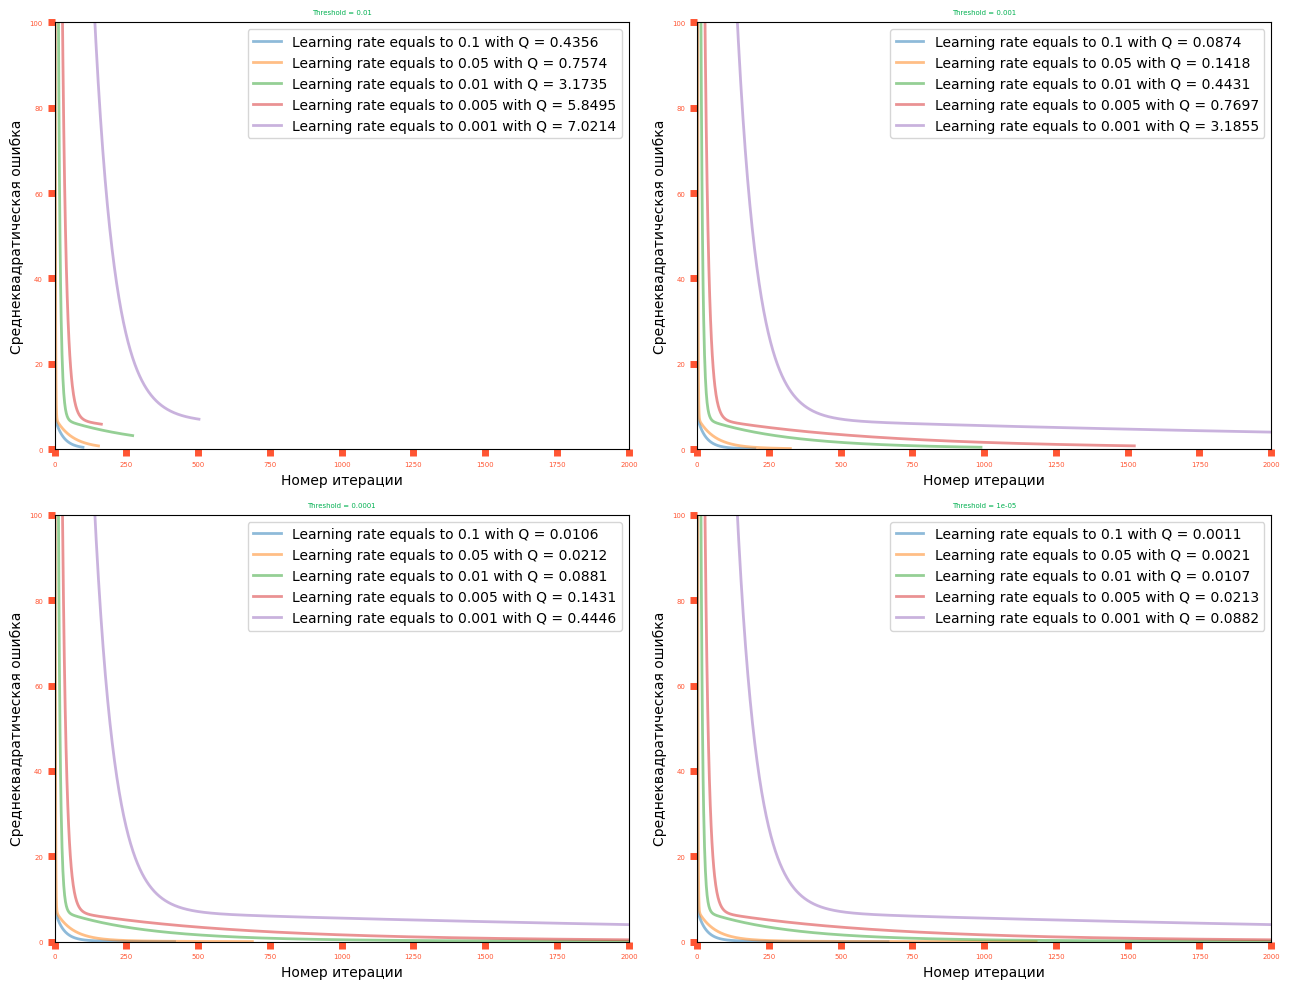

In [77]:
import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 2
mlp.rcParams['xtick.major.size'] = 5
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 5
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 5
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 5
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 5
mlp.rcParams['axes.titlesize'] = 10
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'


fig = plt.figure()


fig.set_size_inches(13, 10)

"""Задать списки для итераций"""
thresholds = [1e-2, 1e-3, 1e-4, 1e-5]### Your code is here 
rates = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3]

for i in range(len(thresholds)):
    """Задать threshold, добавить график на полонто, создать список для хранения значений функционала"""
    ax1 = fig.add_subplot(2, 2, i + 1) ### Your code is here
    thresh = thresholds[i]
    Q_values = []
    
    for lr in rates:
        """Создать объект модели, добавить константу, запустить обучение модели"""
        ### Your code is here
        GD = GradientDescentMse(samples=X, targets=Y, learning_rate = lr, threshold = thresh)
        GD.add_constant_feature()
        GD.learn()
        
        """Определить learning_path через атрибут iteration_loss_dict"""
        ### Your code is here
        learning_path = list(GD.iteration_loss_dict.values())
        number_iter = list(GD.iteration_loss_dict.keys())
        """Отобразить learning_path на графике"""
        plt.plot(number_iter, learning_path, alpha=0.5)### Your code is here
        plt.ylim(0, 100)
        plt.xlim(0, 2000)
        
        Q_values.append(str(round(learning_path[-1], ndigits=4)))
    print(Q_values)
    plt.title(f'Threshold = {thresh}')
    plt.ylabel('Среднеквадратическая ошибка')
    plt.xlabel('Номер итерации')
    plt.legend([f'Learning rate equals to {rates[i]}' + ' with Q = ' + Q_values[i] for i in range(len(rates))])

fig.tight_layout() 

plt.show()